In [ ]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np

from datetime import datetime;now = datetime.now;t00=now();

import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
print('done, mounted')
print(now())

Mounted at /content/drive
done, mounted
2020-09-16 16:30:07.951953


In [ ]:
#data = np.random.rand(131,160,64,64)
#data = np.load('/content/drive/My Drive/BC-MRI-AE/data2.npy')
data = np.load('/content/drive/My Drive/abide_data_60.npy')
print(data.shape)

(1071, 1, 64, 64, 64)


In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
Tesla K80


In [ ]:
# Autoencoder class
class CAE(nn.Module):
    def __init__(self,input_shape,k=1):
        super().__init__()
        
        # Stuff
        self.input_shape = input_shape
        self.batch_size = input_shape[0]

        self.lrelu = torch.nn.LeakyReLU(negative_slope=.02)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()

        # Shapes and sizes
        R = np.ones(shape=self.input_shape)
        R = torch.tensor(R).float()

        bias_bool = False # Do you want padding or not 

        # Encoder
        self.enc_C1 = nn.Conv3d(in_channels=1,out_channels=4*k,kernel_size=5, stride=2, padding=2, bias=bias_bool)
        self.enc_C2 = nn.Conv3d(in_channels=4*k,out_channels=8*k,kernel_size=5, stride=2, padding=2, bias=bias_bool)
        self.enc_C3 = nn.Conv3d(in_channels=8*k,out_channels=16*k,kernel_size=5, stride=2, padding=2, bias=bias_bool)

        self.dec_C1 = nn.ConvTranspose3d(in_channels=16*k,out_channels=8*k,kernel_size=4, stride=2, padding=1,bias=bias_bool)
        self.dec_C2 = nn.ConvTranspose3d(in_channels=8*k,out_channels=4*k,kernel_size=4, stride=2, padding=1,bias=bias_bool)
        self.dec_C3 = nn.ConvTranspose3d(in_channels=4*k,out_channels=1,kernel_size=4, stride=2, padding=1,bias=bias_bool)

    def forward(self,hello):
      
        activation = self.lrelu( self.enc_C1(hello) )
        activation = self.lrelu( self.enc_C2(activation) )
        activation = self.lrelu( self.enc_C3(activation) )
        #activation_shape = activation.shape
        #activation = self.enc_L1(activation.view(self.batch_size,-1))
        #activation = self.sigmoid( self.dec_L1(activation) )
        #activation = self.relu( self.dec_L1(activation) )

        activation = self.relu( self.dec_C1(activation))
        activation = self.relu( self.dec_C2(activation) )
        #activation = self.sigmoid( self.dec_C3(activation) )
        activation = self.relu( self.dec_C3(activation) )

        return activation


In [ ]:
#dec_C3(dec_C2(dec_C1(enc_C3(enc_C2(enc_C1(data_batch.cpu()))))))

In [29]:
## Convert data 
D = torch.tensor(data[:,:,:,:,:]).float()
D = (D-D.min()) / (D.max()-D.min())
data_batch = D[0:5,:,:,:,:]

## Model Definition
model = CAE(data_batch.shape,k=4) # Initiate mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #  use gpu if available
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3,)
#optimizer = optim.Adam(model.parameters(), lr=.01,weight_decay=.01)
#optimizer = optim.SGD(model.parameters(),lr=.1,weight_decay=.02,momentum=.9)
criterion = nn.MSELoss()
print(device)

## Training Parameters
num_epochs = 501
batch_size = 5
ndata = data.shape[0]
n_batches = np.floor(D.shape[0]/5)
batches = np.array([np.arange((i)*5,(i+1)*5) for i in range(int(n_batches))])
D = D.cuda()
track = list();

ofdir = os.path.join(os.path.curdir,'drive','My Drive','BC-MRI-AE','models')
print(ofdir)

session_name = 'CAE_Nolinear_adam_'

cuda
./drive/My Drive/BC-MRI-AE/models


In [30]:
def myLoss(outputs,data_batch):
  return torch.sum(torch.square(outputs.view(-1)-data_batch.view(-1)))

epoch 0/501 | batch 0/214.0 | time 0:00:00.150827 | loss 304.75757
epoch 0/501 | batch 50/214.0 | time 0:00:04.050190 | loss 306.41443
epoch 0/501 | batch 100/214.0 | time 0:00:07.863830 | loss 21.37683
epoch 0/501 | batch 150/214.0 | time 0:00:11.676154 | loss 9.15599
epoch 0/501 | batch 200/214.0 | time 0:00:15.492286 | loss 377.86197
saved
./drive/My Drive/BC-MRI-AE/models/CAE_Nolinear_adam_e0_2020-09-16 17:31:30.627510


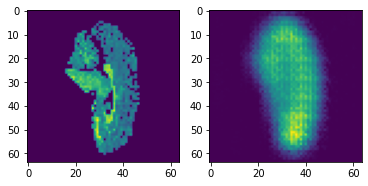

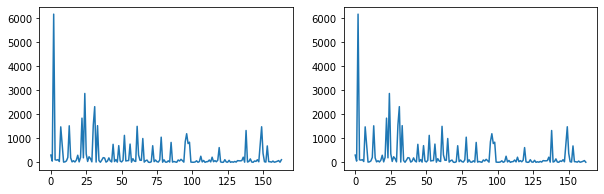

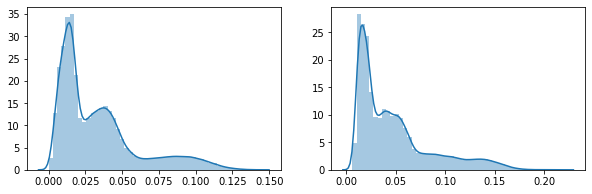

epoch 1/501 | batch 0/214.0 | time 0:00:17.788632 | loss 32.09936
epoch 1/501 | batch 50/214.0 | time 0:00:21.591117 | loss 99.675
epoch 1/501 | batch 100/214.0 | time 0:00:25.396539 | loss 240.28304
epoch 1/501 | batch 150/214.0 | time 0:00:29.203791 | loss 27.97178
epoch 1/501 | batch 200/214.0 | time 0:00:33.008479 | loss 52.21764
epoch 2/501 | batch 0/214.0 | time 0:00:34.094660 | loss 17.37473
epoch 2/501 | batch 50/214.0 | time 0:00:37.910556 | loss 10.22848
epoch 2/501 | batch 100/214.0 | time 0:00:41.724854 | loss 23.35551
epoch 2/501 | batch 150/214.0 | time 0:00:45.539139 | loss 60.41492
epoch 2/501 | batch 200/214.0 | time 0:00:49.353287 | loss 11.36342
epoch 3/501 | batch 0/214.0 | time 0:00:50.436964 | loss 1091.81885
epoch 3/501 | batch 50/214.0 | time 0:00:54.243017 | loss 9.11319
epoch 3/501 | batch 100/214.0 | time 0:00:58.050261 | loss 30.78787
epoch 3/501 | batch 150/214.0 | time 0:01:01.858140 | loss 51.2185
epoch 3/501 | batch 200/214.0 | time 0:01:05.665733 | loss

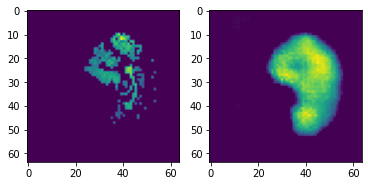

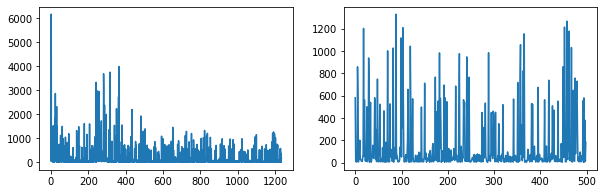

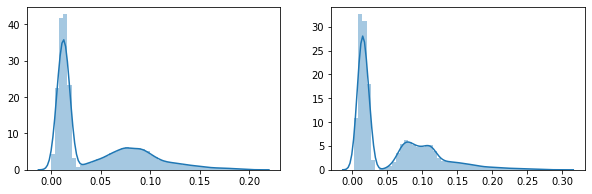

epoch 6/501 | batch 0/214.0 | time 0:01:40.512946 | loss 79.84838
epoch 6/501 | batch 50/214.0 | time 0:01:44.327818 | loss 86.99249
epoch 6/501 | batch 100/214.0 | time 0:01:48.142701 | loss 708.70166
epoch 6/501 | batch 150/214.0 | time 0:01:51.957723 | loss 53.65735
epoch 6/501 | batch 200/214.0 | time 0:01:55.773353 | loss 39.09635
epoch 7/501 | batch 0/214.0 | time 0:01:56.857396 | loss 51.03047
epoch 7/501 | batch 50/214.0 | time 0:02:00.663120 | loss 98.10045
epoch 7/501 | batch 100/214.0 | time 0:02:04.472036 | loss 22.81426
epoch 7/501 | batch 150/214.0 | time 0:02:08.279889 | loss 2022.42151
epoch 7/501 | batch 200/214.0 | time 0:02:12.084627 | loss 47.49982
epoch 8/501 | batch 0/214.0 | time 0:02:13.171067 | loss 72.96709
epoch 8/501 | batch 50/214.0 | time 0:02:16.986496 | loss 31.27161
epoch 8/501 | batch 100/214.0 | time 0:02:20.800949 | loss 33.28295
epoch 8/501 | batch 150/214.0 | time 0:02:24.617314 | loss 33.1129
epoch 8/501 | batch 200/214.0 | time 0:02:28.431654 | l

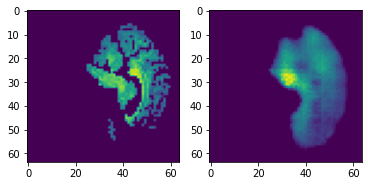

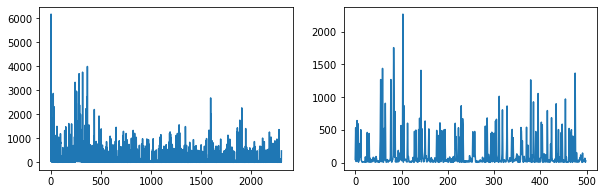

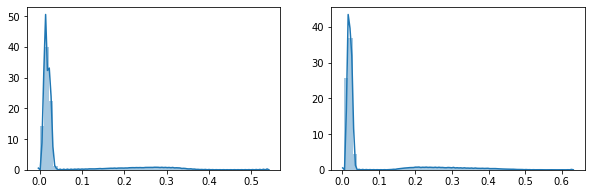

epoch 11/501 | batch 0/214.0 | time 0:03:03.277509 | loss 10.86563
epoch 11/501 | batch 50/214.0 | time 0:03:07.085731 | loss 8.48121
epoch 11/501 | batch 100/214.0 | time 0:03:10.892034 | loss 24.42082
epoch 11/501 | batch 150/214.0 | time 0:03:14.701536 | loss 8.2384
epoch 11/501 | batch 200/214.0 | time 0:03:18.508530 | loss 31.98354
epoch 12/501 | batch 0/214.0 | time 0:03:19.594799 | loss 10.37935
epoch 12/501 | batch 50/214.0 | time 0:03:23.407726 | loss 4.19436
epoch 12/501 | batch 100/214.0 | time 0:03:27.222285 | loss 33.09389
epoch 12/501 | batch 150/214.0 | time 0:03:31.038919 | loss 9.84069
epoch 12/501 | batch 200/214.0 | time 0:03:34.854258 | loss 10.41245
epoch 13/501 | batch 0/214.0 | time 0:03:35.947675 | loss 10.95409
epoch 13/501 | batch 50/214.0 | time 0:03:39.753688 | loss 44.86192
epoch 13/501 | batch 100/214.0 | time 0:03:43.559924 | loss 78.04294
epoch 13/501 | batch 150/214.0 | time 0:03:47.366656 | loss 15.46478
epoch 13/501 | batch 200/214.0 | time 0:03:51.17

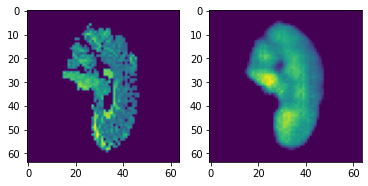

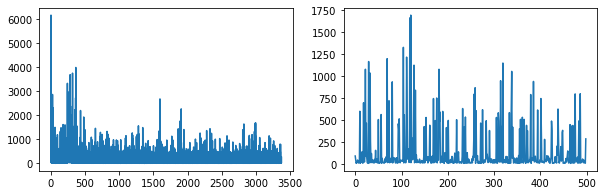

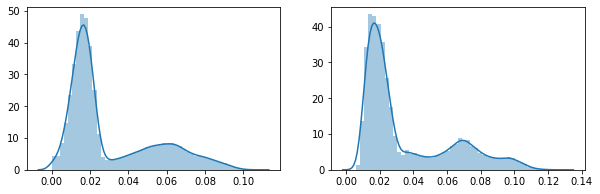

epoch 16/501 | batch 0/214.0 | time 0:04:26.095349 | loss 23.71037
epoch 16/501 | batch 50/214.0 | time 0:04:29.909737 | loss 554.07758
epoch 16/501 | batch 100/214.0 | time 0:04:33.724795 | loss 14.63859
epoch 16/501 | batch 150/214.0 | time 0:04:37.537435 | loss 12.99312
epoch 16/501 | batch 200/214.0 | time 0:04:41.350420 | loss 7.62746
epoch 17/501 | batch 0/214.0 | time 0:04:42.443823 | loss 32.67712
epoch 17/501 | batch 50/214.0 | time 0:04:46.249119 | loss 59.42126
epoch 17/501 | batch 100/214.0 | time 0:04:50.056370 | loss 44.03439
epoch 17/501 | batch 150/214.0 | time 0:04:53.862637 | loss 14.19362
epoch 17/501 | batch 200/214.0 | time 0:04:57.667740 | loss 41.28021
epoch 18/501 | batch 0/214.0 | time 0:04:58.753617 | loss 14.5955
epoch 18/501 | batch 50/214.0 | time 0:05:02.570643 | loss 16.52671
epoch 18/501 | batch 100/214.0 | time 0:05:06.388880 | loss 26.16433
epoch 18/501 | batch 150/214.0 | time 0:05:10.206076 | loss 11.94967
epoch 18/501 | batch 200/214.0 | time 0:05:1

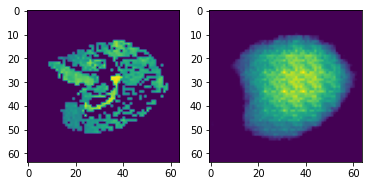

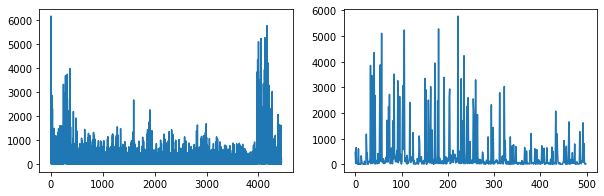

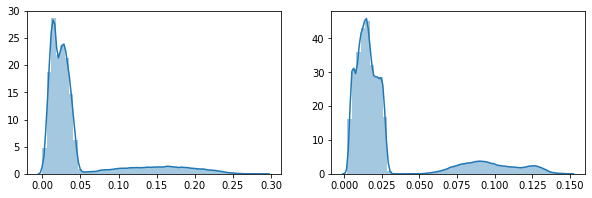

epoch 21/501 | batch 0/214.0 | time 0:05:48.916599 | loss 245.24301
epoch 21/501 | batch 50/214.0 | time 0:05:52.723468 | loss 64.4836
epoch 21/501 | batch 100/214.0 | time 0:05:56.530400 | loss 4.81259
epoch 21/501 | batch 150/214.0 | time 0:06:00.336849 | loss 51.25639
epoch 21/501 | batch 200/214.0 | time 0:06:04.143208 | loss 47.28092
epoch 22/501 | batch 0/214.0 | time 0:06:05.229935 | loss 12.18008
epoch 22/501 | batch 50/214.0 | time 0:06:09.046993 | loss 6.82678
epoch 22/501 | batch 100/214.0 | time 0:06:12.863853 | loss 489.59308
epoch 22/501 | batch 150/214.0 | time 0:06:16.679704 | loss 19.12883
epoch 22/501 | batch 200/214.0 | time 0:06:20.495022 | loss 88.93127
epoch 23/501 | batch 0/214.0 | time 0:06:21.578469 | loss 543.78912
epoch 23/501 | batch 50/214.0 | time 0:06:25.386552 | loss 7.61873
epoch 23/501 | batch 100/214.0 | time 0:06:29.192900 | loss 5.50362
epoch 23/501 | batch 150/214.0 | time 0:06:32.998474 | loss 9.77489
epoch 23/501 | batch 200/214.0 | time 0:06:36.

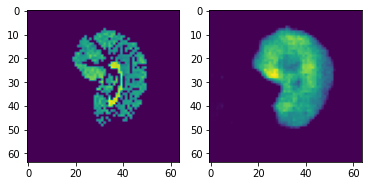

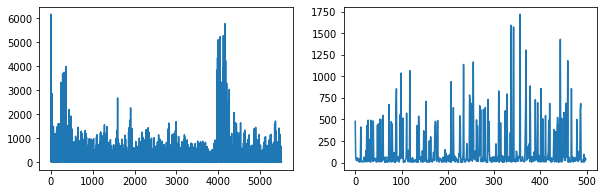

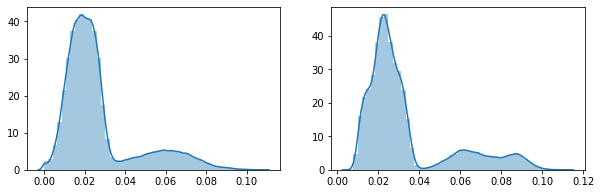

epoch 26/501 | batch 0/214.0 | time 0:07:11.676184 | loss 43.37229
epoch 26/501 | batch 50/214.0 | time 0:07:15.490772 | loss 33.69858
epoch 26/501 | batch 100/214.0 | time 0:07:19.306428 | loss 22.74726
epoch 26/501 | batch 150/214.0 | time 0:07:23.121158 | loss 11.139
epoch 26/501 | batch 200/214.0 | time 0:07:26.937025 | loss 13.66128
epoch 27/501 | batch 0/214.0 | time 0:07:28.019840 | loss 21.55688
epoch 27/501 | batch 50/214.0 | time 0:07:31.826598 | loss 55.48357
epoch 27/501 | batch 100/214.0 | time 0:07:35.635307 | loss 9.98523
epoch 27/501 | batch 150/214.0 | time 0:07:39.443436 | loss 613.42627
epoch 27/501 | batch 200/214.0 | time 0:07:43.249791 | loss 19.81334
epoch 28/501 | batch 0/214.0 | time 0:07:44.335483 | loss 21.26192
epoch 28/501 | batch 50/214.0 | time 0:07:48.150170 | loss 17.60101
epoch 28/501 | batch 100/214.0 | time 0:07:51.964884 | loss 975.42999
epoch 28/501 | batch 150/214.0 | time 0:07:55.780148 | loss 42.08755
epoch 28/501 | batch 200/214.0 | time 0:07:5

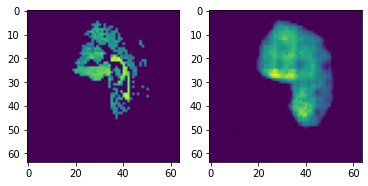

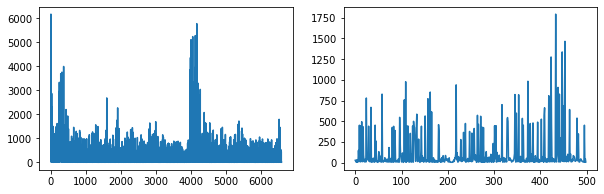

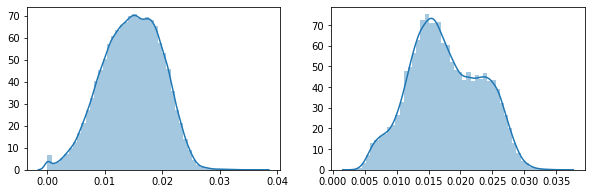

epoch 31/501 | batch 0/214.0 | time 0:08:34.510555 | loss 55.55306
epoch 31/501 | batch 50/214.0 | time 0:08:38.316527 | loss 6.37906
epoch 31/501 | batch 100/214.0 | time 0:08:42.123245 | loss 12.725
epoch 31/501 | batch 150/214.0 | time 0:08:45.933529 | loss 97.75707
epoch 31/501 | batch 200/214.0 | time 0:08:49.739848 | loss 7.5602
epoch 32/501 | batch 0/214.0 | time 0:08:50.826508 | loss 71.68138
epoch 32/501 | batch 50/214.0 | time 0:08:54.640234 | loss 7.7792
epoch 32/501 | batch 100/214.0 | time 0:08:58.454610 | loss 21.72485
epoch 32/501 | batch 150/214.0 | time 0:09:02.268525 | loss 22.6086
epoch 32/501 | batch 200/214.0 | time 0:09:06.081689 | loss 6.33782
epoch 33/501 | batch 0/214.0 | time 0:09:07.173631 | loss 537.10706
epoch 33/501 | batch 50/214.0 | time 0:09:10.979669 | loss 2.90089
epoch 33/501 | batch 100/214.0 | time 0:09:14.786904 | loss 20.09333
epoch 33/501 | batch 150/214.0 | time 0:09:18.593018 | loss 849.21423
epoch 33/501 | batch 200/214.0 | time 0:09:22.39830

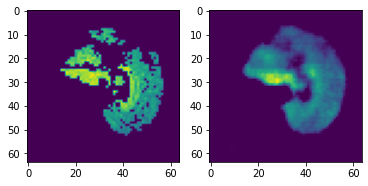

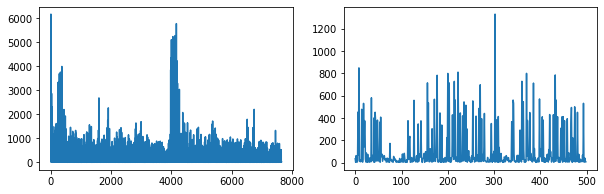

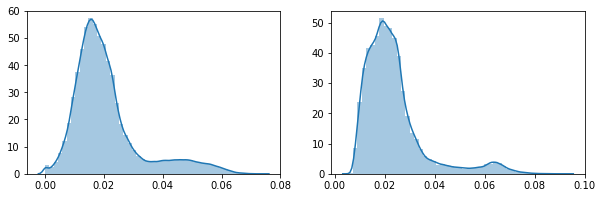

epoch 36/501 | batch 0/214.0 | time 0:09:57.165116 | loss 232.96489
epoch 36/501 | batch 50/214.0 | time 0:10:00.974368 | loss 5.68755
epoch 36/501 | batch 100/214.0 | time 0:10:04.786416 | loss 71.81636
epoch 36/501 | batch 150/214.0 | time 0:10:08.597895 | loss 6.12941
epoch 36/501 | batch 200/214.0 | time 0:10:12.409080 | loss 30.01079
epoch 37/501 | batch 0/214.0 | time 0:10:13.500754 | loss 38.22635
epoch 37/501 | batch 50/214.0 | time 0:10:17.308355 | loss 83.47111
epoch 37/501 | batch 100/214.0 | time 0:10:21.111545 | loss 125.12306
epoch 37/501 | batch 150/214.0 | time 0:10:24.915203 | loss 664.75037
epoch 37/501 | batch 200/214.0 | time 0:10:28.720791 | loss 20.93302
epoch 38/501 | batch 0/214.0 | time 0:10:29.807390 | loss 81.74477
epoch 38/501 | batch 50/214.0 | time 0:10:33.624522 | loss 6.87648
epoch 38/501 | batch 100/214.0 | time 0:10:37.441164 | loss 23.9103
epoch 38/501 | batch 150/214.0 | time 0:10:41.253169 | loss 75.60664
epoch 38/501 | batch 200/214.0 | time 0:10:4

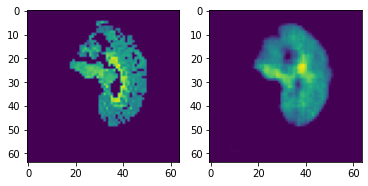

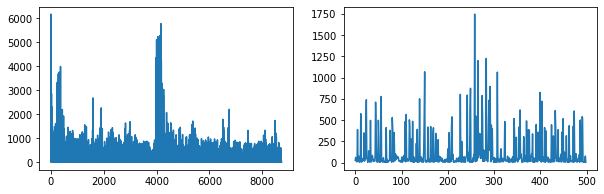

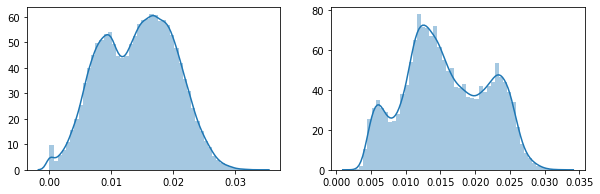

epoch 41/501 | batch 0/214.0 | time 0:11:19.977659 | loss 353.8598
epoch 41/501 | batch 50/214.0 | time 0:11:23.782439 | loss 478.50928
epoch 41/501 | batch 100/214.0 | time 0:11:27.583361 | loss 28.10686
epoch 41/501 | batch 150/214.0 | time 0:11:31.388341 | loss 23.63772
epoch 41/501 | batch 200/214.0 | time 0:11:35.191796 | loss 7.90609
epoch 42/501 | batch 0/214.0 | time 0:11:36.278075 | loss 432.65686
epoch 42/501 | batch 50/214.0 | time 0:11:40.087999 | loss 506.79041
epoch 42/501 | batch 100/214.0 | time 0:11:43.900627 | loss 6.17975
epoch 42/501 | batch 150/214.0 | time 0:11:47.712609 | loss 11.38465
epoch 42/501 | batch 200/214.0 | time 0:11:51.521705 | loss 71.49861
epoch 43/501 | batch 0/214.0 | time 0:11:52.604407 | loss 5.28478
epoch 43/501 | batch 50/214.0 | time 0:11:56.409143 | loss 43.23261
epoch 43/501 | batch 100/214.0 | time 0:12:00.210115 | loss 6.69002
epoch 43/501 | batch 150/214.0 | time 0:12:04.015034 | loss 9.56053
epoch 43/501 | batch 200/214.0 | time 0:12:07

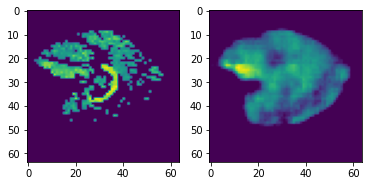

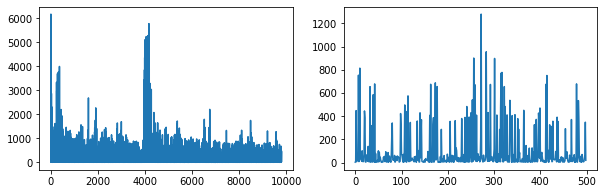

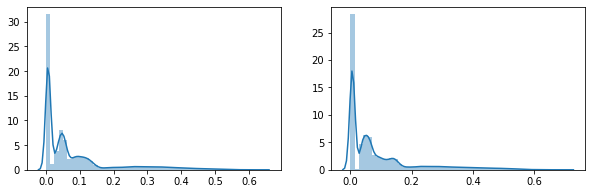

epoch 46/501 | batch 0/214.0 | time 0:12:42.578923 | loss 12.26911
epoch 46/501 | batch 50/214.0 | time 0:12:46.390189 | loss 609.38831
epoch 46/501 | batch 100/214.0 | time 0:12:50.200058 | loss 5.93271
epoch 46/501 | batch 150/214.0 | time 0:12:54.009582 | loss 14.75753
epoch 46/501 | batch 200/214.0 | time 0:12:57.816940 | loss 61.38062
epoch 47/501 | batch 0/214.0 | time 0:12:58.899009 | loss 437.05646
epoch 47/501 | batch 50/214.0 | time 0:13:02.705594 | loss 490.9389
epoch 47/501 | batch 100/214.0 | time 0:13:06.509692 | loss 19.15772
epoch 47/501 | batch 150/214.0 | time 0:13:10.313302 | loss 34.33067
epoch 47/501 | batch 200/214.0 | time 0:13:14.116363 | loss 13.12547
epoch 48/501 | batch 0/214.0 | time 0:13:15.200109 | loss 845.42725
epoch 48/501 | batch 50/214.0 | time 0:13:19.010782 | loss 9.02916
epoch 48/501 | batch 100/214.0 | time 0:13:22.819411 | loss 64.96661
epoch 48/501 | batch 150/214.0 | time 0:13:26.636596 | loss 14.38169
epoch 48/501 | batch 200/214.0 | time 0:13

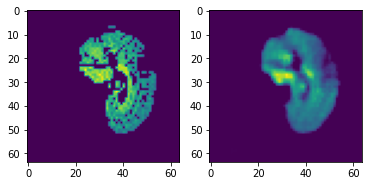

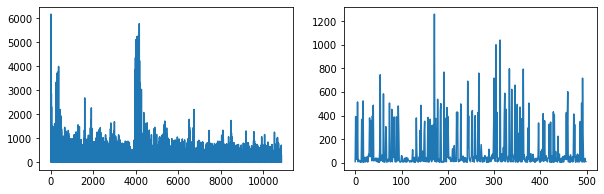

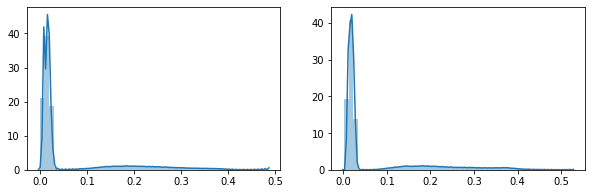

epoch 51/501 | batch 0/214.0 | time 0:14:05.201597 | loss 24.12646
epoch 51/501 | batch 50/214.0 | time 0:14:09.002475 | loss 253.26776
epoch 51/501 | batch 100/214.0 | time 0:14:12.806033 | loss 6.27055
epoch 51/501 | batch 150/214.0 | time 0:14:16.608842 | loss 6.15749
epoch 51/501 | batch 200/214.0 | time 0:14:20.411333 | loss 83.52199
epoch 52/501 | batch 0/214.0 | time 0:14:21.496090 | loss 20.87486
epoch 52/501 | batch 50/214.0 | time 0:14:25.307756 | loss 281.4397
epoch 52/501 | batch 100/214.0 | time 0:14:29.121516 | loss 16.98353
epoch 52/501 | batch 150/214.0 | time 0:14:32.938004 | loss 42.59117
epoch 52/501 | batch 200/214.0 | time 0:14:36.750529 | loss 116.22899
epoch 53/501 | batch 0/214.0 | time 0:14:37.841905 | loss 19.67482
epoch 53/501 | batch 50/214.0 | time 0:14:41.641721 | loss 50.4817
epoch 53/501 | batch 100/214.0 | time 0:14:45.443447 | loss 18.48411
epoch 53/501 | batch 150/214.0 | time 0:14:49.245306 | loss 539.9823
epoch 53/501 | batch 200/214.0 | time 0:14:5

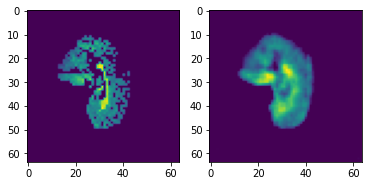

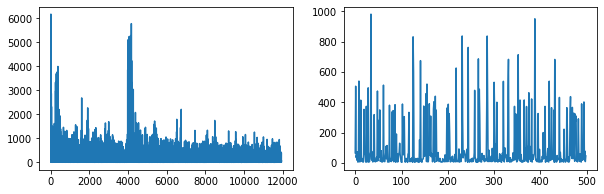

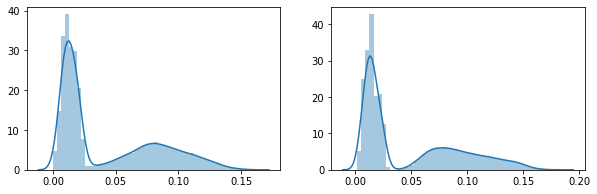

epoch 56/501 | batch 0/214.0 | time 0:15:27.869306 | loss 11.41301
epoch 56/501 | batch 50/214.0 | time 0:15:31.683689 | loss 7.28218
epoch 56/501 | batch 100/214.0 | time 0:15:35.500210 | loss 8.83444
epoch 56/501 | batch 150/214.0 | time 0:15:39.315638 | loss 41.573
epoch 56/501 | batch 200/214.0 | time 0:15:43.126707 | loss 586.9823
epoch 57/501 | batch 0/214.0 | time 0:15:44.218683 | loss 59.50273
epoch 57/501 | batch 50/214.0 | time 0:15:48.019473 | loss 68.09017
epoch 57/501 | batch 100/214.0 | time 0:15:51.824303 | loss 106.24094
epoch 57/501 | batch 150/214.0 | time 0:15:55.625111 | loss 16.02745
epoch 57/501 | batch 200/214.0 | time 0:15:59.427832 | loss 13.34202
epoch 58/501 | batch 0/214.0 | time 0:16:00.513436 | loss 39.99746
epoch 58/501 | batch 50/214.0 | time 0:16:04.326055 | loss 59.05238
epoch 58/501 | batch 100/214.0 | time 0:16:08.140588 | loss 9.59514
epoch 58/501 | batch 150/214.0 | time 0:16:11.951308 | loss 25.22289
epoch 58/501 | batch 200/214.0 | time 0:16:15.7

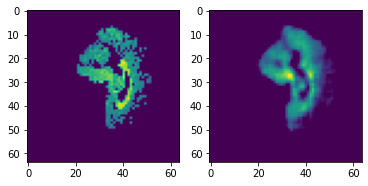

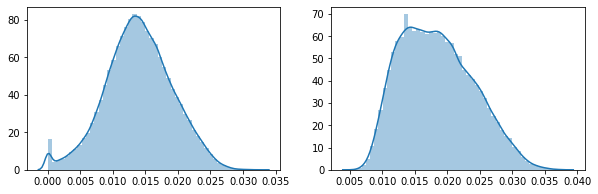

epoch 61/501 | batch 0/214.0 | time 0:16:50.582643 | loss 32.74889
epoch 61/501 | batch 50/214.0 | time 0:16:54.382925 | loss 7.26831
epoch 61/501 | batch 100/214.0 | time 0:16:58.186051 | loss 103.01656
epoch 61/501 | batch 150/214.0 | time 0:17:01.987228 | loss 445.73199
epoch 61/501 | batch 200/214.0 | time 0:17:05.794841 | loss 63.42703
epoch 62/501 | batch 0/214.0 | time 0:17:06.880421 | loss 26.40912
epoch 62/501 | batch 50/214.0 | time 0:17:10.693682 | loss 370.48819
epoch 62/501 | batch 100/214.0 | time 0:17:14.503538 | loss 11.74677
epoch 62/501 | batch 150/214.0 | time 0:17:18.314285 | loss 22.42415
epoch 62/501 | batch 200/214.0 | time 0:17:22.124053 | loss 11.26368
epoch 63/501 | batch 0/214.0 | time 0:17:23.207181 | loss 16.31139
epoch 63/501 | batch 50/214.0 | time 0:17:27.012342 | loss 443.22482
epoch 63/501 | batch 100/214.0 | time 0:17:30.814922 | loss 3.58598
epoch 63/501 | batch 150/214.0 | time 0:17:34.619249 | loss 9.47717
epoch 63/501 | batch 200/214.0 | time 0:17

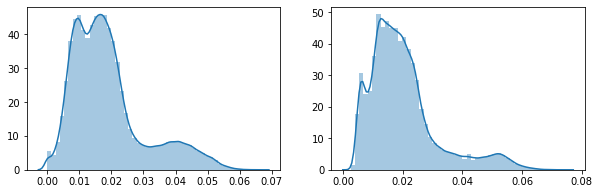

epoch 66/501 | batch 0/214.0 | time 0:18:13.223727 | loss 6.35678
epoch 66/501 | batch 50/214.0 | time 0:18:17.032871 | loss 10.10841
epoch 66/501 | batch 100/214.0 | time 0:18:20.842822 | loss 6.45936
epoch 66/501 | batch 150/214.0 | time 0:18:24.652247 | loss 43.29712
epoch 66/501 | batch 200/214.0 | time 0:18:28.463674 | loss 363.54651
epoch 67/501 | batch 0/214.0 | time 0:18:29.546037 | loss 40.26515
epoch 67/501 | batch 50/214.0 | time 0:18:33.347102 | loss 35.28667
epoch 67/501 | batch 100/214.0 | time 0:18:37.148350 | loss 6.37002
epoch 67/501 | batch 150/214.0 | time 0:18:40.949998 | loss 70.46362
epoch 67/501 | batch 200/214.0 | time 0:18:44.751554 | loss 364.2489
epoch 68/501 | batch 0/214.0 | time 0:18:45.836816 | loss 26.91699
epoch 68/501 | batch 50/214.0 | time 0:18:49.646214 | loss 47.52801
epoch 68/501 | batch 100/214.0 | time 0:18:53.455056 | loss 5.83384
epoch 68/501 | batch 150/214.0 | time 0:18:57.266633 | loss 12.2327
epoch 68/501 | batch 200/214.0 | time 0:19:01.0

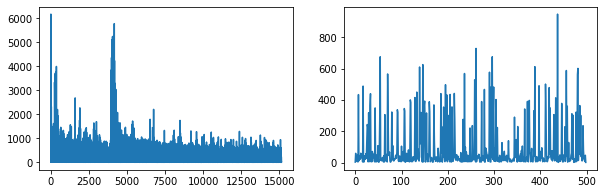

epoch 71/501 | batch 0/214.0 | time 0:19:35.926924 | loss 100.14393
epoch 71/501 | batch 50/214.0 | time 0:19:39.728897 | loss 8.77527
epoch 71/501 | batch 100/214.0 | time 0:19:43.533169 | loss 390.49176
epoch 71/501 | batch 150/214.0 | time 0:19:47.339885 | loss 407.84723
epoch 71/501 | batch 200/214.0 | time 0:19:51.144791 | loss 1.99663
epoch 72/501 | batch 0/214.0 | time 0:19:52.230483 | loss 52.44283
epoch 72/501 | batch 50/214.0 | time 0:19:56.042930 | loss 22.11547
epoch 72/501 | batch 100/214.0 | time 0:19:59.853997 | loss 539.50281
epoch 72/501 | batch 150/214.0 | time 0:20:03.665779 | loss 6.64986
epoch 72/501 | batch 200/214.0 | time 0:20:07.474273 | loss 344.35968
epoch 73/501 | batch 0/214.0 | time 0:20:08.566190 | loss 29.26588
epoch 73/501 | batch 50/214.0 | time 0:20:12.369332 | loss 23.48142
epoch 73/501 | batch 100/214.0 | time 0:20:16.179161 | loss 10.49157
epoch 73/501 | batch 150/214.0 | time 0:20:19.985281 | loss 16.39042
epoch 73/501 | batch 200/214.0 | time 0:2

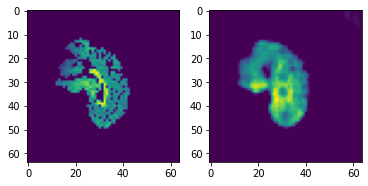

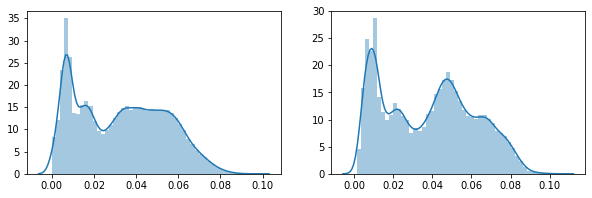

epoch 76/501 | batch 0/214.0 | time 0:20:58.587892 | loss 8.18249
epoch 76/501 | batch 50/214.0 | time 0:21:02.399967 | loss 7.76955
epoch 76/501 | batch 100/214.0 | time 0:21:06.206815 | loss 24.52825
epoch 76/501 | batch 150/214.0 | time 0:21:10.016879 | loss 687.70312
epoch 76/501 | batch 200/214.0 | time 0:21:13.824703 | loss 539.93774
epoch 77/501 | batch 0/214.0 | time 0:21:14.916532 | loss 7.14498
epoch 77/501 | batch 50/214.0 | time 0:21:18.719580 | loss 66.96199
epoch 77/501 | batch 100/214.0 | time 0:21:22.522577 | loss 38.59485
epoch 77/501 | batch 150/214.0 | time 0:21:26.324417 | loss 600.48993
epoch 77/501 | batch 200/214.0 | time 0:21:30.127189 | loss 12.57519
epoch 78/501 | batch 0/214.0 | time 0:21:31.212749 | loss 23.47487
epoch 78/501 | batch 50/214.0 | time 0:21:35.023616 | loss 118.38481
epoch 78/501 | batch 100/214.0 | time 0:21:38.835938 | loss 5.80363
epoch 78/501 | batch 150/214.0 | time 0:21:42.644896 | loss 43.69891
epoch 78/501 | batch 200/214.0 | time 0:21:

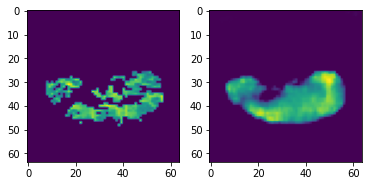

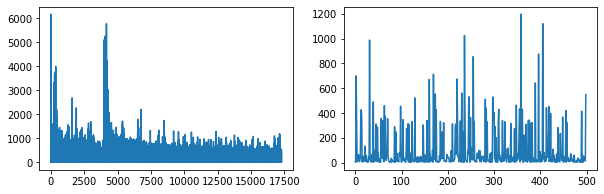

epoch 81/501 | batch 0/214.0 | time 0:22:21.243193 | loss 31.44134
epoch 81/501 | batch 50/214.0 | time 0:22:25.048647 | loss 73.29247
epoch 81/501 | batch 100/214.0 | time 0:22:28.851941 | loss 8.85958
epoch 81/501 | batch 150/214.0 | time 0:22:32.656360 | loss 3.65841
epoch 81/501 | batch 200/214.0 | time 0:22:36.459730 | loss 386.51843
epoch 82/501 | batch 0/214.0 | time 0:22:37.544793 | loss 5.68347
epoch 82/501 | batch 50/214.0 | time 0:22:41.355852 | loss 538.01508
epoch 82/501 | batch 100/214.0 | time 0:22:45.167204 | loss 72.64679
epoch 82/501 | batch 150/214.0 | time 0:22:48.979032 | loss 4.25625
epoch 82/501 | batch 200/214.0 | time 0:22:52.796118 | loss 66.83859
epoch 83/501 | batch 0/214.0 | time 0:22:53.879443 | loss 7.16649
epoch 83/501 | batch 50/214.0 | time 0:22:57.685159 | loss 4.93407
epoch 83/501 | batch 100/214.0 | time 0:23:01.490376 | loss 28.39485
epoch 83/501 | batch 150/214.0 | time 0:23:05.295099 | loss 355.67807
epoch 83/501 | batch 200/214.0 | time 0:23:09.

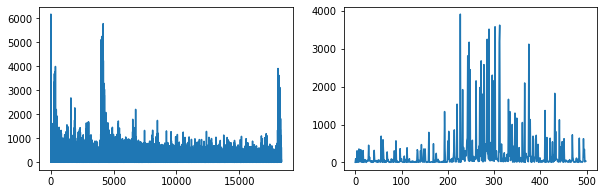

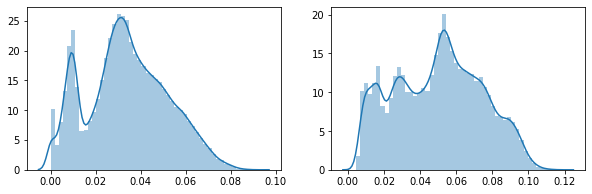

epoch 86/501 | batch 0/214.0 | time 0:23:43.939462 | loss 27.05177
epoch 86/501 | batch 50/214.0 | time 0:23:47.750488 | loss 29.35126
epoch 86/501 | batch 100/214.0 | time 0:23:51.561618 | loss 330.86264
epoch 86/501 | batch 150/214.0 | time 0:23:55.374084 | loss 57.53091
epoch 86/501 | batch 200/214.0 | time 0:23:59.189238 | loss 74.10985
epoch 87/501 | batch 0/214.0 | time 0:24:00.272736 | loss 7.18466
epoch 87/501 | batch 50/214.0 | time 0:24:04.079515 | loss 38.35948
epoch 87/501 | batch 100/214.0 | time 0:24:07.882019 | loss 49.01068
epoch 87/501 | batch 150/214.0 | time 0:24:11.685086 | loss 8.98464
epoch 87/501 | batch 200/214.0 | time 0:24:15.488737 | loss 103.62621
epoch 88/501 | batch 0/214.0 | time 0:24:16.576194 | loss 13.10522
epoch 88/501 | batch 50/214.0 | time 0:24:20.385786 | loss 23.48969
epoch 88/501 | batch 100/214.0 | time 0:24:24.197093 | loss 28.93262
epoch 88/501 | batch 150/214.0 | time 0:24:28.008743 | loss 272.08423
epoch 88/501 | batch 200/214.0 | time 0:24

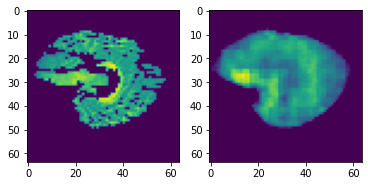

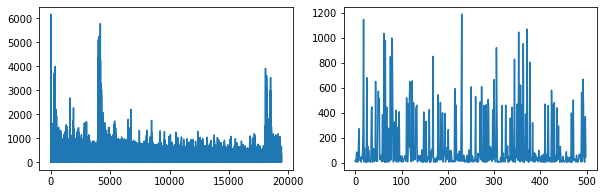

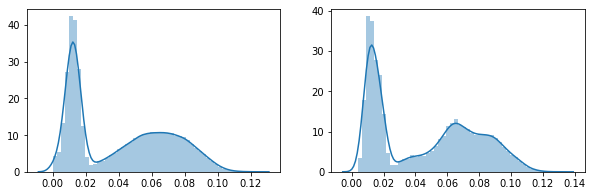

epoch 91/501 | batch 0/214.0 | time 0:25:06.617981 | loss 8.55306
epoch 91/501 | batch 50/214.0 | time 0:25:10.421071 | loss 32.88173
epoch 91/501 | batch 100/214.0 | time 0:25:14.226890 | loss 372.96326
epoch 91/501 | batch 150/214.0 | time 0:25:18.034547 | loss 101.51239
epoch 91/501 | batch 200/214.0 | time 0:25:21.839819 | loss 32.01753
epoch 92/501 | batch 0/214.0 | time 0:25:22.925487 | loss 5.53805
epoch 92/501 | batch 50/214.0 | time 0:25:26.738533 | loss 5.8527
epoch 92/501 | batch 100/214.0 | time 0:25:30.553867 | loss 96.98173
epoch 92/501 | batch 150/214.0 | time 0:25:34.371786 | loss 6.67972
epoch 92/501 | batch 200/214.0 | time 0:25:38.186319 | loss 434.45929
epoch 93/501 | batch 0/214.0 | time 0:25:39.278469 | loss 767.57507
epoch 93/501 | batch 50/214.0 | time 0:25:43.079395 | loss 76.68991
epoch 93/501 | batch 100/214.0 | time 0:25:46.881744 | loss 27.64004
epoch 93/501 | batch 150/214.0 | time 0:25:50.683608 | loss 4.98743
epoch 93/501 | batch 200/214.0 | time 0:25:54

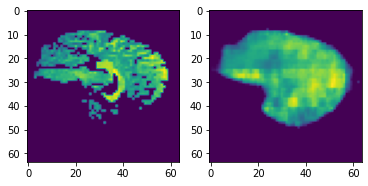

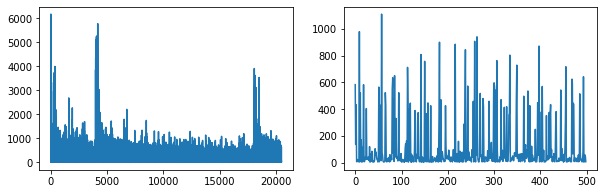

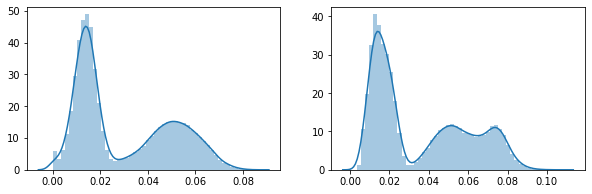

epoch 96/501 | batch 0/214.0 | time 0:26:29.343732 | loss 51.01884
epoch 96/501 | batch 50/214.0 | time 0:26:33.154189 | loss 475.63348
epoch 96/501 | batch 100/214.0 | time 0:26:36.967156 | loss 4.58519
epoch 96/501 | batch 150/214.0 | time 0:26:40.776183 | loss 13.75363
epoch 96/501 | batch 200/214.0 | time 0:26:44.589157 | loss 11.39716
epoch 97/501 | batch 0/214.0 | time 0:26:45.681144 | loss 73.09424
epoch 97/501 | batch 50/214.0 | time 0:26:49.484997 | loss 3.93603
epoch 97/501 | batch 100/214.0 | time 0:26:53.288488 | loss 4.99285
epoch 97/501 | batch 150/214.0 | time 0:26:57.093372 | loss 533.96326
epoch 97/501 | batch 200/214.0 | time 0:27:00.897450 | loss 202.87003
epoch 98/501 | batch 0/214.0 | time 0:27:01.982362 | loss 29.00319
epoch 98/501 | batch 50/214.0 | time 0:27:05.797500 | loss 515.6073
epoch 98/501 | batch 100/214.0 | time 0:27:09.612063 | loss 61.69359
epoch 98/501 | batch 150/214.0 | time 0:27:13.425430 | loss 29.99637
epoch 98/501 | batch 200/214.0 | time 0:27:

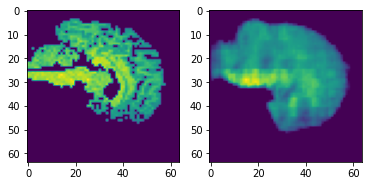

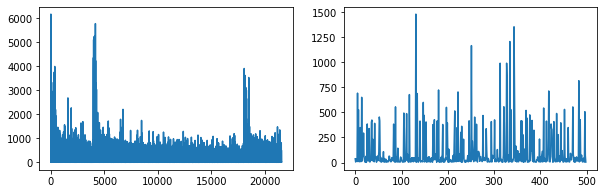

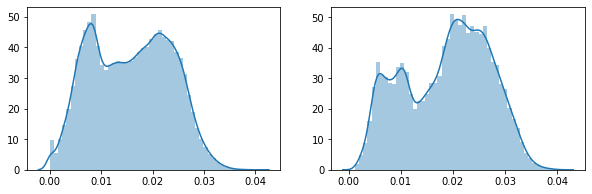

epoch 101/501 | batch 0/214.0 | time 0:27:52.024886 | loss 1200.44116
epoch 101/501 | batch 50/214.0 | time 0:27:55.826894 | loss 23.35102
epoch 101/501 | batch 100/214.0 | time 0:27:59.628590 | loss 35.11885
epoch 101/501 | batch 150/214.0 | time 0:28:03.434088 | loss 4.25666
epoch 101/501 | batch 200/214.0 | time 0:28:07.241032 | loss 6.5515
epoch 102/501 | batch 0/214.0 | time 0:28:08.325382 | loss 51.8997
epoch 102/501 | batch 50/214.0 | time 0:28:12.140415 | loss 687.2525
epoch 102/501 | batch 100/214.0 | time 0:28:15.951714 | loss 3.75077
epoch 102/501 | batch 150/214.0 | time 0:28:19.761001 | loss 745.1778
epoch 102/501 | batch 200/214.0 | time 0:28:23.569126 | loss 7.27685
epoch 103/501 | batch 0/214.0 | time 0:28:24.651438 | loss 28.84248
epoch 103/501 | batch 50/214.0 | time 0:28:28.456425 | loss 3.71545
epoch 103/501 | batch 100/214.0 | time 0:28:32.259276 | loss 436.59067
epoch 103/501 | batch 150/214.0 | time 0:28:36.063098 | loss 9.1622
epoch 103/501 | batch 200/214.0 | t

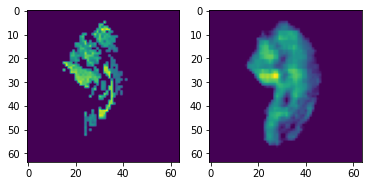

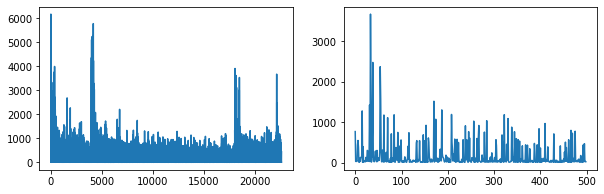

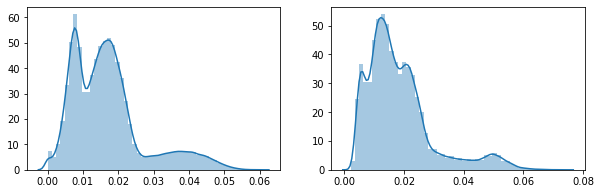

epoch 106/501 | batch 0/214.0 | time 0:29:14.683093 | loss 18.93319
epoch 106/501 | batch 50/214.0 | time 0:29:18.494020 | loss 527.59888
epoch 106/501 | batch 100/214.0 | time 0:29:22.304675 | loss 21.451
epoch 106/501 | batch 150/214.0 | time 0:29:26.117025 | loss 17.46395
epoch 106/501 | batch 200/214.0 | time 0:29:29.926240 | loss 12.49918
epoch 107/501 | batch 0/214.0 | time 0:29:31.009344 | loss 68.22707
epoch 107/501 | batch 50/214.0 | time 0:29:34.810403 | loss 18.60235
epoch 107/501 | batch 100/214.0 | time 0:29:38.612602 | loss 56.35194
epoch 107/501 | batch 150/214.0 | time 0:29:42.417502 | loss 8.2735
epoch 107/501 | batch 200/214.0 | time 0:29:46.223858 | loss 454.823
epoch 108/501 | batch 0/214.0 | time 0:29:47.310126 | loss 10.48565
epoch 108/501 | batch 50/214.0 | time 0:29:51.121618 | loss 19.26108
epoch 108/501 | batch 100/214.0 | time 0:29:54.932303 | loss 5.45668
epoch 108/501 | batch 150/214.0 | time 0:29:58.740934 | loss 52.24399
epoch 108/501 | batch 200/214.0 | 

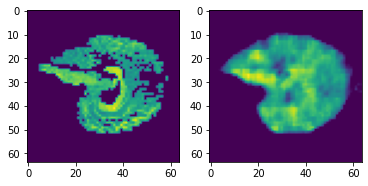

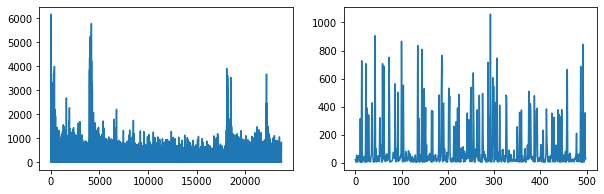

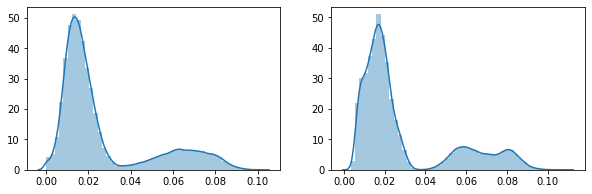

epoch 111/501 | batch 0/214.0 | time 0:30:37.395805 | loss 16.70494
epoch 111/501 | batch 50/214.0 | time 0:30:41.200391 | loss 14.66931
epoch 111/501 | batch 100/214.0 | time 0:30:45.006175 | loss 27.7609
epoch 111/501 | batch 150/214.0 | time 0:30:48.811662 | loss 18.40178
epoch 111/501 | batch 200/214.0 | time 0:30:52.615007 | loss 5.71677
epoch 112/501 | batch 0/214.0 | time 0:30:53.700363 | loss 8.63139
epoch 112/501 | batch 50/214.0 | time 0:30:57.508421 | loss 19.35318
epoch 112/501 | batch 100/214.0 | time 0:31:01.316299 | loss 324.08319
epoch 112/501 | batch 150/214.0 | time 0:31:05.128139 | loss 18.56664
epoch 112/501 | batch 200/214.0 | time 0:31:08.936742 | loss 5.11195
epoch 113/501 | batch 0/214.0 | time 0:31:10.027626 | loss 8.89972
epoch 113/501 | batch 50/214.0 | time 0:31:13.826777 | loss 599.48688
epoch 113/501 | batch 100/214.0 | time 0:31:17.629590 | loss 26.3145
epoch 113/501 | batch 150/214.0 | time 0:31:21.432115 | loss 9.26518
epoch 113/501 | batch 200/214.0 | 

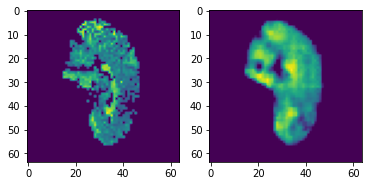

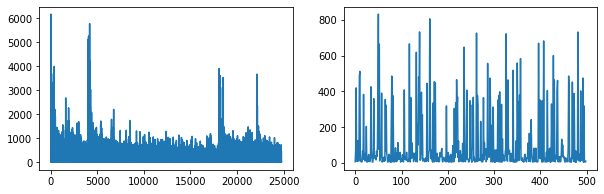

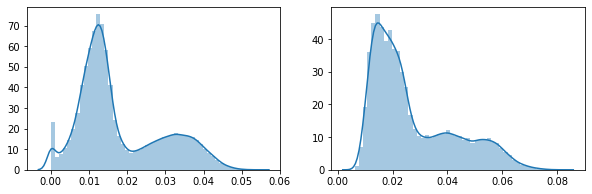

epoch 116/501 | batch 0/214.0 | time 0:31:59.997857 | loss 10.24075
epoch 116/501 | batch 50/214.0 | time 0:32:03.807661 | loss 599.38177
epoch 116/501 | batch 100/214.0 | time 0:32:07.616366 | loss 80.45009
epoch 116/501 | batch 150/214.0 | time 0:32:11.425485 | loss 380.5188
epoch 116/501 | batch 200/214.0 | time 0:32:15.235083 | loss 22.76281
epoch 117/501 | batch 0/214.0 | time 0:32:16.326355 | loss 33.21951
epoch 117/501 | batch 50/214.0 | time 0:32:20.125655 | loss 38.40318
epoch 117/501 | batch 100/214.0 | time 0:32:23.926228 | loss 18.22541
epoch 117/501 | batch 150/214.0 | time 0:32:27.726573 | loss 7.57588
epoch 117/501 | batch 200/214.0 | time 0:32:31.530517 | loss 697.72961
epoch 118/501 | batch 0/214.0 | time 0:32:32.614073 | loss 23.247
epoch 118/501 | batch 50/214.0 | time 0:32:36.422493 | loss 6.73526
epoch 118/501 | batch 100/214.0 | time 0:32:40.231334 | loss 17.21769
epoch 118/501 | batch 150/214.0 | time 0:32:44.039380 | loss 16.89806
epoch 118/501 | batch 200/214.0

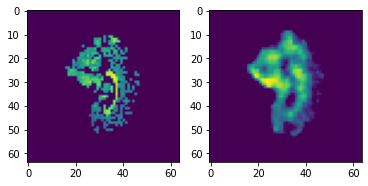

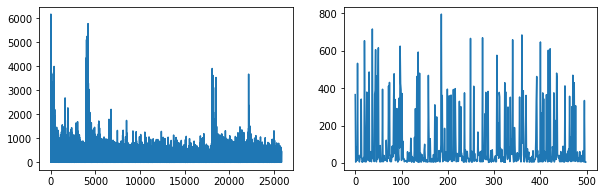

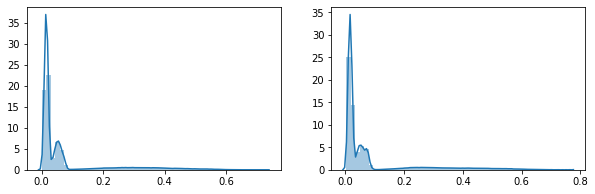

epoch 121/501 | batch 0/214.0 | time 0:33:22.643640 | loss 63.51029
epoch 121/501 | batch 50/214.0 | time 0:33:26.447668 | loss 4.19104
epoch 121/501 | batch 100/214.0 | time 0:33:30.250176 | loss 33.37601
epoch 121/501 | batch 150/214.0 | time 0:33:34.051307 | loss 16.01957
epoch 121/501 | batch 200/214.0 | time 0:33:37.852051 | loss 17.46476
epoch 122/501 | batch 0/214.0 | time 0:33:38.936779 | loss 17.06179
epoch 122/501 | batch 50/214.0 | time 0:33:42.744379 | loss 4.89271
epoch 122/501 | batch 100/214.0 | time 0:33:46.551530 | loss 6.92152
epoch 122/501 | batch 150/214.0 | time 0:33:50.360815 | loss 17.01556
epoch 122/501 | batch 200/214.0 | time 0:33:54.169995 | loss 19.99192
epoch 123/501 | batch 0/214.0 | time 0:33:55.253659 | loss 19.85546
epoch 123/501 | batch 50/214.0 | time 0:33:59.057344 | loss 20.20111
epoch 123/501 | batch 100/214.0 | time 0:34:02.861475 | loss 5.0625
epoch 123/501 | batch 150/214.0 | time 0:34:06.664770 | loss 29.33166
epoch 123/501 | batch 200/214.0 | 

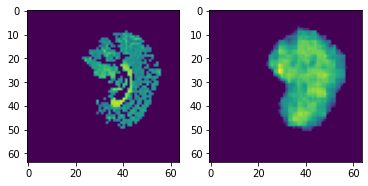

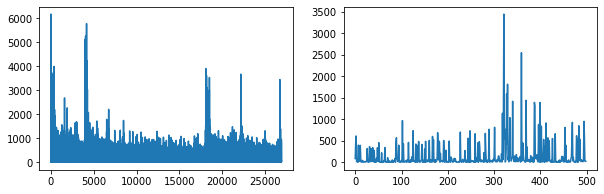

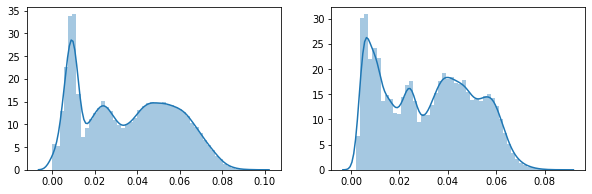

epoch 126/501 | batch 0/214.0 | time 0:34:45.301759 | loss 9.14029
epoch 126/501 | batch 50/214.0 | time 0:34:49.111583 | loss 10.32235
epoch 126/501 | batch 100/214.0 | time 0:34:52.922082 | loss 59.0651
epoch 126/501 | batch 150/214.0 | time 0:34:56.729730 | loss 484.71643
epoch 126/501 | batch 200/214.0 | time 0:35:00.537866 | loss 86.72807
epoch 127/501 | batch 0/214.0 | time 0:35:01.621595 | loss 6.96477
epoch 127/501 | batch 50/214.0 | time 0:35:05.422120 | loss 25.90971
epoch 127/501 | batch 100/214.0 | time 0:35:09.223946 | loss 38.66384
epoch 127/501 | batch 150/214.0 | time 0:35:13.023777 | loss 40.55953
epoch 127/501 | batch 200/214.0 | time 0:35:16.826409 | loss 61.47235
epoch 128/501 | batch 0/214.0 | time 0:35:17.911766 | loss 9.02813
epoch 128/501 | batch 50/214.0 | time 0:35:21.720618 | loss 7.71538
epoch 128/501 | batch 100/214.0 | time 0:35:25.529650 | loss 390.7403
epoch 128/501 | batch 150/214.0 | time 0:35:29.339029 | loss 412.49237
epoch 128/501 | batch 200/214.0 

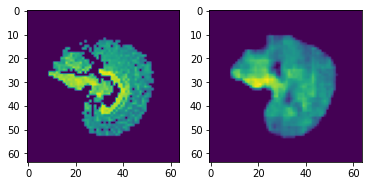

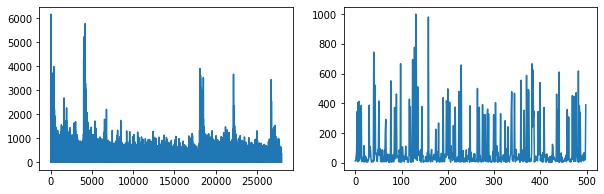

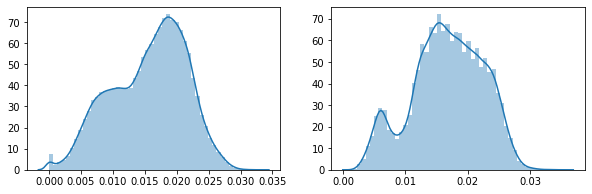

epoch 131/501 | batch 0/214.0 | time 0:36:07.959077 | loss 22.10143
epoch 131/501 | batch 50/214.0 | time 0:36:11.759812 | loss 6.53277
epoch 131/501 | batch 100/214.0 | time 0:36:15.562159 | loss 456.50989
epoch 131/501 | batch 150/214.0 | time 0:36:19.362979 | loss 31.25853
epoch 131/501 | batch 200/214.0 | time 0:36:23.165438 | loss 7.77731
epoch 132/501 | batch 0/214.0 | time 0:36:24.251032 | loss 6.8978
epoch 132/501 | batch 50/214.0 | time 0:36:28.059558 | loss 42.07926
epoch 132/501 | batch 100/214.0 | time 0:36:31.872728 | loss 81.04543
epoch 132/501 | batch 150/214.0 | time 0:36:35.684751 | loss 370.34363
epoch 132/501 | batch 200/214.0 | time 0:36:39.492477 | loss 8.79617
epoch 133/501 | batch 0/214.0 | time 0:36:40.583995 | loss 18.94254
epoch 133/501 | batch 50/214.0 | time 0:36:44.383323 | loss 38.67151
epoch 133/501 | batch 100/214.0 | time 0:36:48.183003 | loss 19.93436
epoch 133/501 | batch 150/214.0 | time 0:36:51.981400 | loss 23.98517
epoch 133/501 | batch 200/214.0 

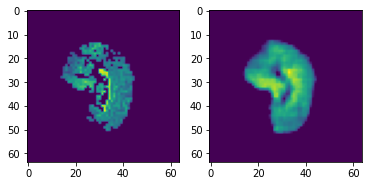

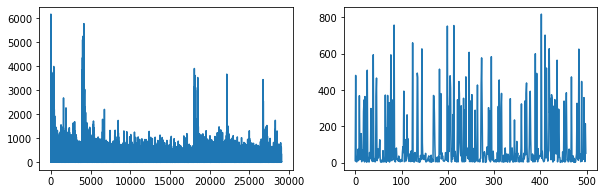

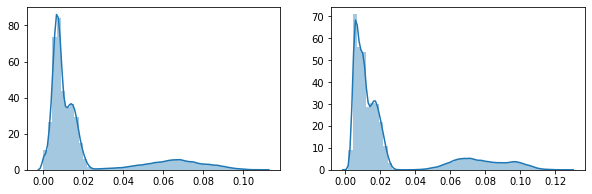

epoch 136/501 | batch 0/214.0 | time 0:37:30.528676 | loss 32.70234
epoch 136/501 | batch 50/214.0 | time 0:37:34.338257 | loss 20.58961
epoch 136/501 | batch 100/214.0 | time 0:37:38.148157 | loss 9.58074
epoch 136/501 | batch 150/214.0 | time 0:37:41.956272 | loss 15.94338
epoch 136/501 | batch 200/214.0 | time 0:37:45.763738 | loss 5.73432
epoch 137/501 | batch 0/214.0 | time 0:37:46.853985 | loss 89.44676
epoch 137/501 | batch 50/214.0 | time 0:37:50.658090 | loss 6.77416
epoch 137/501 | batch 100/214.0 | time 0:37:54.458539 | loss 61.50761
epoch 137/501 | batch 150/214.0 | time 0:37:58.259805 | loss 15.56579
epoch 137/501 | batch 200/214.0 | time 0:38:02.062685 | loss 21.79156
epoch 138/501 | batch 0/214.0 | time 0:38:03.148515 | loss 26.08206
epoch 138/501 | batch 50/214.0 | time 0:38:06.958775 | loss 439.70459
epoch 138/501 | batch 100/214.0 | time 0:38:10.770224 | loss 30.18475
epoch 138/501 | batch 150/214.0 | time 0:38:14.576803 | loss 93.73727
epoch 138/501 | batch 200/214.0

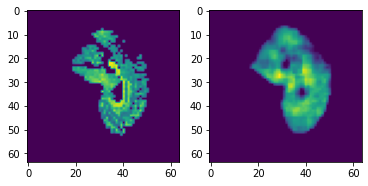

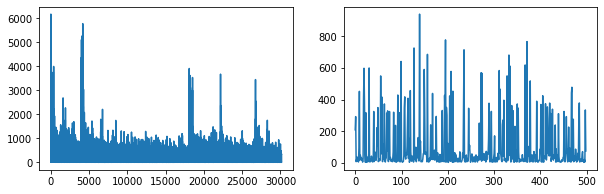

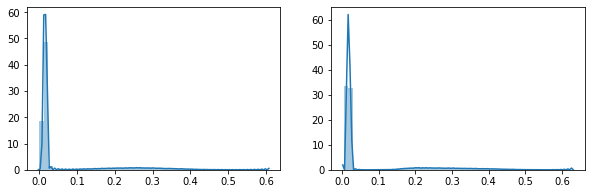

epoch 141/501 | batch 0/214.0 | time 0:38:53.205553 | loss 4.14929
epoch 141/501 | batch 50/214.0 | time 0:38:57.005015 | loss 72.54726
epoch 141/501 | batch 100/214.0 | time 0:39:00.805740 | loss 9.36812
epoch 141/501 | batch 150/214.0 | time 0:39:04.606670 | loss 4.21098
epoch 141/501 | batch 200/214.0 | time 0:39:08.410337 | loss 95.99963
epoch 142/501 | batch 0/214.0 | time 0:39:09.495654 | loss 381.62805
epoch 142/501 | batch 50/214.0 | time 0:39:13.308127 | loss 5.01034
epoch 142/501 | batch 100/214.0 | time 0:39:17.117897 | loss 24.71752
epoch 142/501 | batch 150/214.0 | time 0:39:20.925742 | loss 9.8293
epoch 142/501 | batch 200/214.0 | time 0:39:24.736537 | loss 16.44876
epoch 143/501 | batch 0/214.0 | time 0:39:25.818966 | loss 488.32922
epoch 143/501 | batch 50/214.0 | time 0:39:29.619023 | loss 350.50363
epoch 143/501 | batch 100/214.0 | time 0:39:33.419221 | loss 11.64868
epoch 143/501 | batch 150/214.0 | time 0:39:37.219225 | loss 94.12589
epoch 143/501 | batch 200/214.0 

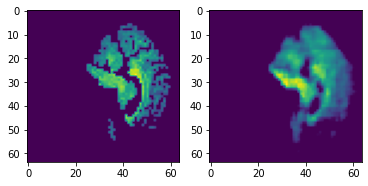

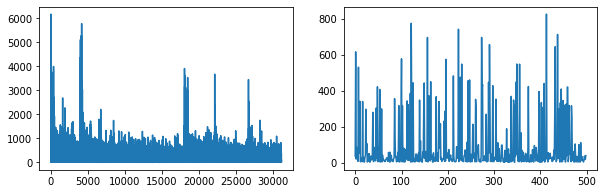

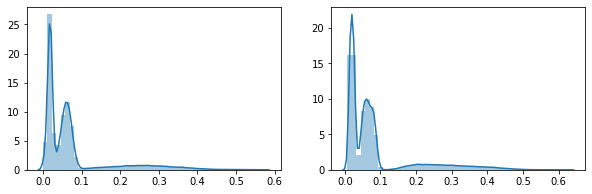

epoch 146/501 | batch 0/214.0 | time 0:40:15.862180 | loss 629.32379
epoch 146/501 | batch 50/214.0 | time 0:40:19.668447 | loss 18.79
epoch 146/501 | batch 100/214.0 | time 0:40:23.477326 | loss 15.92329
epoch 146/501 | batch 150/214.0 | time 0:40:27.285347 | loss 12.22063
epoch 146/501 | batch 200/214.0 | time 0:40:31.094859 | loss 19.58451
epoch 147/501 | batch 0/214.0 | time 0:40:32.178498 | loss 35.84982
epoch 147/501 | batch 50/214.0 | time 0:40:35.978280 | loss 8.30764
epoch 147/501 | batch 100/214.0 | time 0:40:39.777352 | loss 27.56149
epoch 147/501 | batch 150/214.0 | time 0:40:43.580131 | loss 688.51538
epoch 147/501 | batch 200/214.0 | time 0:40:47.380390 | loss 833.25623
epoch 148/501 | batch 0/214.0 | time 0:40:48.465355 | loss 15.42023
epoch 148/501 | batch 50/214.0 | time 0:40:52.273192 | loss 5.23191
epoch 148/501 | batch 100/214.0 | time 0:40:56.080656 | loss 7.73417
epoch 148/501 | batch 150/214.0 | time 0:40:59.887872 | loss 19.03734
epoch 148/501 | batch 200/214.0 

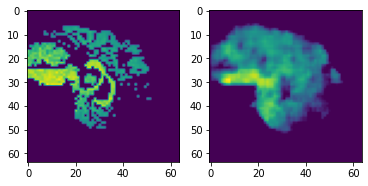

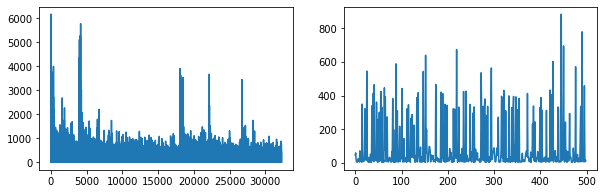

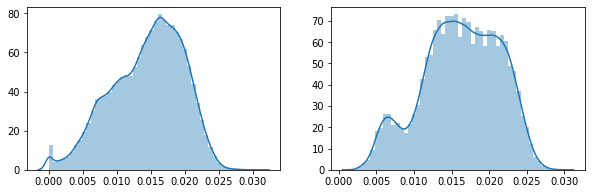

epoch 151/501 | batch 0/214.0 | time 0:41:38.521192 | loss 7.48827
epoch 151/501 | batch 50/214.0 | time 0:41:42.323391 | loss 14.07413
epoch 151/501 | batch 100/214.0 | time 0:41:46.125922 | loss 67.2041
epoch 151/501 | batch 150/214.0 | time 0:41:49.928618 | loss 43.01216
epoch 151/501 | batch 200/214.0 | time 0:41:53.729905 | loss 10.92921
epoch 152/501 | batch 0/214.0 | time 0:41:54.815163 | loss 50.65054
epoch 152/501 | batch 50/214.0 | time 0:41:58.623473 | loss 348.80978
epoch 152/501 | batch 100/214.0 | time 0:42:02.434000 | loss 24.49624
epoch 152/501 | batch 150/214.0 | time 0:42:06.243802 | loss 6.40956
epoch 152/501 | batch 200/214.0 | time 0:42:10.054915 | loss 6.27819
epoch 153/501 | batch 0/214.0 | time 0:42:11.146722 | loss 3.40745
epoch 153/501 | batch 50/214.0 | time 0:42:14.946824 | loss 303.88647
epoch 153/501 | batch 100/214.0 | time 0:42:18.752668 | loss 5.77237
epoch 153/501 | batch 150/214.0 | time 0:42:22.557077 | loss 23.90597
epoch 153/501 | batch 200/214.0 |

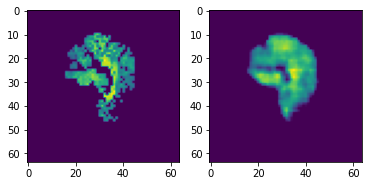

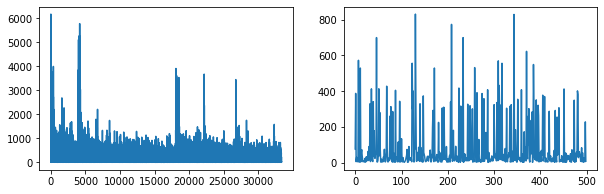

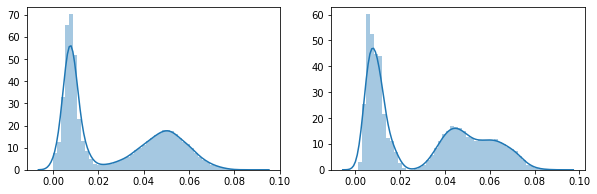

epoch 156/501 | batch 0/214.0 | time 0:43:01.114721 | loss 527.68646
epoch 156/501 | batch 50/214.0 | time 0:43:04.922819 | loss 61.04678
epoch 156/501 | batch 100/214.0 | time 0:43:08.732338 | loss 317.14081
epoch 156/501 | batch 150/214.0 | time 0:43:12.541446 | loss 82.37345
epoch 156/501 | batch 200/214.0 | time 0:43:16.350565 | loss 101.19675
epoch 157/501 | batch 0/214.0 | time 0:43:17.440532 | loss 4.80494
epoch 157/501 | batch 50/214.0 | time 0:43:21.241510 | loss 14.04303
epoch 157/501 | batch 100/214.0 | time 0:43:25.044249 | loss 2.99918
epoch 157/501 | batch 150/214.0 | time 0:43:28.847982 | loss 4.96706
epoch 157/501 | batch 200/214.0 | time 0:43:32.650840 | loss 52.4874
epoch 158/501 | batch 0/214.0 | time 0:43:33.735807 | loss 585.68036
epoch 158/501 | batch 50/214.0 | time 0:43:37.544688 | loss 10.23362
epoch 158/501 | batch 100/214.0 | time 0:43:41.354543 | loss 66.78551
epoch 158/501 | batch 150/214.0 | time 0:43:45.164319 | loss 72.5917
epoch 158/501 | batch 200/214.

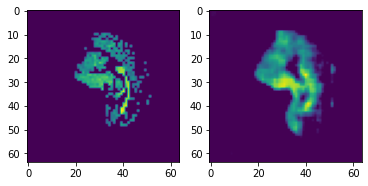

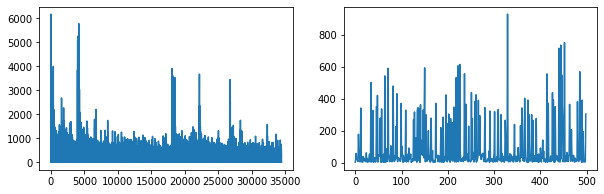

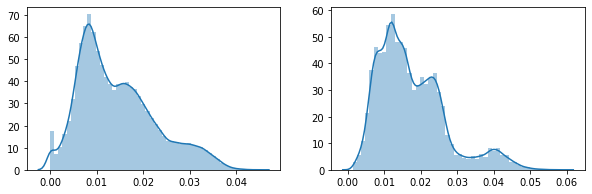

epoch 161/501 | batch 0/214.0 | time 0:44:23.733221 | loss 4.51176
epoch 161/501 | batch 50/214.0 | time 0:44:27.533786 | loss 9.19627
epoch 161/501 | batch 100/214.0 | time 0:44:31.336784 | loss 80.34048
epoch 161/501 | batch 150/214.0 | time 0:44:35.138313 | loss 9.07939
epoch 161/501 | batch 200/214.0 | time 0:44:38.941628 | loss 219.99358
epoch 162/501 | batch 0/214.0 | time 0:44:40.027242 | loss 526.41595
epoch 162/501 | batch 50/214.0 | time 0:44:43.841446 | loss 3.50519
epoch 162/501 | batch 100/214.0 | time 0:44:47.654456 | loss 6.26542
epoch 162/501 | batch 150/214.0 | time 0:44:51.466101 | loss 10.06666
epoch 162/501 | batch 200/214.0 | time 0:44:55.279662 | loss 6.65393
epoch 163/501 | batch 0/214.0 | time 0:44:56.363752 | loss 9.11033
epoch 163/501 | batch 50/214.0 | time 0:45:00.168437 | loss 62.42845
epoch 163/501 | batch 100/214.0 | time 0:45:03.970176 | loss 18.86201
epoch 163/501 | batch 150/214.0 | time 0:45:07.772536 | loss 11.09763
epoch 163/501 | batch 200/214.0 | 

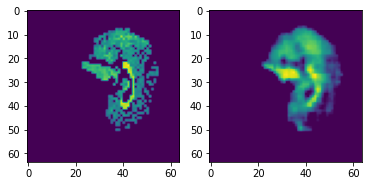

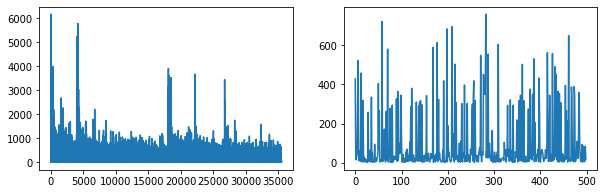

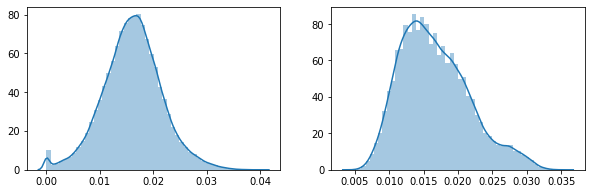

epoch 166/501 | batch 0/214.0 | time 0:45:46.446214 | loss 71.45266
epoch 166/501 | batch 50/214.0 | time 0:45:50.254372 | loss 6.61344
epoch 166/501 | batch 100/214.0 | time 0:45:54.063975 | loss 12.43834
epoch 166/501 | batch 150/214.0 | time 0:45:57.874645 | loss 2.27396
epoch 166/501 | batch 200/214.0 | time 0:46:01.685902 | loss 26.35133
epoch 167/501 | batch 0/214.0 | time 0:46:02.770149 | loss 92.7981
epoch 167/501 | batch 50/214.0 | time 0:46:06.574424 | loss 4.03357
epoch 167/501 | batch 100/214.0 | time 0:46:10.380032 | loss 26.80053
epoch 167/501 | batch 150/214.0 | time 0:46:14.183823 | loss 28.77921
epoch 167/501 | batch 200/214.0 | time 0:46:17.988808 | loss 41.60765
epoch 168/501 | batch 0/214.0 | time 0:46:19.074224 | loss 309.08063
epoch 168/501 | batch 50/214.0 | time 0:46:22.882745 | loss 5.97455
epoch 168/501 | batch 100/214.0 | time 0:46:26.693677 | loss 386.4903
epoch 168/501 | batch 150/214.0 | time 0:46:30.505740 | loss 37.46743
epoch 168/501 | batch 200/214.0 |

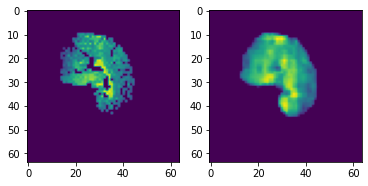

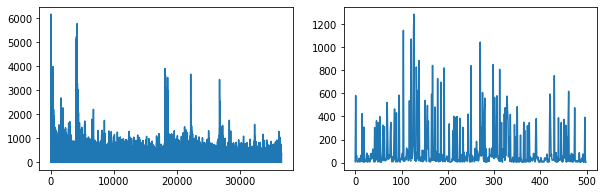

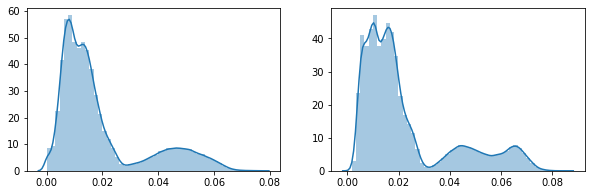

epoch 171/501 | batch 0/214.0 | time 0:47:09.079686 | loss 12.76619
epoch 171/501 | batch 50/214.0 | time 0:47:12.882767 | loss 2.95469
epoch 171/501 | batch 100/214.0 | time 0:47:16.686496 | loss 8.49272
epoch 171/501 | batch 150/214.0 | time 0:47:20.487937 | loss 91.96036
epoch 171/501 | batch 200/214.0 | time 0:47:24.288615 | loss 38.42336
epoch 172/501 | batch 0/214.0 | time 0:47:25.372953 | loss 20.1725
epoch 172/501 | batch 50/214.0 | time 0:47:29.180333 | loss 24.54485
epoch 172/501 | batch 100/214.0 | time 0:47:32.992063 | loss 16.44145
epoch 172/501 | batch 150/214.0 | time 0:47:36.805960 | loss 17.99707
epoch 172/501 | batch 200/214.0 | time 0:47:40.616672 | loss 4.00416
epoch 173/501 | batch 0/214.0 | time 0:47:41.708496 | loss 8.28999
epoch 173/501 | batch 50/214.0 | time 0:47:45.510464 | loss 17.17245
epoch 173/501 | batch 100/214.0 | time 0:47:49.313802 | loss 38.33844
epoch 173/501 | batch 150/214.0 | time 0:47:53.114360 | loss 19.58158
epoch 173/501 | batch 200/214.0 | 

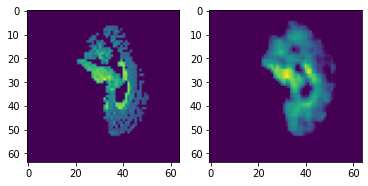

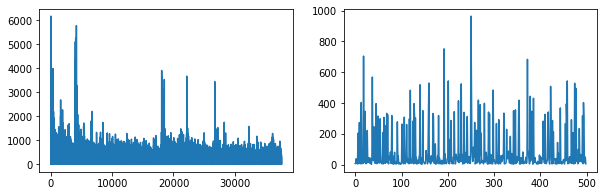

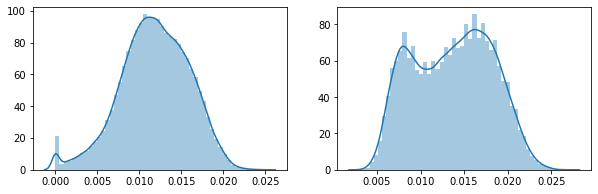

epoch 176/501 | batch 0/214.0 | time 0:48:31.677325 | loss 404.47644
epoch 176/501 | batch 50/214.0 | time 0:48:35.486068 | loss 377.64462
epoch 176/501 | batch 100/214.0 | time 0:48:39.299861 | loss 22.63557
epoch 176/501 | batch 150/214.0 | time 0:48:43.108551 | loss 397.38361
epoch 176/501 | batch 200/214.0 | time 0:48:46.914997 | loss 19.937
epoch 177/501 | batch 0/214.0 | time 0:48:48.005886 | loss 15.85401
epoch 177/501 | batch 50/214.0 | time 0:48:51.804347 | loss 25.66221
epoch 177/501 | batch 100/214.0 | time 0:48:55.605811 | loss 5.97533
epoch 177/501 | batch 150/214.0 | time 0:48:59.404037 | loss 24.93822
epoch 177/501 | batch 200/214.0 | time 0:49:03.208273 | loss 43.74084
epoch 178/501 | batch 0/214.0 | time 0:49:04.292876 | loss 9.78727
epoch 178/501 | batch 50/214.0 | time 0:49:08.102734 | loss 6.83029
epoch 178/501 | batch 100/214.0 | time 0:49:11.913117 | loss 79.47406
epoch 178/501 | batch 150/214.0 | time 0:49:15.721571 | loss 35.24017
epoch 178/501 | batch 200/214.0

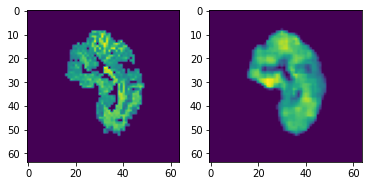

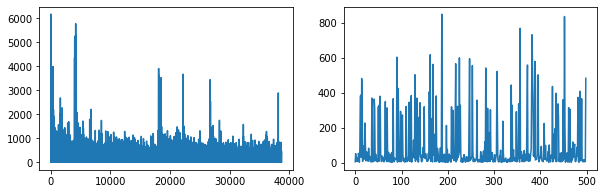

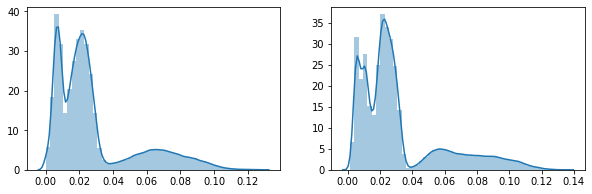

epoch 181/501 | batch 0/214.0 | time 0:49:54.383819 | loss 61.27622
epoch 181/501 | batch 50/214.0 | time 0:49:58.185365 | loss 28.41641
epoch 181/501 | batch 100/214.0 | time 0:50:01.987691 | loss 16.64634
epoch 181/501 | batch 150/214.0 | time 0:50:05.789570 | loss 8.23928
epoch 181/501 | batch 200/214.0 | time 0:50:09.591480 | loss 14.91551
epoch 182/501 | batch 0/214.0 | time 0:50:10.677181 | loss 22.50987
epoch 182/501 | batch 50/214.0 | time 0:50:14.492616 | loss 296.45844
epoch 182/501 | batch 100/214.0 | time 0:50:18.306185 | loss 28.71511
epoch 182/501 | batch 150/214.0 | time 0:50:22.119227 | loss 5.96022
epoch 182/501 | batch 200/214.0 | time 0:50:25.934516 | loss 24.49274
epoch 183/501 | batch 0/214.0 | time 0:50:27.017578 | loss 4.28035
epoch 183/501 | batch 50/214.0 | time 0:50:30.823777 | loss 20.0624
epoch 183/501 | batch 100/214.0 | time 0:50:34.634493 | loss 25.47174
epoch 183/501 | batch 150/214.0 | time 0:50:38.441999 | loss 5.78802
epoch 183/501 | batch 200/214.0 |

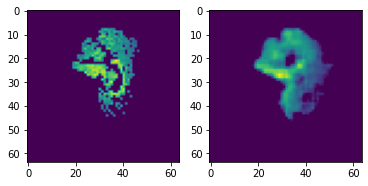

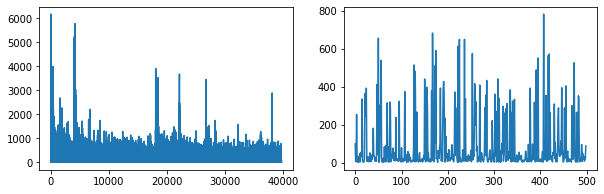

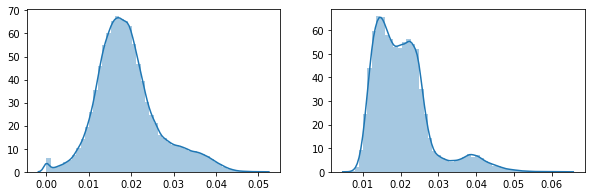

epoch 186/501 | batch 0/214.0 | time 0:51:17.044969 | loss 23.39133
epoch 186/501 | batch 50/214.0 | time 0:51:20.853559 | loss 18.26249
epoch 186/501 | batch 100/214.0 | time 0:51:24.662475 | loss 15.54222
epoch 186/501 | batch 150/214.0 | time 0:51:28.474346 | loss 303.65515
epoch 186/501 | batch 200/214.0 | time 0:51:32.285759 | loss 21.30051
epoch 187/501 | batch 0/214.0 | time 0:51:33.368750 | loss 328.33087
epoch 187/501 | batch 50/214.0 | time 0:51:37.171032 | loss 64.73518
epoch 187/501 | batch 100/214.0 | time 0:51:40.973391 | loss 69.2069
epoch 187/501 | batch 150/214.0 | time 0:51:44.779629 | loss 19.80845
epoch 187/501 | batch 200/214.0 | time 0:51:48.585079 | loss 4.27253
epoch 188/501 | batch 0/214.0 | time 0:51:49.670602 | loss 4.87864
epoch 188/501 | batch 50/214.0 | time 0:51:53.482010 | loss 7.76469
epoch 188/501 | batch 100/214.0 | time 0:51:57.291370 | loss 17.34273
epoch 188/501 | batch 150/214.0 | time 0:52:01.101928 | loss 11.94984
epoch 188/501 | batch 200/214.0

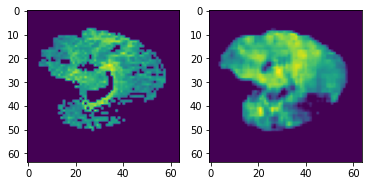

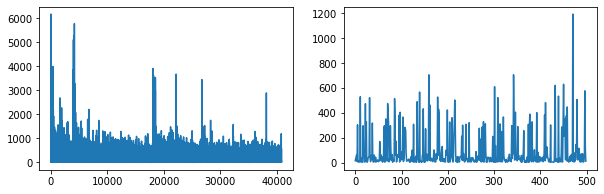

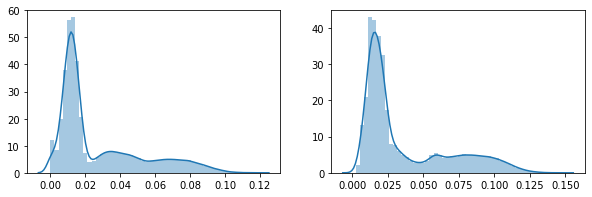

epoch 191/501 | batch 0/214.0 | time 0:52:39.688831 | loss 66.12938
epoch 191/501 | batch 50/214.0 | time 0:52:43.489620 | loss 910.48346
epoch 191/501 | batch 100/214.0 | time 0:52:47.293900 | loss 10.64894
epoch 191/501 | batch 150/214.0 | time 0:52:51.095013 | loss 4.66202
epoch 191/501 | batch 200/214.0 | time 0:52:54.895006 | loss 382.61237
epoch 192/501 | batch 0/214.0 | time 0:52:55.979830 | loss 44.11856
epoch 192/501 | batch 50/214.0 | time 0:52:59.791315 | loss 88.57886
epoch 192/501 | batch 100/214.0 | time 0:53:03.605587 | loss 5.84978
epoch 192/501 | batch 150/214.0 | time 0:53:07.417779 | loss 5.54604
epoch 192/501 | batch 200/214.0 | time 0:53:11.231899 | loss 334.00183
epoch 193/501 | batch 0/214.0 | time 0:53:12.323442 | loss 88.12446
epoch 193/501 | batch 50/214.0 | time 0:53:16.125961 | loss 24.78647
epoch 193/501 | batch 100/214.0 | time 0:53:19.931276 | loss 33.31732
epoch 193/501 | batch 150/214.0 | time 0:53:23.737001 | loss 55.25558
epoch 193/501 | batch 200/214

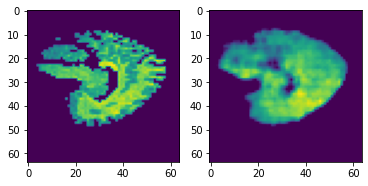

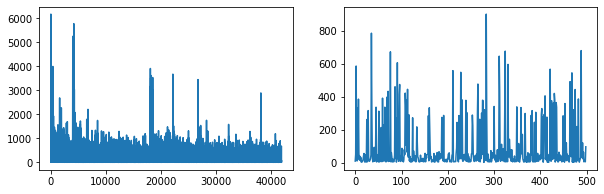

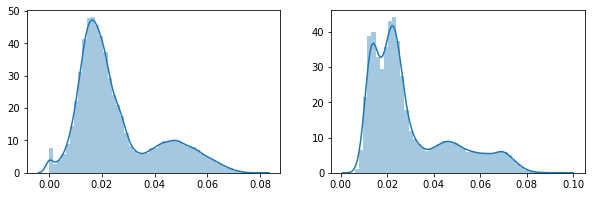

epoch 196/501 | batch 0/214.0 | time 0:54:02.411577 | loss 4.59701
epoch 196/501 | batch 50/214.0 | time 0:54:06.225166 | loss 66.95567
epoch 196/501 | batch 100/214.0 | time 0:54:10.038137 | loss 65.65922
epoch 196/501 | batch 150/214.0 | time 0:54:13.852117 | loss 22.81731
epoch 196/501 | batch 200/214.0 | time 0:54:17.664557 | loss 4.5656
epoch 197/501 | batch 0/214.0 | time 0:54:18.757495 | loss 41.16225
epoch 197/501 | batch 50/214.0 | time 0:54:22.562768 | loss 24.32145
epoch 197/501 | batch 100/214.0 | time 0:54:26.368782 | loss 26.29215
epoch 197/501 | batch 150/214.0 | time 0:54:30.175021 | loss 5.607
epoch 197/501 | batch 200/214.0 | time 0:54:33.977181 | loss 3.24599
epoch 198/501 | batch 0/214.0 | time 0:54:35.062208 | loss 9.95575
epoch 198/501 | batch 50/214.0 | time 0:54:38.875601 | loss 8.71237
epoch 198/501 | batch 100/214.0 | time 0:54:42.691123 | loss 377.2757
epoch 198/501 | batch 150/214.0 | time 0:54:46.502474 | loss 10.4723
epoch 198/501 | batch 200/214.0 | time 

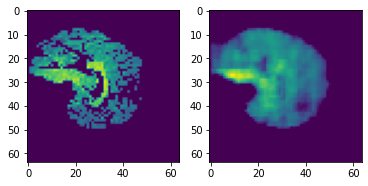

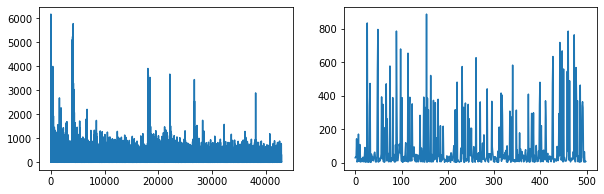

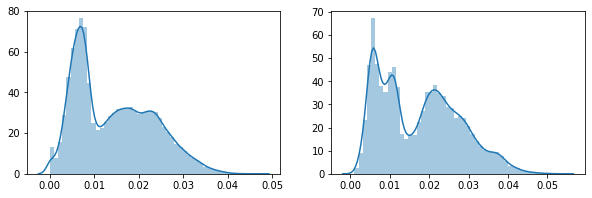

epoch 201/501 | batch 0/214.0 | time 0:55:25.185715 | loss 8.60178
epoch 201/501 | batch 50/214.0 | time 0:55:28.991837 | loss 127.94714
epoch 201/501 | batch 100/214.0 | time 0:55:32.798162 | loss 41.54884
epoch 201/501 | batch 150/214.0 | time 0:55:36.608286 | loss 259.79556
epoch 201/501 | batch 200/214.0 | time 0:55:40.416775 | loss 258.89359
epoch 202/501 | batch 0/214.0 | time 0:55:41.502082 | loss 38.20774
epoch 202/501 | batch 50/214.0 | time 0:55:45.318253 | loss 8.82362
epoch 202/501 | batch 100/214.0 | time 0:55:49.133855 | loss 121.40092
epoch 202/501 | batch 150/214.0 | time 0:55:52.949881 | loss 3.61175
epoch 202/501 | batch 200/214.0 | time 0:55:56.769078 | loss 13.68967
epoch 203/501 | batch 0/214.0 | time 0:55:57.854205 | loss 29.43153
epoch 203/501 | batch 50/214.0 | time 0:56:01.664111 | loss 7.59277
epoch 203/501 | batch 100/214.0 | time 0:56:05.470120 | loss 258.46198
epoch 203/501 | batch 150/214.0 | time 0:56:09.277929 | loss 16.24936
epoch 203/501 | batch 200/21

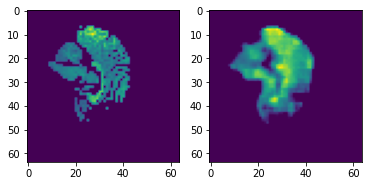

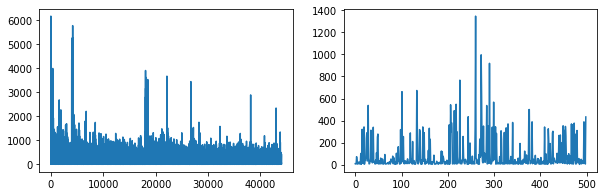

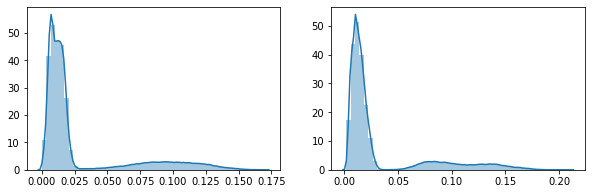

epoch 206/501 | batch 0/214.0 | time 0:56:47.954847 | loss 48.78313
epoch 206/501 | batch 50/214.0 | time 0:56:51.767521 | loss 52.28358
epoch 206/501 | batch 100/214.0 | time 0:56:55.582125 | loss 27.37632
epoch 206/501 | batch 150/214.0 | time 0:56:59.397749 | loss 8.76594
epoch 206/501 | batch 200/214.0 | time 0:57:03.218006 | loss 49.81121
epoch 207/501 | batch 0/214.0 | time 0:57:04.304423 | loss 29.76684
epoch 207/501 | batch 50/214.0 | time 0:57:08.111833 | loss 5.93853
epoch 207/501 | batch 100/214.0 | time 0:57:11.919153 | loss 53.48503
epoch 207/501 | batch 150/214.0 | time 0:57:15.723997 | loss 32.3932
epoch 207/501 | batch 200/214.0 | time 0:57:19.531271 | loss 41.58095
epoch 208/501 | batch 0/214.0 | time 0:57:20.617862 | loss 116.50874
epoch 208/501 | batch 50/214.0 | time 0:57:24.429313 | loss 29.6037
epoch 208/501 | batch 100/214.0 | time 0:57:28.243415 | loss 4.79634
epoch 208/501 | batch 150/214.0 | time 0:57:32.060552 | loss 60.50948
epoch 208/501 | batch 200/214.0 |

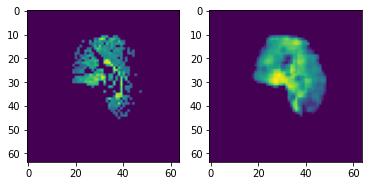

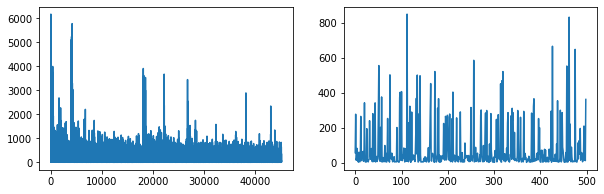

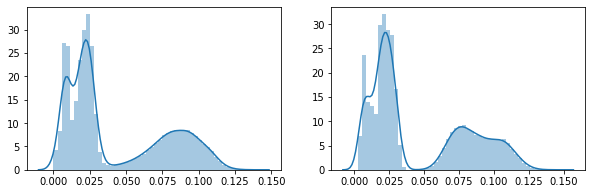

epoch 211/501 | batch 0/214.0 | time 0:58:10.661582 | loss 295.90985
epoch 211/501 | batch 50/214.0 | time 0:58:14.462780 | loss 14.10765
epoch 211/501 | batch 100/214.0 | time 0:58:18.265310 | loss 4.11577
epoch 211/501 | batch 150/214.0 | time 0:58:22.066949 | loss 46.48007
epoch 211/501 | batch 200/214.0 | time 0:58:25.871253 | loss 59.50244
epoch 212/501 | batch 0/214.0 | time 0:58:26.956276 | loss 25.86016
epoch 212/501 | batch 50/214.0 | time 0:58:30.767693 | loss 3.0241
epoch 212/501 | batch 100/214.0 | time 0:58:34.578215 | loss 6.60314
epoch 212/501 | batch 150/214.0 | time 0:58:38.389115 | loss 4.25185
epoch 212/501 | batch 200/214.0 | time 0:58:42.200432 | loss 29.03074
epoch 213/501 | batch 0/214.0 | time 0:58:43.292333 | loss 12.92431
epoch 213/501 | batch 50/214.0 | time 0:58:47.091603 | loss 4.73568
epoch 213/501 | batch 100/214.0 | time 0:58:50.892262 | loss 11.11847
epoch 213/501 | batch 150/214.0 | time 0:58:54.692363 | loss 3.12677
epoch 213/501 | batch 200/214.0 | t

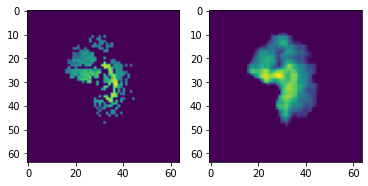

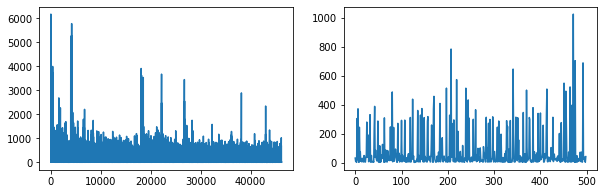

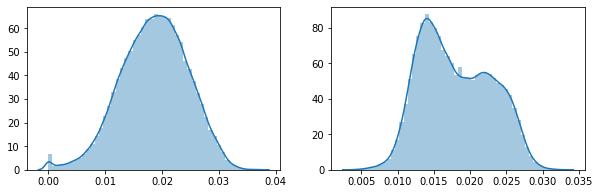

epoch 216/501 | batch 0/214.0 | time 0:59:33.240203 | loss 6.61414
epoch 216/501 | batch 50/214.0 | time 0:59:37.050072 | loss 11.5184
epoch 216/501 | batch 100/214.0 | time 0:59:40.861689 | loss 9.04014
epoch 216/501 | batch 150/214.0 | time 0:59:44.673357 | loss 46.89237
epoch 216/501 | batch 200/214.0 | time 0:59:48.484632 | loss 8.55895
epoch 217/501 | batch 0/214.0 | time 0:59:49.576159 | loss 31.26115
epoch 217/501 | batch 50/214.0 | time 0:59:53.380306 | loss 9.47346
epoch 217/501 | batch 100/214.0 | time 0:59:57.182575 | loss 15.98411
epoch 217/501 | batch 150/214.0 | time 1:00:00.988149 | loss 6.50638
epoch 217/501 | batch 200/214.0 | time 1:00:04.792987 | loss 17.81938
epoch 218/501 | batch 0/214.0 | time 1:00:05.878356 | loss 8.17676
epoch 218/501 | batch 50/214.0 | time 1:00:09.690791 | loss 710.38892
epoch 218/501 | batch 100/214.0 | time 1:00:13.503745 | loss 14.67399
epoch 218/501 | batch 150/214.0 | time 1:00:17.311873 | loss 124.40245
epoch 218/501 | batch 200/214.0 | 

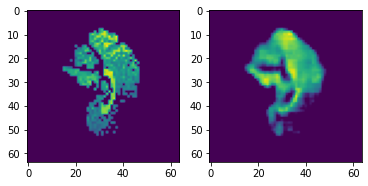

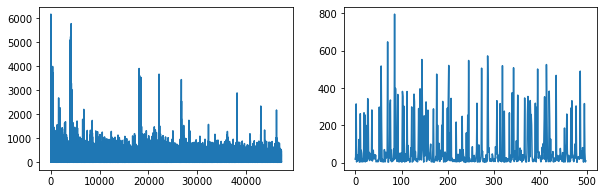

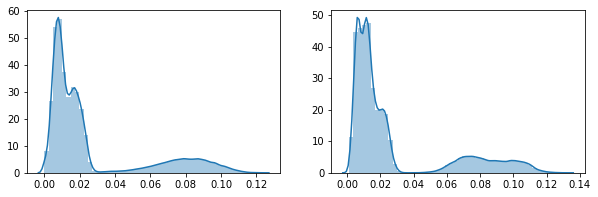

epoch 221/501 | batch 0/214.0 | time 1:00:55.918870 | loss 29.40623
epoch 221/501 | batch 50/214.0 | time 1:00:59.718152 | loss 15.40592
epoch 221/501 | batch 100/214.0 | time 1:01:03.519637 | loss 9.05529
epoch 221/501 | batch 150/214.0 | time 1:01:07.320245 | loss 49.4759
epoch 221/501 | batch 200/214.0 | time 1:01:11.118221 | loss 15.22182
epoch 222/501 | batch 0/214.0 | time 1:01:12.204722 | loss 4.2793
epoch 222/501 | batch 50/214.0 | time 1:01:16.016605 | loss 70.33469
epoch 222/501 | batch 100/214.0 | time 1:01:19.825342 | loss 8.10123
epoch 222/501 | batch 150/214.0 | time 1:01:23.632853 | loss 53.01023
epoch 222/501 | batch 200/214.0 | time 1:01:27.437093 | loss 26.39758
epoch 223/501 | batch 0/214.0 | time 1:01:28.519683 | loss 5.41607
epoch 223/501 | batch 50/214.0 | time 1:01:32.320875 | loss 261.68274
epoch 223/501 | batch 100/214.0 | time 1:01:36.119412 | loss 48.8822
epoch 223/501 | batch 150/214.0 | time 1:01:39.917862 | loss 76.84193
epoch 223/501 | batch 200/214.0 | t

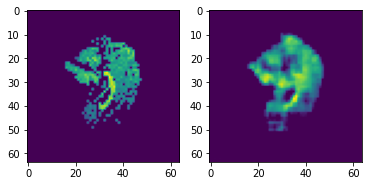

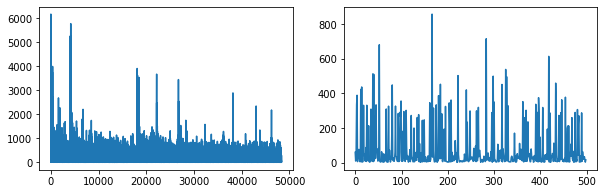

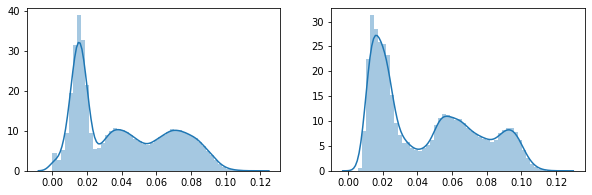

epoch 226/501 | batch 0/214.0 | time 1:02:18.478363 | loss 241.0625
epoch 226/501 | batch 50/214.0 | time 1:02:22.286537 | loss 303.99725
epoch 226/501 | batch 100/214.0 | time 1:02:26.092928 | loss 23.16026
epoch 226/501 | batch 150/214.0 | time 1:02:29.902302 | loss 33.81281
epoch 226/501 | batch 200/214.0 | time 1:02:33.708012 | loss 49.03575
epoch 227/501 | batch 0/214.0 | time 1:02:34.788686 | loss 44.14417
epoch 227/501 | batch 50/214.0 | time 1:02:38.587411 | loss 25.84379
epoch 227/501 | batch 100/214.0 | time 1:02:42.387118 | loss 61.78432
epoch 227/501 | batch 150/214.0 | time 1:02:46.187583 | loss 5.39708
epoch 227/501 | batch 200/214.0 | time 1:02:49.993883 | loss 12.60737
epoch 228/501 | batch 0/214.0 | time 1:02:51.078226 | loss 4.27004
epoch 228/501 | batch 50/214.0 | time 1:02:54.886128 | loss 46.99495
epoch 228/501 | batch 100/214.0 | time 1:02:58.694116 | loss 3.42982
epoch 228/501 | batch 150/214.0 | time 1:03:02.498514 | loss 76.82559
epoch 228/501 | batch 200/214.0

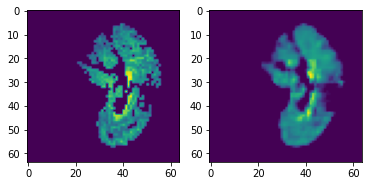

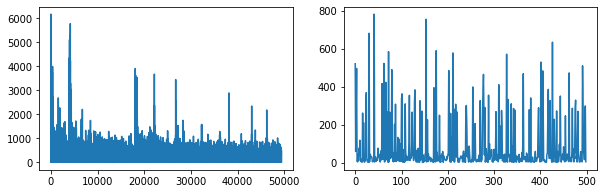

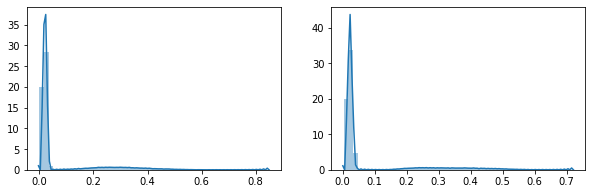

epoch 231/501 | batch 0/214.0 | time 1:03:41.036563 | loss 23.92211
epoch 231/501 | batch 50/214.0 | time 1:03:44.836210 | loss 7.23125
epoch 231/501 | batch 100/214.0 | time 1:03:48.637084 | loss 16.84785
epoch 231/501 | batch 150/214.0 | time 1:03:52.438141 | loss 74.61332
epoch 231/501 | batch 200/214.0 | time 1:03:56.237440 | loss 30.29133
epoch 232/501 | batch 0/214.0 | time 1:03:57.320935 | loss 52.83944
epoch 232/501 | batch 50/214.0 | time 1:04:01.128696 | loss 6.47044
epoch 232/501 | batch 100/214.0 | time 1:04:04.938486 | loss 38.60781
epoch 232/501 | batch 150/214.0 | time 1:04:08.745016 | loss 4.51142
epoch 232/501 | batch 200/214.0 | time 1:04:12.554081 | loss 23.10063
epoch 233/501 | batch 0/214.0 | time 1:04:13.644831 | loss 775.02399
epoch 233/501 | batch 50/214.0 | time 1:04:17.442952 | loss 22.53415
epoch 233/501 | batch 100/214.0 | time 1:04:21.242051 | loss 7.67602
epoch 233/501 | batch 150/214.0 | time 1:04:25.041138 | loss 33.47647
epoch 233/501 | batch 200/214.0 

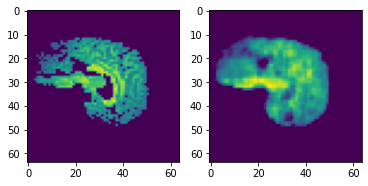

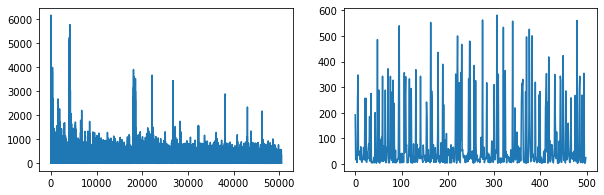

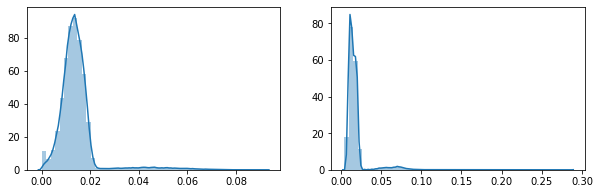

epoch 236/501 | batch 0/214.0 | time 1:05:03.626274 | loss 23.35057
epoch 236/501 | batch 50/214.0 | time 1:05:07.434800 | loss 31.52349
epoch 236/501 | batch 100/214.0 | time 1:05:11.241012 | loss 12.72238
epoch 236/501 | batch 150/214.0 | time 1:05:15.047626 | loss 413.47906
epoch 236/501 | batch 200/214.0 | time 1:05:18.856657 | loss 20.42428
epoch 237/501 | batch 0/214.0 | time 1:05:19.946677 | loss 43.49739
epoch 237/501 | batch 50/214.0 | time 1:05:23.745171 | loss 42.14397
epoch 237/501 | batch 100/214.0 | time 1:05:27.545194 | loss 62.7485
epoch 237/501 | batch 150/214.0 | time 1:05:31.347086 | loss 10.71676
epoch 237/501 | batch 200/214.0 | time 1:05:35.151072 | loss 59.1643
epoch 238/501 | batch 0/214.0 | time 1:05:36.236088 | loss 27.62046
epoch 238/501 | batch 50/214.0 | time 1:05:40.044146 | loss 5.45784
epoch 238/501 | batch 100/214.0 | time 1:05:43.850207 | loss 30.39846
epoch 238/501 | batch 150/214.0 | time 1:05:47.657130 | loss 4.54094
epoch 238/501 | batch 200/214.0 

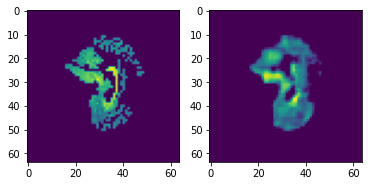

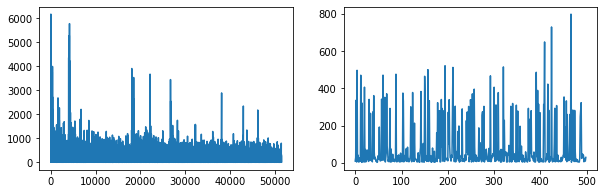

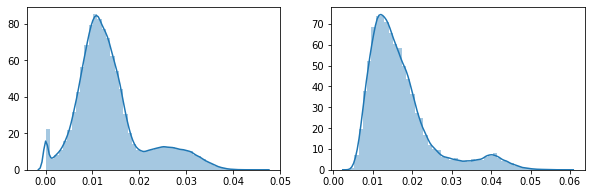

epoch 241/501 | batch 0/214.0 | time 1:06:26.206756 | loss 7.14471
epoch 241/501 | batch 50/214.0 | time 1:06:30.010137 | loss 20.20767
epoch 241/501 | batch 100/214.0 | time 1:06:33.813418 | loss 205.43808
epoch 241/501 | batch 150/214.0 | time 1:06:37.614405 | loss 25.94191
epoch 241/501 | batch 200/214.0 | time 1:06:41.412646 | loss 3314.10327
epoch 242/501 | batch 0/214.0 | time 1:06:42.495900 | loss 213.87737
epoch 242/501 | batch 50/214.0 | time 1:06:46.301602 | loss 223.39781
epoch 242/501 | batch 100/214.0 | time 1:06:50.106796 | loss 580.50708
epoch 242/501 | batch 150/214.0 | time 1:06:53.912777 | loss 724.88434
epoch 242/501 | batch 200/214.0 | time 1:06:57.719689 | loss 87.96107
epoch 243/501 | batch 0/214.0 | time 1:06:58.801659 | loss 44.1622
epoch 243/501 | batch 50/214.0 | time 1:07:02.603217 | loss 69.88277
epoch 243/501 | batch 100/214.0 | time 1:07:06.405843 | loss 2795.96729
epoch 243/501 | batch 150/214.0 | time 1:07:10.204233 | loss 107.61185
epoch 243/501 | batch

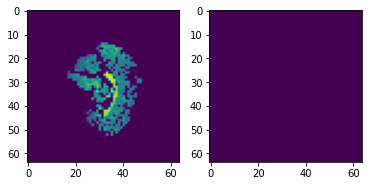

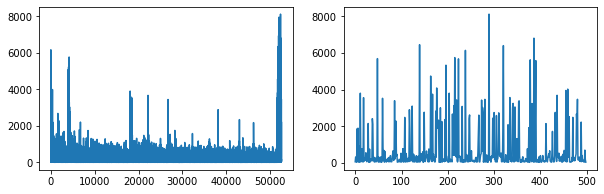

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


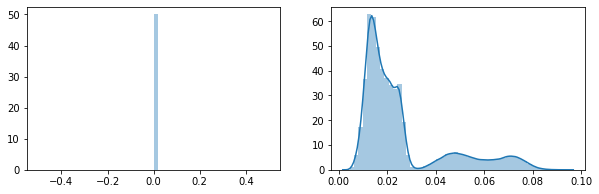

epoch 246/501 | batch 0/214.0 | time 1:07:48.656765 | loss 321.70197
epoch 246/501 | batch 50/214.0 | time 1:07:52.461359 | loss 565.44586
epoch 246/501 | batch 100/214.0 | time 1:07:56.266947 | loss 226.00571
epoch 246/501 | batch 150/214.0 | time 1:08:00.071458 | loss 204.26732
epoch 246/501 | batch 200/214.0 | time 1:08:03.879177 | loss 672.82727
epoch 247/501 | batch 0/214.0 | time 1:08:04.961317 | loss 58.22525
epoch 247/501 | batch 50/214.0 | time 1:08:08.759090 | loss 384.84564
epoch 247/501 | batch 100/214.0 | time 1:08:12.558142 | loss 59.18554
epoch 247/501 | batch 150/214.0 | time 1:08:16.355857 | loss 537.76636
epoch 247/501 | batch 200/214.0 | time 1:08:20.151348 | loss 2794.82764
epoch 248/501 | batch 0/214.0 | time 1:08:21.234522 | loss 166.11414
epoch 248/501 | batch 50/214.0 | time 1:08:25.038245 | loss 1011.07611
epoch 248/501 | batch 100/214.0 | time 1:08:28.843283 | loss 211.32805
epoch 248/501 | batch 150/214.0 | time 1:08:32.647409 | loss 6811.72266
epoch 248/501 

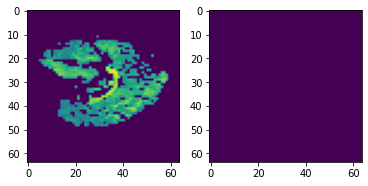

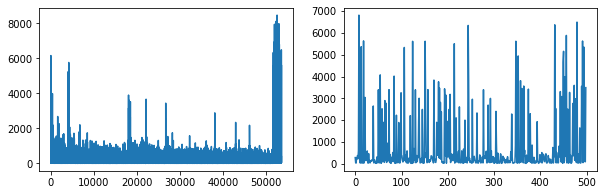

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


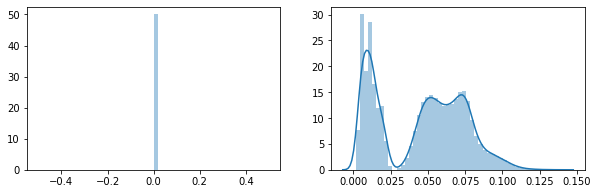

epoch 251/501 | batch 0/214.0 | time 1:09:11.215912 | loss 4132.65527
epoch 251/501 | batch 50/214.0 | time 1:09:15.011571 | loss 121.05007
epoch 251/501 | batch 100/214.0 | time 1:09:18.811592 | loss 5560.23975
epoch 251/501 | batch 150/214.0 | time 1:09:22.610961 | loss 907.40039
epoch 251/501 | batch 200/214.0 | time 1:09:26.411342 | loss 40.02401
epoch 252/501 | batch 0/214.0 | time 1:09:27.494440 | loss 36.88263
epoch 252/501 | batch 50/214.0 | time 1:09:31.301129 | loss 26.5527
epoch 252/501 | batch 100/214.0 | time 1:09:35.105188 | loss 205.90573
epoch 252/501 | batch 150/214.0 | time 1:09:38.916365 | loss 63.09776
epoch 252/501 | batch 200/214.0 | time 1:09:42.725473 | loss 40.78508
epoch 253/501 | batch 0/214.0 | time 1:09:43.814920 | loss 60.47367
epoch 253/501 | batch 50/214.0 | time 1:09:47.610858 | loss 1871.00684
epoch 253/501 | batch 100/214.0 | time 1:09:51.408439 | loss 164.81068
epoch 253/501 | batch 150/214.0 | time 1:09:55.204222 | loss 32.45742
epoch 253/501 | batc

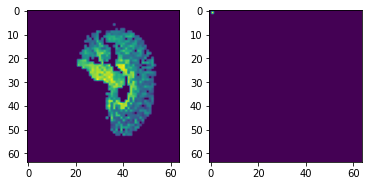

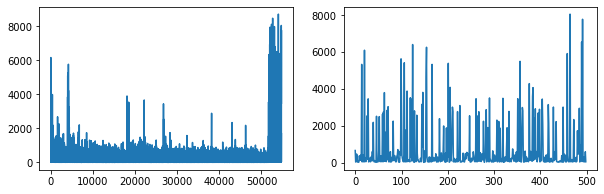

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


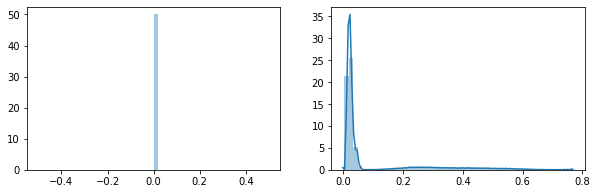

epoch 256/501 | batch 0/214.0 | time 1:10:33.723148 | loss 305.44467
epoch 256/501 | batch 50/214.0 | time 1:10:37.536722 | loss 204.08499
epoch 256/501 | batch 100/214.0 | time 1:10:41.347629 | loss 76.06124
epoch 256/501 | batch 150/214.0 | time 1:10:45.156439 | loss 3363.77539
epoch 256/501 | batch 200/214.0 | time 1:10:48.961355 | loss 2802.83008
epoch 257/501 | batch 0/214.0 | time 1:10:50.050150 | loss 40.86869
epoch 257/501 | batch 50/214.0 | time 1:10:53.846557 | loss 309.35815
epoch 257/501 | batch 100/214.0 | time 1:10:57.643154 | loss 84.46573
epoch 257/501 | batch 150/214.0 | time 1:11:01.443085 | loss 513.38025
epoch 257/501 | batch 200/214.0 | time 1:11:05.241932 | loss 329.40356
epoch 258/501 | batch 0/214.0 | time 1:11:06.324991 | loss 47.87333
epoch 258/501 | batch 50/214.0 | time 1:11:10.130796 | loss 113.81471
epoch 258/501 | batch 100/214.0 | time 1:11:13.941213 | loss 180.07527
epoch 258/501 | batch 150/214.0 | time 1:11:17.750495 | loss 282.25012
epoch 258/501 | b

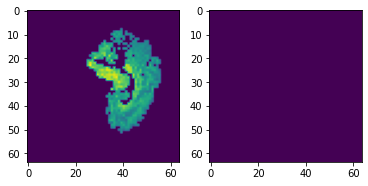

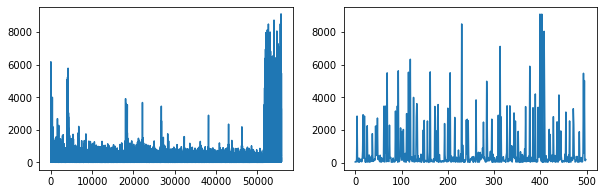

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


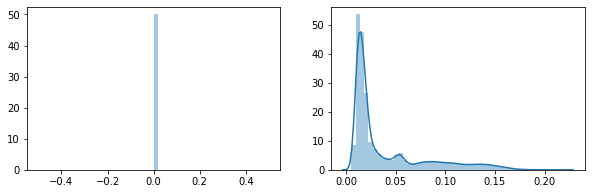

epoch 261/501 | batch 0/214.0 | time 1:11:56.248890 | loss 42.55182
epoch 261/501 | batch 50/214.0 | time 1:12:00.044889 | loss 2527.43604
epoch 261/501 | batch 100/214.0 | time 1:12:03.844712 | loss 46.24878
epoch 261/501 | batch 150/214.0 | time 1:12:07.641921 | loss 2110.05566
epoch 261/501 | batch 200/214.0 | time 1:12:11.439690 | loss 100.43046
epoch 262/501 | batch 0/214.0 | time 1:12:12.523618 | loss 332.21423
epoch 262/501 | batch 50/214.0 | time 1:12:16.331799 | loss 47.31091
epoch 262/501 | batch 100/214.0 | time 1:12:20.140618 | loss 47.36946
epoch 262/501 | batch 150/214.0 | time 1:12:23.948134 | loss 436.42325
epoch 262/501 | batch 200/214.0 | time 1:12:27.755617 | loss 63.78134
epoch 263/501 | batch 0/214.0 | time 1:12:28.837357 | loss 44.20238
epoch 263/501 | batch 50/214.0 | time 1:12:32.636640 | loss 47.15298
epoch 263/501 | batch 100/214.0 | time 1:12:36.436265 | loss 324.21088
epoch 263/501 | batch 150/214.0 | time 1:12:40.235404 | loss 163.41307
epoch 263/501 | batc

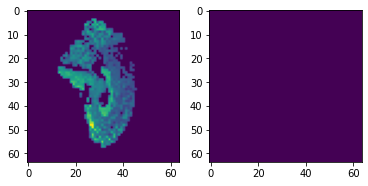

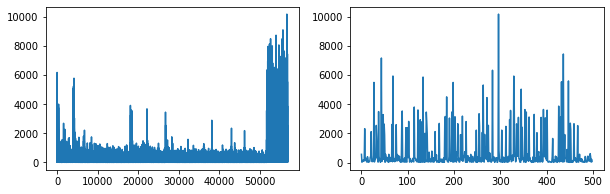

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


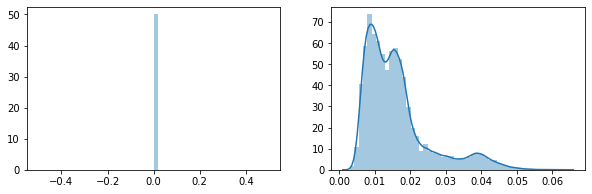

epoch 266/501 | batch 0/214.0 | time 1:13:18.725483 | loss 37.54308
epoch 266/501 | batch 50/214.0 | time 1:13:22.538262 | loss 42.16228
epoch 266/501 | batch 100/214.0 | time 1:13:26.348074 | loss 166.0488
epoch 266/501 | batch 150/214.0 | time 1:13:30.156957 | loss 43.10917
epoch 266/501 | batch 200/214.0 | time 1:13:33.963726 | loss 271.65881
epoch 267/501 | batch 0/214.0 | time 1:13:35.044763 | loss 56.03076
epoch 267/501 | batch 50/214.0 | time 1:13:38.844972 | loss 54.50411
epoch 267/501 | batch 100/214.0 | time 1:13:42.642809 | loss 65.72672
epoch 267/501 | batch 150/214.0 | time 1:13:46.441492 | loss 3473.43945
epoch 267/501 | batch 200/214.0 | time 1:13:50.241214 | loss 46.98177
epoch 268/501 | batch 0/214.0 | time 1:13:51.324315 | loss 126.03871
epoch 268/501 | batch 50/214.0 | time 1:13:55.131392 | loss 23.45456
epoch 268/501 | batch 100/214.0 | time 1:13:58.936428 | loss 134.7643
epoch 268/501 | batch 150/214.0 | time 1:14:02.747159 | loss 75.27962
epoch 268/501 | batch 200

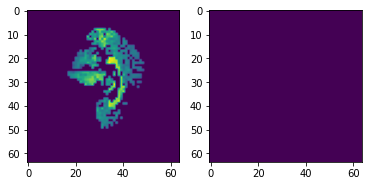

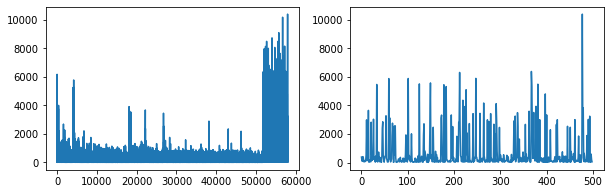

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


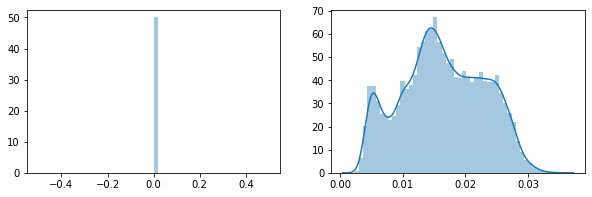

epoch 271/501 | batch 0/214.0 | time 1:14:41.228974 | loss 46.90638
epoch 271/501 | batch 50/214.0 | time 1:14:45.029976 | loss 1924.02979
epoch 271/501 | batch 100/214.0 | time 1:14:48.829837 | loss 2406.97266
epoch 271/501 | batch 150/214.0 | time 1:14:52.630726 | loss 27.87403
epoch 271/501 | batch 200/214.0 | time 1:14:56.434190 | loss 144.33218
epoch 272/501 | batch 0/214.0 | time 1:14:57.519778 | loss 149.63231
epoch 272/501 | batch 50/214.0 | time 1:15:01.330173 | loss 5347.82031
epoch 272/501 | batch 100/214.0 | time 1:15:05.138858 | loss 2353.37402
epoch 272/501 | batch 150/214.0 | time 1:15:08.944907 | loss 397.32556
epoch 272/501 | batch 200/214.0 | time 1:15:12.752882 | loss 34.40098
epoch 273/501 | batch 0/214.0 | time 1:15:13.844242 | loss 66.11042
epoch 273/501 | batch 50/214.0 | time 1:15:17.644084 | loss 3817.77173
epoch 273/501 | batch 100/214.0 | time 1:15:21.441841 | loss 3022.26147
epoch 273/501 | batch 150/214.0 | time 1:15:25.243532 | loss 2532.89917
epoch 273/50

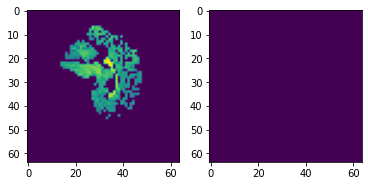

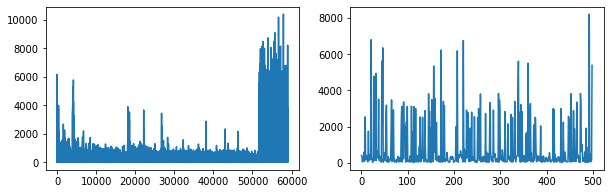

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


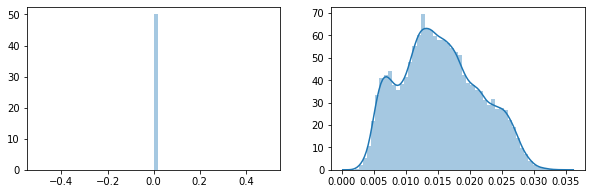

epoch 276/501 | batch 0/214.0 | time 1:16:03.789223 | loss 577.24133
epoch 276/501 | batch 50/214.0 | time 1:16:07.593978 | loss 2494.92285
epoch 276/501 | batch 100/214.0 | time 1:16:11.400305 | loss 481.63943
epoch 276/501 | batch 150/214.0 | time 1:16:15.205839 | loss 395.92499
epoch 276/501 | batch 200/214.0 | time 1:16:19.011837 | loss 26.13094
epoch 277/501 | batch 0/214.0 | time 1:16:20.101472 | loss 36.8933
epoch 277/501 | batch 50/214.0 | time 1:16:23.898603 | loss 2272.45752
epoch 277/501 | batch 100/214.0 | time 1:16:27.698986 | loss 65.81139
epoch 277/501 | batch 150/214.0 | time 1:16:31.499831 | loss 236.19472
epoch 277/501 | batch 200/214.0 | time 1:16:35.297995 | loss 104.81926
epoch 278/501 | batch 0/214.0 | time 1:16:36.381276 | loss 40.81382
epoch 278/501 | batch 50/214.0 | time 1:16:40.185077 | loss 3384.72095
epoch 278/501 | batch 100/214.0 | time 1:16:43.989704 | loss 315.83942
epoch 278/501 | batch 150/214.0 | time 1:16:47.793822 | loss 31.34171
epoch 278/501 | ba

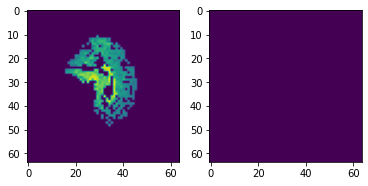

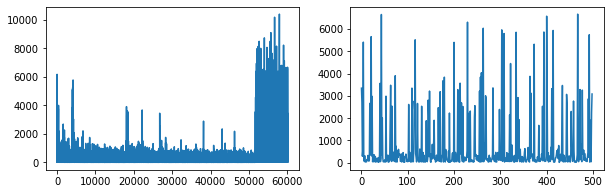

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


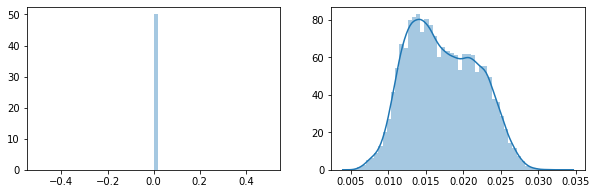

epoch 281/501 | batch 0/214.0 | time 1:17:26.275680 | loss 44.24081
epoch 281/501 | batch 50/214.0 | time 1:17:30.075024 | loss 29.44482
epoch 281/501 | batch 100/214.0 | time 1:17:33.877702 | loss 384.2634
epoch 281/501 | batch 150/214.0 | time 1:17:37.678064 | loss 454.96619
epoch 281/501 | batch 200/214.0 | time 1:17:41.477102 | loss 205.60001
epoch 282/501 | batch 0/214.0 | time 1:17:42.560952 | loss 44.06087
epoch 282/501 | batch 50/214.0 | time 1:17:46.368806 | loss 36.73738
epoch 282/501 | batch 100/214.0 | time 1:17:50.176719 | loss 60.79162
epoch 282/501 | batch 150/214.0 | time 1:17:53.982492 | loss 23.64427
epoch 282/501 | batch 200/214.0 | time 1:17:57.789112 | loss 129.41005
epoch 283/501 | batch 0/214.0 | time 1:17:58.870569 | loss 78.87358
epoch 283/501 | batch 50/214.0 | time 1:18:02.672082 | loss 140.34941
epoch 283/501 | batch 100/214.0 | time 1:18:06.475597 | loss 2506.64917
epoch 283/501 | batch 150/214.0 | time 1:18:10.274569 | loss 447.87939
epoch 283/501 | batch 

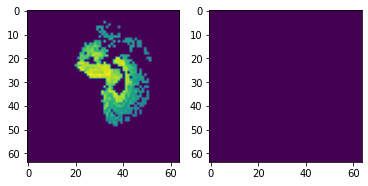

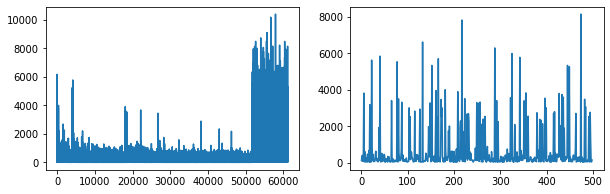

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


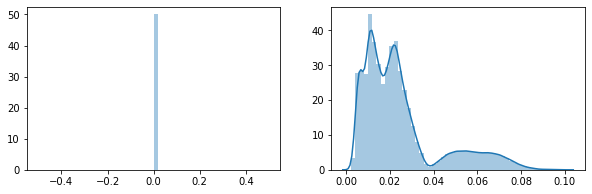

epoch 286/501 | batch 0/214.0 | time 1:18:48.710915 | loss 230.52185
epoch 286/501 | batch 50/214.0 | time 1:18:52.512331 | loss 70.18832
epoch 286/501 | batch 100/214.0 | time 1:18:56.315522 | loss 81.92402
epoch 286/501 | batch 150/214.0 | time 1:19:00.118793 | loss 74.05679
epoch 286/501 | batch 200/214.0 | time 1:19:03.927705 | loss 50.51066
epoch 287/501 | batch 0/214.0 | time 1:19:05.009151 | loss 51.07829
epoch 287/501 | batch 50/214.0 | time 1:19:08.808415 | loss 35.48789
epoch 287/501 | batch 100/214.0 | time 1:19:12.605270 | loss 27.15352
epoch 287/501 | batch 150/214.0 | time 1:19:16.402330 | loss 138.73242
epoch 287/501 | batch 200/214.0 | time 1:19:20.201786 | loss 51.24448
epoch 288/501 | batch 0/214.0 | time 1:19:21.286653 | loss 49.64357
epoch 288/501 | batch 50/214.0 | time 1:19:25.094320 | loss 194.80455
epoch 288/501 | batch 100/214.0 | time 1:19:28.899708 | loss 5581.4375
epoch 288/501 | batch 150/214.0 | time 1:19:32.706263 | loss 37.91209
epoch 288/501 | batch 200

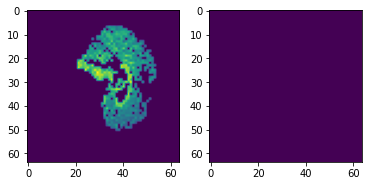

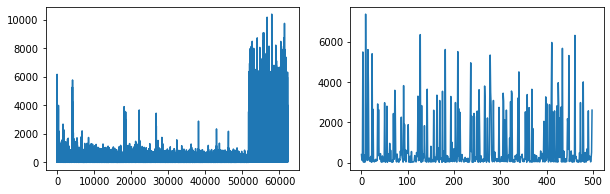

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


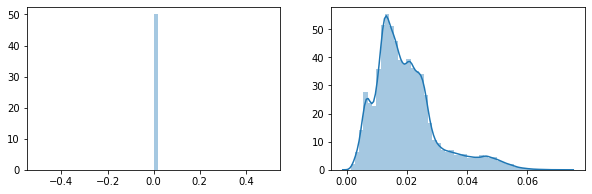

epoch 291/501 | batch 0/214.0 | time 1:20:11.278335 | loss 287.60516
epoch 291/501 | batch 50/214.0 | time 1:20:15.078788 | loss 75.48357
epoch 291/501 | batch 100/214.0 | time 1:20:18.878303 | loss 121.79085
epoch 291/501 | batch 150/214.0 | time 1:20:22.678836 | loss 32.65112
epoch 291/501 | batch 200/214.0 | time 1:20:26.480982 | loss 68.08176
epoch 292/501 | batch 0/214.0 | time 1:20:27.565555 | loss 107.07571
epoch 292/501 | batch 50/214.0 | time 1:20:31.373855 | loss 36.07009
epoch 292/501 | batch 100/214.0 | time 1:20:35.188077 | loss 324.27997
epoch 292/501 | batch 150/214.0 | time 1:20:38.999523 | loss 65.68234
epoch 292/501 | batch 200/214.0 | time 1:20:42.807798 | loss 28.42008
epoch 293/501 | batch 0/214.0 | time 1:20:43.898606 | loss 150.74957
epoch 293/501 | batch 50/214.0 | time 1:20:47.697133 | loss 42.41806
epoch 293/501 | batch 100/214.0 | time 1:20:51.495609 | loss 5449.22705
epoch 293/501 | batch 150/214.0 | time 1:20:55.292366 | loss 45.61453
epoch 293/501 | batch 

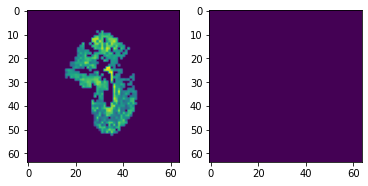

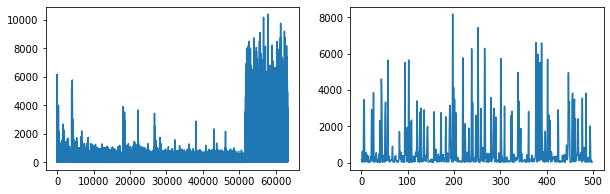

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


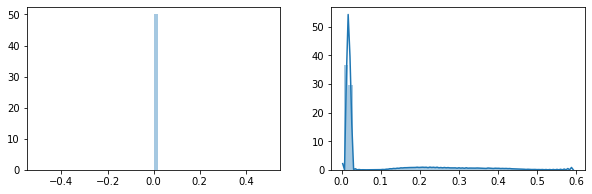

epoch 296/501 | batch 0/214.0 | time 1:21:33.770581 | loss 250.10645
epoch 296/501 | batch 50/214.0 | time 1:21:37.575952 | loss 2406.72266
epoch 296/501 | batch 100/214.0 | time 1:21:41.379864 | loss 471.86969
epoch 296/501 | batch 150/214.0 | time 1:21:45.185966 | loss 516.59998
epoch 296/501 | batch 200/214.0 | time 1:21:48.993345 | loss 51.28368
epoch 297/501 | batch 0/214.0 | time 1:21:50.083776 | loss 62.17053
epoch 297/501 | batch 50/214.0 | time 1:21:53.880880 | loss 54.57815
epoch 297/501 | batch 100/214.0 | time 1:21:57.678825 | loss 183.375
epoch 297/501 | batch 150/214.0 | time 1:22:01.476388 | loss 192.27687
epoch 297/501 | batch 200/214.0 | time 1:22:05.275579 | loss 454.68719
epoch 298/501 | batch 0/214.0 | time 1:22:06.359209 | loss 479.72882
epoch 298/501 | batch 50/214.0 | time 1:22:10.166465 | loss 54.73627
epoch 298/501 | batch 100/214.0 | time 1:22:13.975816 | loss 49.26437
epoch 298/501 | batch 150/214.0 | time 1:22:17.780943 | loss 148.70651
epoch 298/501 | batch

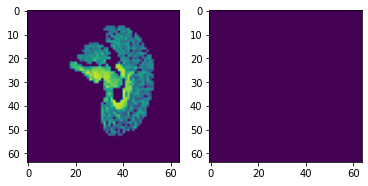

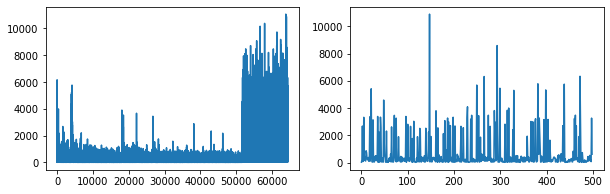

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


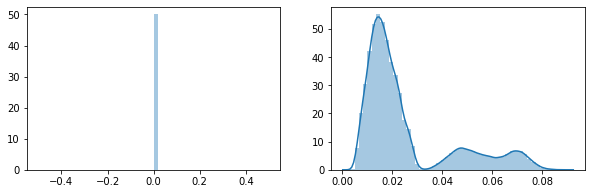

epoch 301/501 | batch 0/214.0 | time 1:22:56.304050 | loss 147.81161
epoch 301/501 | batch 50/214.0 | time 1:23:00.104175 | loss 57.30906
epoch 301/501 | batch 100/214.0 | time 1:23:03.908348 | loss 3015.01758
epoch 301/501 | batch 150/214.0 | time 1:23:07.707056 | loss 144.72961
epoch 301/501 | batch 200/214.0 | time 1:23:11.508033 | loss 39.03044
epoch 302/501 | batch 0/214.0 | time 1:23:12.591664 | loss 28.49485
epoch 302/501 | batch 50/214.0 | time 1:23:16.399988 | loss 55.20441
epoch 302/501 | batch 100/214.0 | time 1:23:20.209467 | loss 22.74651
epoch 302/501 | batch 150/214.0 | time 1:23:24.021738 | loss 42.32173
epoch 302/501 | batch 200/214.0 | time 1:23:27.833539 | loss 204.59172
epoch 303/501 | batch 0/214.0 | time 1:23:28.915792 | loss 144.00919
epoch 303/501 | batch 50/214.0 | time 1:23:32.719469 | loss 146.18532
epoch 303/501 | batch 100/214.0 | time 1:23:36.523989 | loss 45.94628
epoch 303/501 | batch 150/214.0 | time 1:23:40.328379 | loss 136.96541
epoch 303/501 | batch

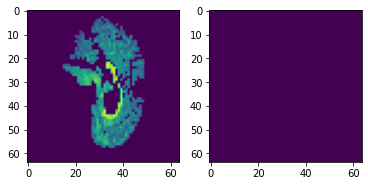

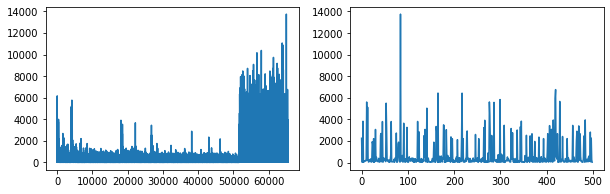

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


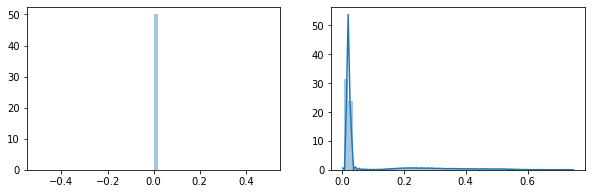

epoch 306/501 | batch 0/214.0 | time 1:24:18.975416 | loss 55.96423
epoch 306/501 | batch 50/214.0 | time 1:24:22.789430 | loss 37.9281
epoch 306/501 | batch 100/214.0 | time 1:24:26.601271 | loss 210.48987
epoch 306/501 | batch 150/214.0 | time 1:24:30.408705 | loss 771.88007
epoch 306/501 | batch 200/214.0 | time 1:24:34.216642 | loss 219.62115
epoch 307/501 | batch 0/214.0 | time 1:24:35.298891 | loss 94.42908
epoch 307/501 | batch 50/214.0 | time 1:24:39.098483 | loss 3151.90527
epoch 307/501 | batch 100/214.0 | time 1:24:42.898074 | loss 19.99204
epoch 307/501 | batch 150/214.0 | time 1:24:46.697913 | loss 353.59845
epoch 307/501 | batch 200/214.0 | time 1:24:50.499372 | loss 43.77642
epoch 308/501 | batch 0/214.0 | time 1:24:51.584589 | loss 138.80928
epoch 308/501 | batch 50/214.0 | time 1:24:55.394588 | loss 483.00775
epoch 308/501 | batch 100/214.0 | time 1:24:59.206788 | loss 101.35896
epoch 308/501 | batch 150/214.0 | time 1:25:03.018681 | loss 600.20691
epoch 308/501 | batc

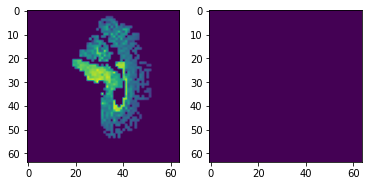

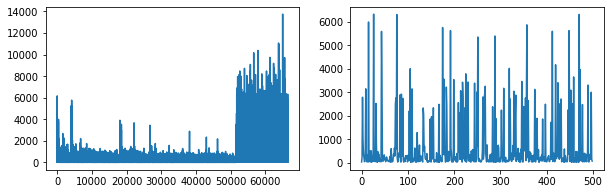

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


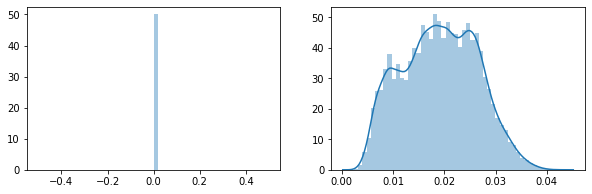

epoch 311/501 | batch 0/214.0 | time 1:25:41.508259 | loss 216.23187
epoch 311/501 | batch 50/214.0 | time 1:25:45.306964 | loss 275.95911
epoch 311/501 | batch 100/214.0 | time 1:25:49.106019 | loss 44.10188
epoch 311/501 | batch 150/214.0 | time 1:25:52.905292 | loss 258.03613
epoch 311/501 | batch 200/214.0 | time 1:25:56.711654 | loss 24.93966
epoch 312/501 | batch 0/214.0 | time 1:25:57.799068 | loss 25.5566
epoch 312/501 | batch 50/214.0 | time 1:26:01.611711 | loss 266.31818
epoch 312/501 | batch 100/214.0 | time 1:26:05.419996 | loss 44.58401
epoch 312/501 | batch 150/214.0 | time 1:26:09.224306 | loss 179.34917
epoch 312/501 | batch 200/214.0 | time 1:26:13.028301 | loss 242.11877
epoch 313/501 | batch 0/214.0 | time 1:26:14.117202 | loss 2322.73218
epoch 313/501 | batch 50/214.0 | time 1:26:17.912641 | loss 486.32333
epoch 313/501 | batch 100/214.0 | time 1:26:21.708993 | loss 2207.30273
epoch 313/501 | batch 150/214.0 | time 1:26:25.507224 | loss 5531.10254
epoch 313/501 | b

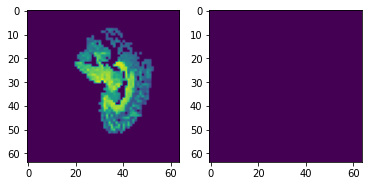

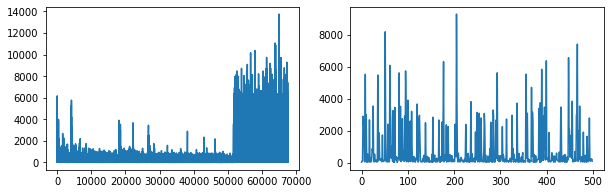

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


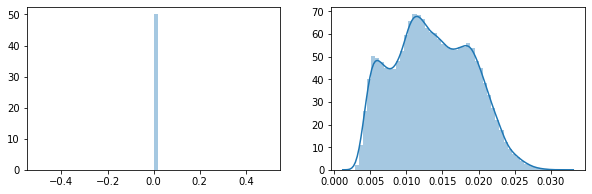

epoch 316/501 | batch 0/214.0 | time 1:27:03.999317 | loss 2485.28931
epoch 316/501 | batch 50/214.0 | time 1:27:07.805286 | loss 426.04907
epoch 316/501 | batch 100/214.0 | time 1:27:11.610183 | loss 66.26985
epoch 316/501 | batch 150/214.0 | time 1:27:15.418074 | loss 24.35617
epoch 316/501 | batch 200/214.0 | time 1:27:19.225232 | loss 299.0871
epoch 317/501 | batch 0/214.0 | time 1:27:20.315823 | loss 284.15219
epoch 317/501 | batch 50/214.0 | time 1:27:24.117075 | loss 217.51001
epoch 317/501 | batch 100/214.0 | time 1:27:27.917240 | loss 79.88285
epoch 317/501 | batch 150/214.0 | time 1:27:31.721691 | loss 314.88181
epoch 317/501 | batch 200/214.0 | time 1:27:35.521393 | loss 538.25415
epoch 318/501 | batch 0/214.0 | time 1:27:36.605835 | loss 2699.54639
epoch 318/501 | batch 50/214.0 | time 1:27:40.411239 | loss 28.32525
epoch 318/501 | batch 100/214.0 | time 1:27:44.219360 | loss 255.24844
epoch 318/501 | batch 150/214.0 | time 1:27:48.025169 | loss 399.17853
epoch 318/501 | ba

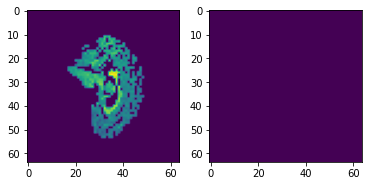

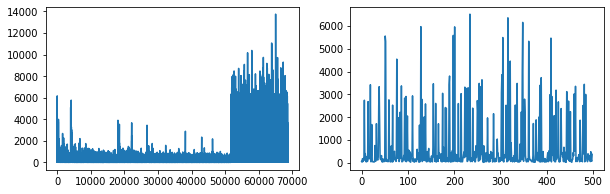

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


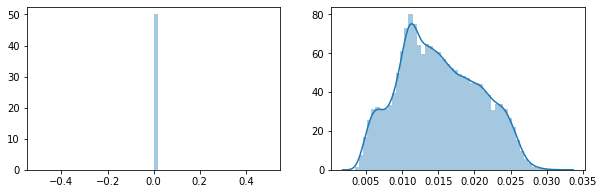

epoch 321/501 | batch 0/214.0 | time 1:28:26.531297 | loss 3009.61548
epoch 321/501 | batch 50/214.0 | time 1:28:30.330423 | loss 71.89381
epoch 321/501 | batch 100/214.0 | time 1:28:34.135626 | loss 336.82281
epoch 321/501 | batch 150/214.0 | time 1:28:37.936962 | loss 683.81067
epoch 321/501 | batch 200/214.0 | time 1:28:41.733984 | loss 194.91638
epoch 322/501 | batch 0/214.0 | time 1:28:42.819213 | loss 322.19177
epoch 322/501 | batch 50/214.0 | time 1:28:46.625825 | loss 55.20798
epoch 322/501 | batch 100/214.0 | time 1:28:50.432883 | loss 350.05298
epoch 322/501 | batch 150/214.0 | time 1:28:54.237197 | loss 47.10876
epoch 322/501 | batch 200/214.0 | time 1:28:58.042281 | loss 420.2182
epoch 323/501 | batch 0/214.0 | time 1:28:59.123883 | loss 33.33836
epoch 323/501 | batch 50/214.0 | time 1:29:02.928687 | loss 187.07727
epoch 323/501 | batch 100/214.0 | time 1:29:06.734434 | loss 98.58873
epoch 323/501 | batch 150/214.0 | time 1:29:10.537477 | loss 270.16193
epoch 323/501 | batc

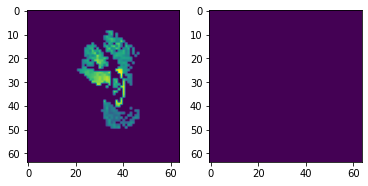

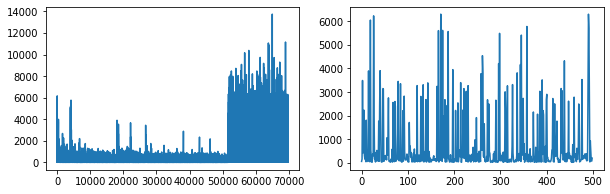

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


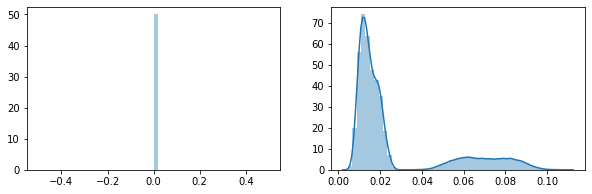

epoch 326/501 | batch 0/214.0 | time 1:29:49.014310 | loss 6794.86084
epoch 326/501 | batch 50/214.0 | time 1:29:52.821046 | loss 227.15977
epoch 326/501 | batch 100/214.0 | time 1:29:56.627672 | loss 39.13925
epoch 326/501 | batch 150/214.0 | time 1:30:00.436929 | loss 292.94611
epoch 326/501 | batch 200/214.0 | time 1:30:04.246173 | loss 184.23894
epoch 327/501 | batch 0/214.0 | time 1:30:05.328968 | loss 362.45584
epoch 327/501 | batch 50/214.0 | time 1:30:09.131898 | loss 2302.87134
epoch 327/501 | batch 100/214.0 | time 1:30:12.935928 | loss 294.31818
epoch 327/501 | batch 150/214.0 | time 1:30:16.736758 | loss 23.0938
epoch 327/501 | batch 200/214.0 | time 1:30:20.537238 | loss 71.41225
epoch 328/501 | batch 0/214.0 | time 1:30:21.622676 | loss 88.64223
epoch 328/501 | batch 50/214.0 | time 1:30:25.433822 | loss 42.78404
epoch 328/501 | batch 100/214.0 | time 1:30:29.242597 | loss 61.61354
epoch 328/501 | batch 150/214.0 | time 1:30:33.058625 | loss 167.23669
epoch 328/501 | batc

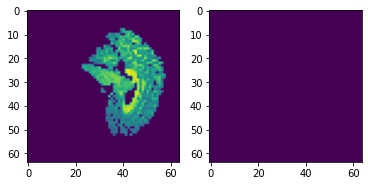

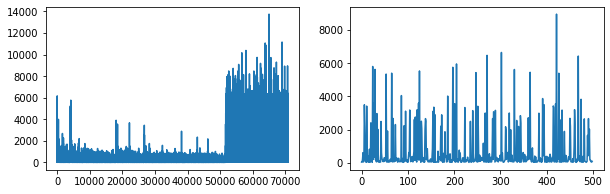

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


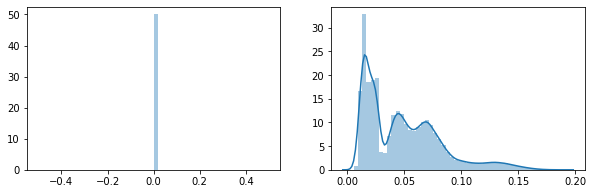

epoch 331/501 | batch 0/214.0 | time 1:31:11.657235 | loss 74.31061
epoch 331/501 | batch 50/214.0 | time 1:31:15.457664 | loss 3402.9668
epoch 331/501 | batch 100/214.0 | time 1:31:19.254821 | loss 2762.90967
epoch 331/501 | batch 150/214.0 | time 1:31:23.051273 | loss 30.50742
epoch 331/501 | batch 200/214.0 | time 1:31:26.851378 | loss 1721.56567
epoch 332/501 | batch 0/214.0 | time 1:31:27.934565 | loss 349.51318
epoch 332/501 | batch 50/214.0 | time 1:31:31.743879 | loss 59.30334
epoch 332/501 | batch 100/214.0 | time 1:31:35.548981 | loss 330.17361
epoch 332/501 | batch 150/214.0 | time 1:31:39.355568 | loss 39.26983
epoch 332/501 | batch 200/214.0 | time 1:31:43.167669 | loss 85.51582
epoch 333/501 | batch 0/214.0 | time 1:31:44.260151 | loss 107.74691
epoch 333/501 | batch 50/214.0 | time 1:31:48.059965 | loss 77.30695
epoch 333/501 | batch 100/214.0 | time 1:31:51.860062 | loss 282.63879
epoch 333/501 | batch 150/214.0 | time 1:31:55.657902 | loss 2499.38086
epoch 333/501 | ba

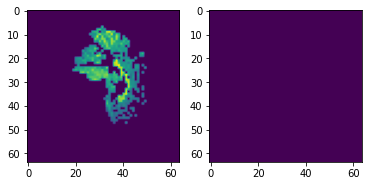

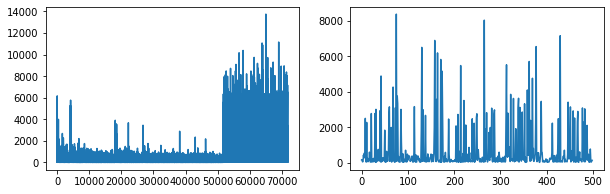

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


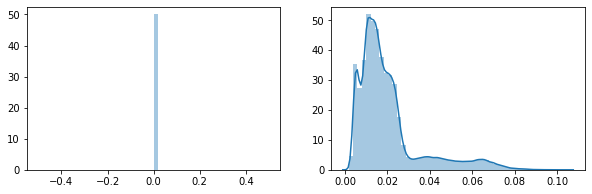

epoch 336/501 | batch 0/214.0 | time 1:32:34.090363 | loss 408.81311
epoch 336/501 | batch 50/214.0 | time 1:32:37.895534 | loss 63.14571
epoch 336/501 | batch 100/214.0 | time 1:32:41.700054 | loss 21.36238
epoch 336/501 | batch 150/214.0 | time 1:32:45.506642 | loss 381.88602
epoch 336/501 | batch 200/214.0 | time 1:32:49.319264 | loss 40.40809
epoch 337/501 | batch 0/214.0 | time 1:32:50.408438 | loss 43.52793
epoch 337/501 | batch 50/214.0 | time 1:32:54.205533 | loss 94.24018
epoch 337/501 | batch 100/214.0 | time 1:32:58.003474 | loss 114.60956
epoch 337/501 | batch 150/214.0 | time 1:33:01.800557 | loss 862.90442
epoch 337/501 | batch 200/214.0 | time 1:33:05.598061 | loss 140.87091
epoch 338/501 | batch 0/214.0 | time 1:33:06.680486 | loss 175.03864
epoch 338/501 | batch 50/214.0 | time 1:33:10.484763 | loss 21.11088
epoch 338/501 | batch 100/214.0 | time 1:33:14.288807 | loss 564.80688
epoch 338/501 | batch 150/214.0 | time 1:33:18.098012 | loss 248.00804
epoch 338/501 | batch

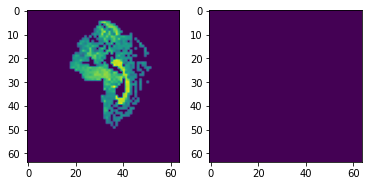

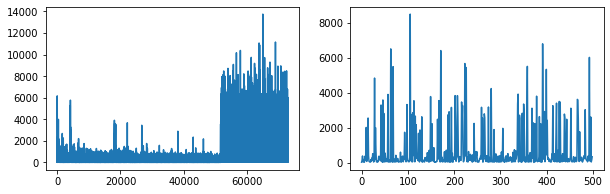

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


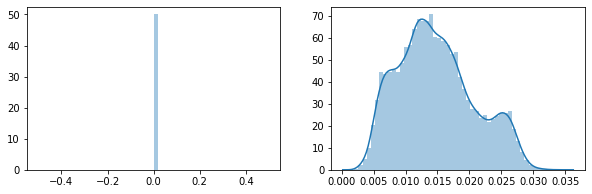

epoch 341/501 | batch 0/214.0 | time 1:33:56.560977 | loss 491.99985
epoch 341/501 | batch 50/214.0 | time 1:34:00.356639 | loss 3096.22705
epoch 341/501 | batch 100/214.0 | time 1:34:04.155776 | loss 45.50463
epoch 341/501 | batch 150/214.0 | time 1:34:07.953242 | loss 57.03258
epoch 341/501 | batch 200/214.0 | time 1:34:11.751170 | loss 96.33276
epoch 342/501 | batch 0/214.0 | time 1:34:12.833958 | loss 229.84421
epoch 342/501 | batch 50/214.0 | time 1:34:16.640251 | loss 2691.66479
epoch 342/501 | batch 100/214.0 | time 1:34:20.449666 | loss 27.14308
epoch 342/501 | batch 150/214.0 | time 1:34:24.258496 | loss 181.45978
epoch 342/501 | batch 200/214.0 | time 1:34:28.062694 | loss 67.55202
epoch 343/501 | batch 0/214.0 | time 1:34:29.143677 | loss 784.59973
epoch 343/501 | batch 50/214.0 | time 1:34:32.944496 | loss 2011.11108
epoch 343/501 | batch 100/214.0 | time 1:34:36.743919 | loss 762.76868
epoch 343/501 | batch 150/214.0 | time 1:34:40.542909 | loss 3184.27173
epoch 343/501 | 

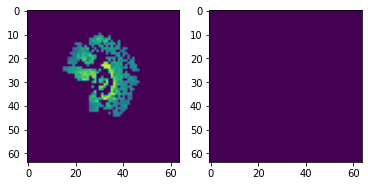

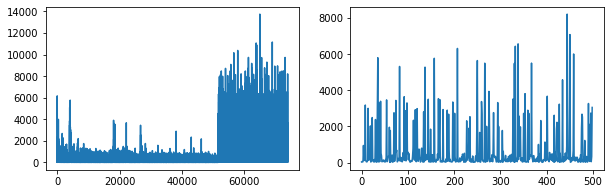

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


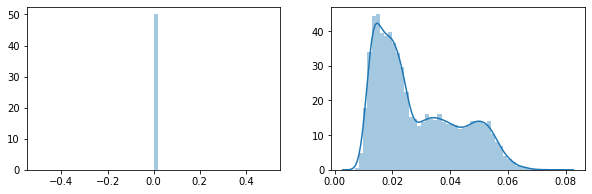

epoch 346/501 | batch 0/214.0 | time 1:35:19.037736 | loss 450.08841
epoch 346/501 | batch 50/214.0 | time 1:35:22.848131 | loss 4597.38867
epoch 346/501 | batch 100/214.0 | time 1:35:26.661747 | loss 2370.8064
epoch 346/501 | batch 150/214.0 | time 1:35:30.472790 | loss 736.55359
epoch 346/501 | batch 200/214.0 | time 1:35:34.281844 | loss 157.57877
epoch 347/501 | batch 0/214.0 | time 1:35:35.364954 | loss 188.34526
epoch 347/501 | batch 50/214.0 | time 1:35:39.166732 | loss 144.73038
epoch 347/501 | batch 100/214.0 | time 1:35:42.963695 | loss 44.58405
epoch 347/501 | batch 150/214.0 | time 1:35:46.759970 | loss 7067.30957
epoch 347/501 | batch 200/214.0 | time 1:35:50.558528 | loss 127.16096
epoch 348/501 | batch 0/214.0 | time 1:35:51.642802 | loss 321.8869
epoch 348/501 | batch 50/214.0 | time 1:35:55.452154 | loss 548.76178
epoch 348/501 | batch 100/214.0 | time 1:35:59.263344 | loss 5324.46777
epoch 348/501 | batch 150/214.0 | time 1:36:03.072361 | loss 3800.91455
epoch 348/501

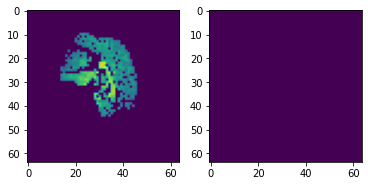

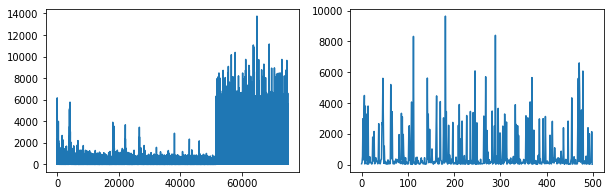

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


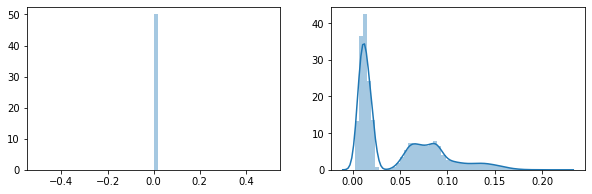

epoch 351/501 | batch 0/214.0 | time 1:36:41.512768 | loss 70.45583
epoch 351/501 | batch 50/214.0 | time 1:36:45.310765 | loss 134.24712
epoch 351/501 | batch 100/214.0 | time 1:36:49.107249 | loss 37.72706
epoch 351/501 | batch 150/214.0 | time 1:36:52.905034 | loss 152.12543
epoch 351/501 | batch 200/214.0 | time 1:36:56.706128 | loss 304.35886
epoch 352/501 | batch 0/214.0 | time 1:36:57.791260 | loss 21.04798
epoch 352/501 | batch 50/214.0 | time 1:37:01.607413 | loss 3276.97974
epoch 352/501 | batch 100/214.0 | time 1:37:05.417190 | loss 356.59799
epoch 352/501 | batch 150/214.0 | time 1:37:09.221794 | loss 30.33083
epoch 352/501 | batch 200/214.0 | time 1:37:13.027367 | loss 525.08051
epoch 353/501 | batch 0/214.0 | time 1:37:14.116982 | loss 3805.63135
epoch 353/501 | batch 50/214.0 | time 1:37:17.915381 | loss 37.31981
epoch 353/501 | batch 100/214.0 | time 1:37:21.711814 | loss 3160.14404
epoch 353/501 | batch 150/214.0 | time 1:37:25.508291 | loss 95.03644
epoch 353/501 | ba

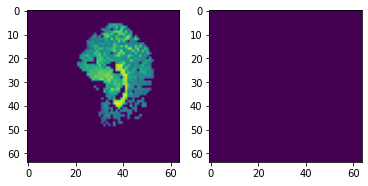

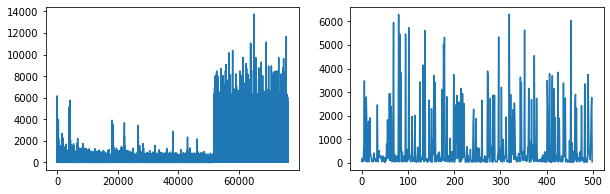

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


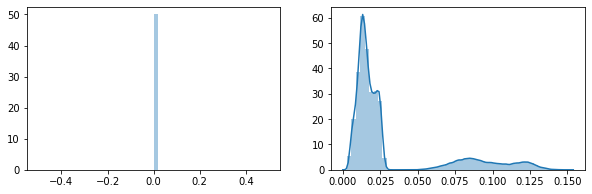

epoch 356/501 | batch 0/214.0 | time 1:38:04.032497 | loss 287.81015
epoch 356/501 | batch 50/214.0 | time 1:38:07.838855 | loss 380.05731
epoch 356/501 | batch 100/214.0 | time 1:38:11.646330 | loss 167.90619
epoch 356/501 | batch 150/214.0 | time 1:38:15.451334 | loss 226.76779
epoch 356/501 | batch 200/214.0 | time 1:38:19.258191 | loss 28.31853
epoch 357/501 | batch 0/214.0 | time 1:38:20.348525 | loss 335.47513
epoch 357/501 | batch 50/214.0 | time 1:38:24.145659 | loss 26.9823
epoch 357/501 | batch 100/214.0 | time 1:38:27.945230 | loss 101.86591
epoch 357/501 | batch 150/214.0 | time 1:38:31.747059 | loss 2752.50098
epoch 357/501 | batch 200/214.0 | time 1:38:35.546130 | loss 2694.78125
epoch 358/501 | batch 0/214.0 | time 1:38:36.630410 | loss 111.6172
epoch 358/501 | batch 50/214.0 | time 1:38:40.437031 | loss 103.77589
epoch 358/501 | batch 100/214.0 | time 1:38:44.246046 | loss 314.23877
epoch 358/501 | batch 150/214.0 | time 1:38:48.051887 | loss 115.92168
epoch 358/501 | b

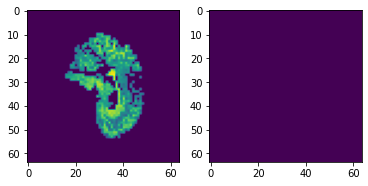

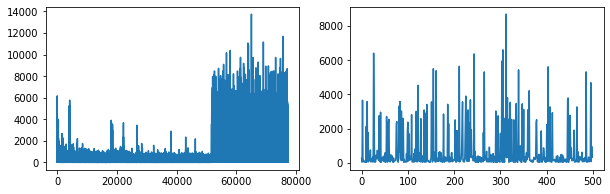

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


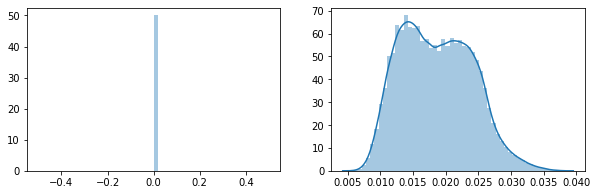

epoch 361/501 | batch 0/214.0 | time 1:39:26.623947 | loss 155.08626
epoch 361/501 | batch 50/214.0 | time 1:39:30.422737 | loss 55.00709
epoch 361/501 | batch 100/214.0 | time 1:39:34.222063 | loss 960.00293
epoch 361/501 | batch 150/214.0 | time 1:39:38.023078 | loss 370.42227
epoch 361/501 | batch 200/214.0 | time 1:39:41.820786 | loss 46.55296
epoch 362/501 | batch 0/214.0 | time 1:39:42.905004 | loss 291.133
epoch 362/501 | batch 50/214.0 | time 1:39:46.712944 | loss 38.40288
epoch 362/501 | batch 100/214.0 | time 1:39:50.522688 | loss 169.5394
epoch 362/501 | batch 150/214.0 | time 1:39:54.329962 | loss 327.51602
epoch 362/501 | batch 200/214.0 | time 1:39:58.140021 | loss 109.66408
epoch 363/501 | batch 0/214.0 | time 1:39:59.222395 | loss 56.10629
epoch 363/501 | batch 50/214.0 | time 1:40:03.024247 | loss 307.06384
epoch 363/501 | batch 100/214.0 | time 1:40:06.828059 | loss 293.87723
epoch 363/501 | batch 150/214.0 | time 1:40:10.632836 | loss 2543.26465
epoch 363/501 | batch

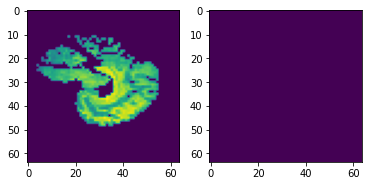

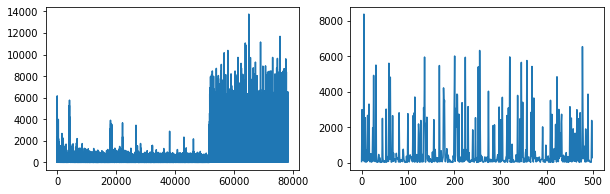

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


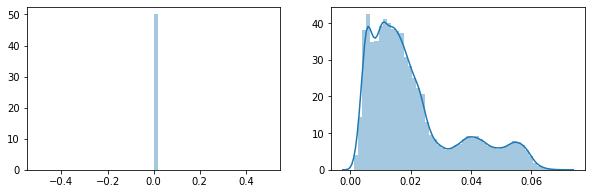

epoch 366/501 | batch 0/214.0 | time 1:40:49.123942 | loss 545.87592
epoch 366/501 | batch 50/214.0 | time 1:40:52.929625 | loss 35.59711
epoch 366/501 | batch 100/214.0 | time 1:40:56.737004 | loss 3015.98608
epoch 366/501 | batch 150/214.0 | time 1:41:00.544196 | loss 669.95398
epoch 366/501 | batch 200/214.0 | time 1:41:04.355981 | loss 182.99156
epoch 367/501 | batch 0/214.0 | time 1:41:05.438789 | loss 59.10725
epoch 367/501 | batch 50/214.0 | time 1:41:09.240154 | loss 311.54456
epoch 367/501 | batch 100/214.0 | time 1:41:13.045464 | loss 243.21831
epoch 367/501 | batch 150/214.0 | time 1:41:16.848942 | loss 554.06763
epoch 367/501 | batch 200/214.0 | time 1:41:20.651144 | loss 26.42849
epoch 368/501 | batch 0/214.0 | time 1:41:21.735676 | loss 63.48451
epoch 368/501 | batch 50/214.0 | time 1:41:25.545107 | loss 51.49691
epoch 368/501 | batch 100/214.0 | time 1:41:29.356257 | loss 54.05922
epoch 368/501 | batch 150/214.0 | time 1:41:33.165433 | loss 3102.37793
epoch 368/501 | bat

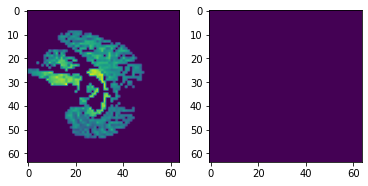

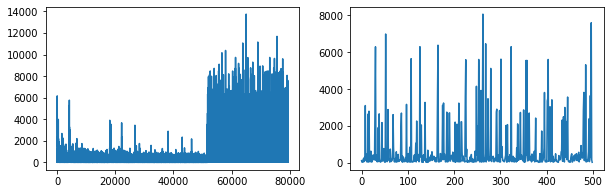

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


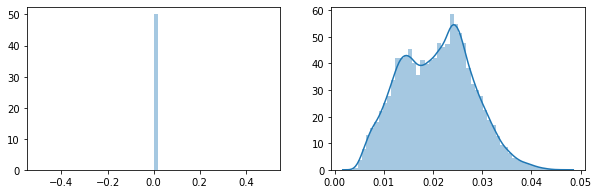

epoch 371/501 | batch 0/214.0 | time 1:42:11.744314 | loss 3464.03442
epoch 371/501 | batch 50/214.0 | time 1:42:15.549116 | loss 39.66577
epoch 371/501 | batch 100/214.0 | time 1:42:19.352818 | loss 2126.93896
epoch 371/501 | batch 150/214.0 | time 1:42:23.152950 | loss 760.24475
epoch 371/501 | batch 200/214.0 | time 1:42:26.952098 | loss 49.22513
epoch 372/501 | batch 0/214.0 | time 1:42:28.036266 | loss 348.57855
epoch 372/501 | batch 50/214.0 | time 1:42:31.845184 | loss 2481.72998
epoch 372/501 | batch 100/214.0 | time 1:42:35.651769 | loss 61.48084
epoch 372/501 | batch 150/214.0 | time 1:42:39.459473 | loss 36.11599
epoch 372/501 | batch 200/214.0 | time 1:42:43.267235 | loss 382.06293
epoch 373/501 | batch 0/214.0 | time 1:42:44.358008 | loss 96.42266
epoch 373/501 | batch 50/214.0 | time 1:42:48.158543 | loss 145.45041
epoch 373/501 | batch 100/214.0 | time 1:42:51.959179 | loss 79.37526
epoch 373/501 | batch 150/214.0 | time 1:42:55.760151 | loss 47.99889
epoch 373/501 | bat

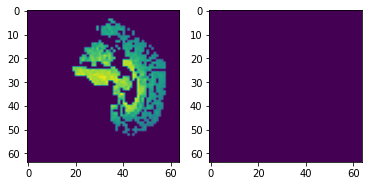

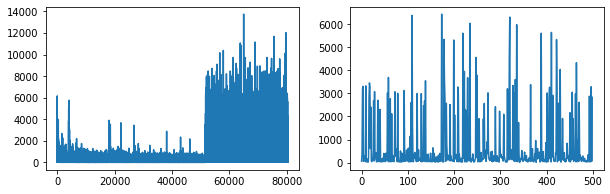

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


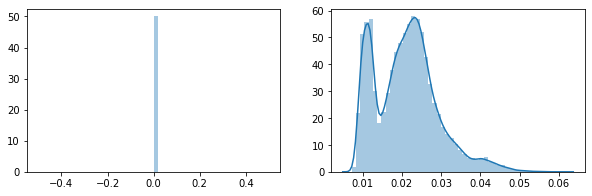

epoch 376/501 | batch 0/214.0 | time 1:43:34.226520 | loss 139.33606
epoch 376/501 | batch 50/214.0 | time 1:43:38.032462 | loss 43.14054
epoch 376/501 | batch 100/214.0 | time 1:43:41.839141 | loss 560.86792
epoch 376/501 | batch 150/214.0 | time 1:43:45.646265 | loss 138.61047
epoch 376/501 | batch 200/214.0 | time 1:43:49.450788 | loss 152.53159
epoch 377/501 | batch 0/214.0 | time 1:43:50.541487 | loss 35.04882
epoch 377/501 | batch 50/214.0 | time 1:43:54.339305 | loss 581.03864
epoch 377/501 | batch 100/214.0 | time 1:43:58.137883 | loss 2614.05127
epoch 377/501 | batch 150/214.0 | time 1:44:01.939242 | loss 715.71082
epoch 377/501 | batch 200/214.0 | time 1:44:05.736499 | loss 254.54254
epoch 378/501 | batch 0/214.0 | time 1:44:06.820191 | loss 79.20753
epoch 378/501 | batch 50/214.0 | time 1:44:10.627645 | loss 33.12469
epoch 378/501 | batch 100/214.0 | time 1:44:14.433742 | loss 132.64896
epoch 378/501 | batch 150/214.0 | time 1:44:18.238614 | loss 491.81531
epoch 378/501 | ba

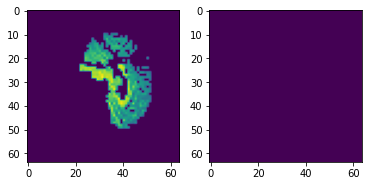

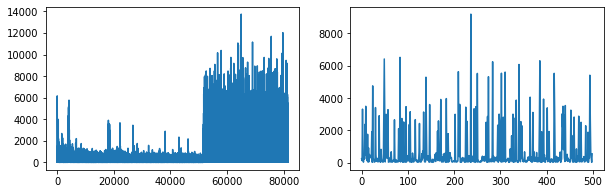

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


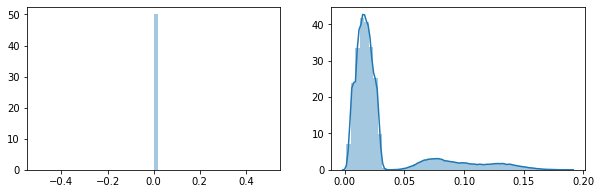

epoch 381/501 | batch 0/214.0 | time 1:44:56.663071 | loss 276.03815
epoch 381/501 | batch 50/214.0 | time 1:45:00.460230 | loss 69.80075
epoch 381/501 | batch 100/214.0 | time 1:45:04.258337 | loss 31.59315
epoch 381/501 | batch 150/214.0 | time 1:45:08.054654 | loss 761.98163
epoch 381/501 | batch 200/214.0 | time 1:45:11.855610 | loss 21.80643
epoch 382/501 | batch 0/214.0 | time 1:45:12.938799 | loss 320.55847
epoch 382/501 | batch 50/214.0 | time 1:45:16.747379 | loss 41.64779
epoch 382/501 | batch 100/214.0 | time 1:45:20.555323 | loss 290.88989
epoch 382/501 | batch 150/214.0 | time 1:45:24.363805 | loss 37.13025
epoch 382/501 | batch 200/214.0 | time 1:45:28.175571 | loss 310.30637
epoch 383/501 | batch 0/214.0 | time 1:45:29.258932 | loss 271.41315
epoch 383/501 | batch 50/214.0 | time 1:45:33.062396 | loss 8325.24609
epoch 383/501 | batch 100/214.0 | time 1:45:36.862760 | loss 216.76733
epoch 383/501 | batch 150/214.0 | time 1:45:40.665090 | loss 39.9602
epoch 383/501 | batch

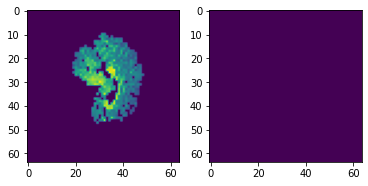

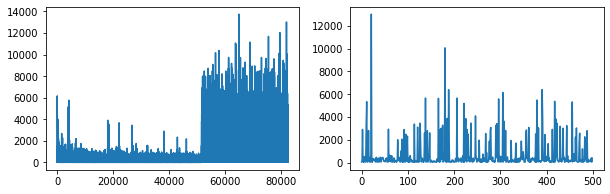

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


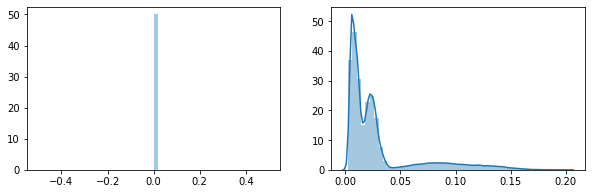

epoch 386/501 | batch 0/214.0 | time 1:46:19.239345 | loss 69.81036
epoch 386/501 | batch 50/214.0 | time 1:46:23.045557 | loss 137.79379
epoch 386/501 | batch 100/214.0 | time 1:46:26.853334 | loss 60.09775
epoch 386/501 | batch 150/214.0 | time 1:46:30.663074 | loss 3859.98071
epoch 386/501 | batch 200/214.0 | time 1:46:34.470083 | loss 934.34009
epoch 387/501 | batch 0/214.0 | time 1:46:35.552608 | loss 294.87747
epoch 387/501 | batch 50/214.0 | time 1:46:39.351335 | loss 119.28976
epoch 387/501 | batch 100/214.0 | time 1:46:43.152988 | loss 375.18933
epoch 387/501 | batch 150/214.0 | time 1:46:46.952680 | loss 2521.67749
epoch 387/501 | batch 200/214.0 | time 1:46:50.753204 | loss 2755.21753
epoch 388/501 | batch 0/214.0 | time 1:46:51.837371 | loss 725.18176
epoch 388/501 | batch 50/214.0 | time 1:46:55.643429 | loss 33.28845
epoch 388/501 | batch 100/214.0 | time 1:46:59.450327 | loss 267.24902
epoch 388/501 | batch 150/214.0 | time 1:47:03.258793 | loss 236.40717
epoch 388/501 |

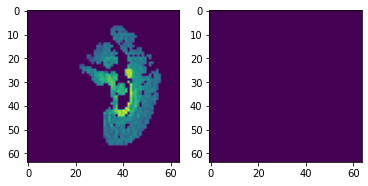

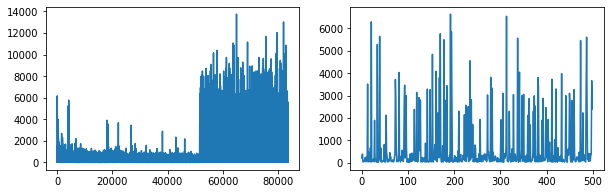

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


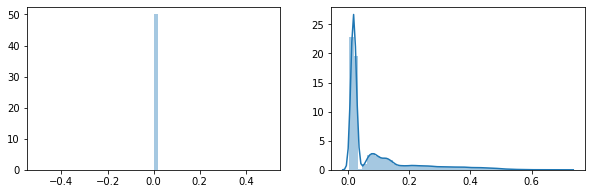

epoch 391/501 | batch 0/214.0 | time 1:47:41.751403 | loss 4623.1084
epoch 391/501 | batch 50/214.0 | time 1:47:45.549169 | loss 105.12682
epoch 391/501 | batch 100/214.0 | time 1:47:49.348906 | loss 128.38045
epoch 391/501 | batch 150/214.0 | time 1:47:53.147113 | loss 46.31862
epoch 391/501 | batch 200/214.0 | time 1:47:56.944506 | loss 219.73048
epoch 392/501 | batch 0/214.0 | time 1:47:58.027994 | loss 67.08115
epoch 392/501 | batch 50/214.0 | time 1:48:01.835261 | loss 29.31055
epoch 392/501 | batch 100/214.0 | time 1:48:05.645341 | loss 2391.229
epoch 392/501 | batch 150/214.0 | time 1:48:09.450839 | loss 37.00401
epoch 392/501 | batch 200/214.0 | time 1:48:13.258812 | loss 204.9601
epoch 393/501 | batch 0/214.0 | time 1:48:14.348256 | loss 843.7312
epoch 393/501 | batch 50/214.0 | time 1:48:18.146250 | loss 2994.72632
epoch 393/501 | batch 100/214.0 | time 1:48:21.944898 | loss 269.61285
epoch 393/501 | batch 150/214.0 | time 1:48:25.742372 | loss 69.27917
epoch 393/501 | batch 

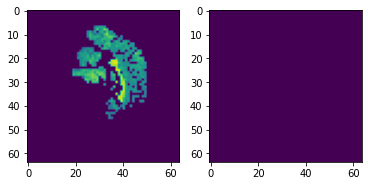

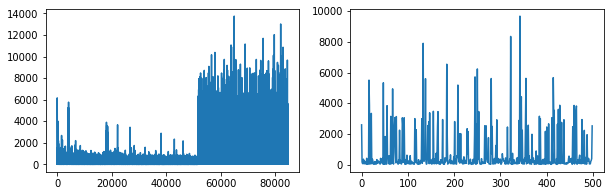

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


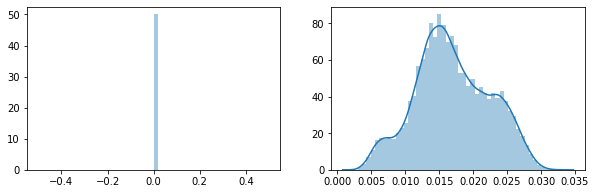

epoch 396/501 | batch 0/214.0 | time 1:49:04.245258 | loss 42.99035
epoch 396/501 | batch 50/214.0 | time 1:49:08.053557 | loss 87.74248
epoch 396/501 | batch 100/214.0 | time 1:49:11.860582 | loss 174.09155
epoch 396/501 | batch 150/214.0 | time 1:49:15.666403 | loss 140.80731
epoch 396/501 | batch 200/214.0 | time 1:49:19.474761 | loss 59.69298
epoch 397/501 | batch 0/214.0 | time 1:49:20.564493 | loss 325.53357
epoch 397/501 | batch 50/214.0 | time 1:49:24.365701 | loss 68.46571
epoch 397/501 | batch 100/214.0 | time 1:49:28.164251 | loss 217.20584
epoch 397/501 | batch 150/214.0 | time 1:49:31.964706 | loss 4073.52612
epoch 397/501 | batch 200/214.0 | time 1:49:35.766235 | loss 121.53043
epoch 398/501 | batch 0/214.0 | time 1:49:36.850381 | loss 319.47653
epoch 398/501 | batch 50/214.0 | time 1:49:40.660093 | loss 3380.8833
epoch 398/501 | batch 100/214.0 | time 1:49:44.470293 | loss 109.42859
epoch 398/501 | batch 150/214.0 | time 1:49:48.278458 | loss 189.02565
epoch 398/501 | ba

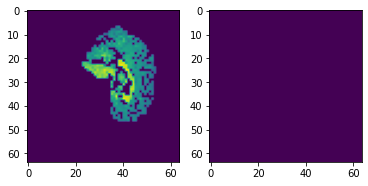

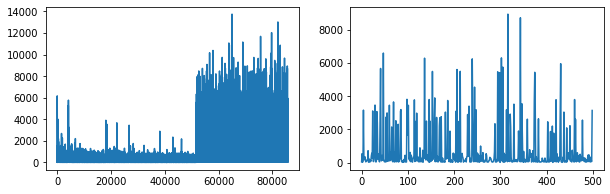

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


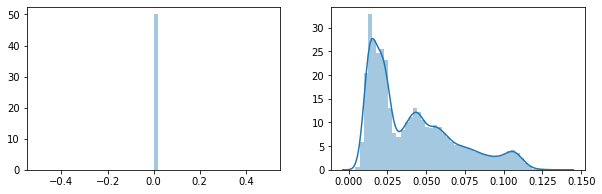

epoch 401/501 | batch 0/214.0 | time 1:50:26.828218 | loss 103.89342
epoch 401/501 | batch 50/214.0 | time 1:50:30.626540 | loss 78.06032
epoch 401/501 | batch 100/214.0 | time 1:50:34.425378 | loss 358.18445
epoch 401/501 | batch 150/214.0 | time 1:50:38.225664 | loss 1802.29504
epoch 401/501 | batch 200/214.0 | time 1:50:42.026399 | loss 5647.4707
epoch 402/501 | batch 0/214.0 | time 1:50:43.110788 | loss 539.30005
epoch 402/501 | batch 50/214.0 | time 1:50:46.918693 | loss 203.03165
epoch 402/501 | batch 100/214.0 | time 1:50:50.727116 | loss 260.48059
epoch 402/501 | batch 150/214.0 | time 1:50:54.536338 | loss 3481.52563
epoch 402/501 | batch 200/214.0 | time 1:50:58.343825 | loss 3094.21631
epoch 403/501 | batch 0/214.0 | time 1:50:59.426990 | loss 243.7402
epoch 403/501 | batch 50/214.0 | time 1:51:03.227386 | loss 404.74652
epoch 403/501 | batch 100/214.0 | time 1:51:07.027640 | loss 357.40884
epoch 403/501 | batch 150/214.0 | time 1:51:10.827252 | loss 293.73676
epoch 403/501 

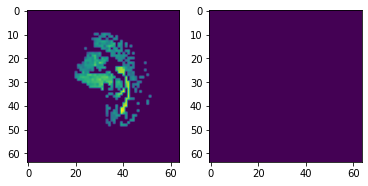

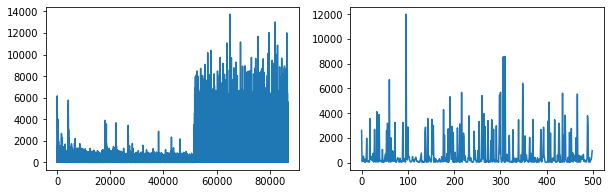

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


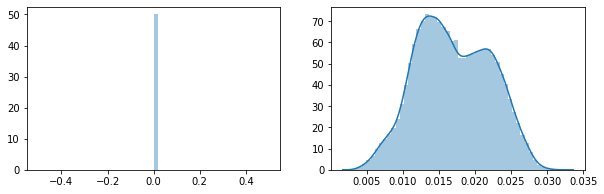

epoch 406/501 | batch 0/214.0 | time 1:51:49.342390 | loss 2509.19727
epoch 406/501 | batch 50/214.0 | time 1:51:53.150156 | loss 168.09415
epoch 406/501 | batch 100/214.0 | time 1:51:56.955577 | loss 596.27185
epoch 406/501 | batch 150/214.0 | time 1:52:00.762736 | loss 102.07552
epoch 406/501 | batch 200/214.0 | time 1:52:04.570481 | loss 160.54465
epoch 407/501 | batch 0/214.0 | time 1:52:05.651647 | loss 29.86498
epoch 407/501 | batch 50/214.0 | time 1:52:09.452061 | loss 57.39402
epoch 407/501 | batch 100/214.0 | time 1:52:13.251055 | loss 306.66849
epoch 407/501 | batch 150/214.0 | time 1:52:17.049376 | loss 87.39217
epoch 407/501 | batch 200/214.0 | time 1:52:20.845654 | loss 203.87793
epoch 408/501 | batch 0/214.0 | time 1:52:21.930384 | loss 177.56157
epoch 408/501 | batch 50/214.0 | time 1:52:25.740588 | loss 41.82737
epoch 408/501 | batch 100/214.0 | time 1:52:29.547892 | loss 32.00719
epoch 408/501 | batch 150/214.0 | time 1:52:33.355688 | loss 6809.93262
epoch 408/501 | ba

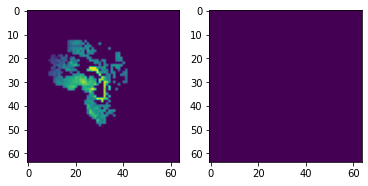

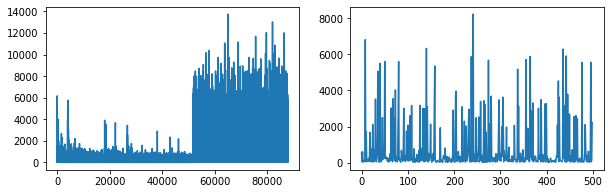

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


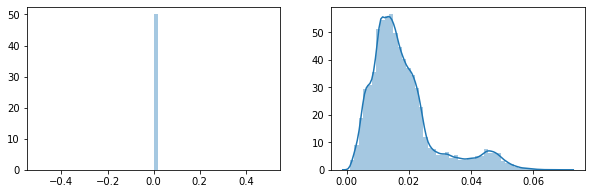

epoch 411/501 | batch 0/214.0 | time 1:53:11.793397 | loss 190.50751
epoch 411/501 | batch 50/214.0 | time 1:53:15.594078 | loss 3471.99292
epoch 411/501 | batch 100/214.0 | time 1:53:19.394829 | loss 2580.31763
epoch 411/501 | batch 150/214.0 | time 1:53:23.192246 | loss 99.94764
epoch 411/501 | batch 200/214.0 | time 1:53:26.990762 | loss 27.81373
epoch 412/501 | batch 0/214.0 | time 1:53:28.074616 | loss 291.06403
epoch 412/501 | batch 50/214.0 | time 1:53:31.879414 | loss 161.68088
epoch 412/501 | batch 100/214.0 | time 1:53:35.683371 | loss 137.45554
epoch 412/501 | batch 150/214.0 | time 1:53:39.490202 | loss 1949.07239
epoch 412/501 | batch 200/214.0 | time 1:53:43.296336 | loss 410.49915
epoch 413/501 | batch 0/214.0 | time 1:53:44.386302 | loss 89.43425
epoch 413/501 | batch 50/214.0 | time 1:53:48.183845 | loss 53.23157
epoch 413/501 | batch 100/214.0 | time 1:53:51.983289 | loss 304.72748
epoch 413/501 | batch 150/214.0 | time 1:53:55.780383 | loss 223.34879
epoch 413/501 | 

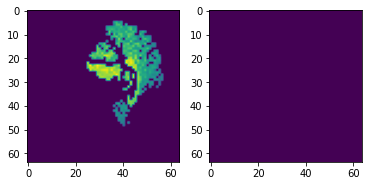

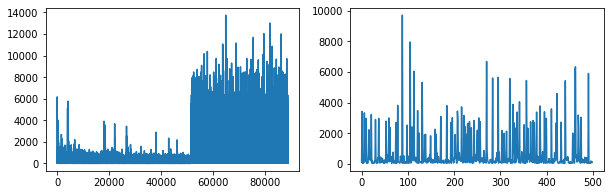

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


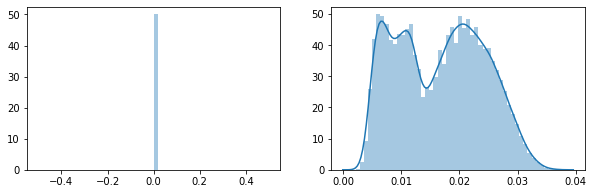

epoch 416/501 | batch 0/214.0 | time 1:54:34.291910 | loss 208.76833
epoch 416/501 | batch 50/214.0 | time 1:54:38.096173 | loss 163.24393
epoch 416/501 | batch 100/214.0 | time 1:54:41.900612 | loss 61.40526
epoch 416/501 | batch 150/214.0 | time 1:54:45.704062 | loss 57.15606
epoch 416/501 | batch 200/214.0 | time 1:54:49.508714 | loss 396.77075
epoch 417/501 | batch 0/214.0 | time 1:54:50.597946 | loss 27.80475
epoch 417/501 | batch 50/214.0 | time 1:54:54.395545 | loss 1896.63525
epoch 417/501 | batch 100/214.0 | time 1:54:58.191775 | loss 3350.33691
epoch 417/501 | batch 150/214.0 | time 1:55:01.987957 | loss 104.41013
epoch 417/501 | batch 200/214.0 | time 1:55:05.787733 | loss 35.69984
epoch 418/501 | batch 0/214.0 | time 1:55:06.872294 | loss 810.37891
epoch 418/501 | batch 50/214.0 | time 1:55:10.678337 | loss 41.80703
epoch 418/501 | batch 100/214.0 | time 1:55:14.484808 | loss 362.33221
epoch 418/501 | batch 150/214.0 | time 1:55:18.289825 | loss 2589.78125
epoch 418/501 | b

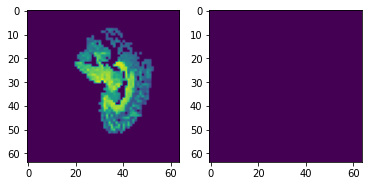

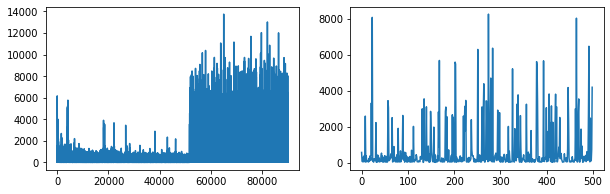

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


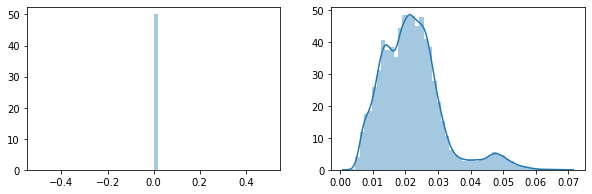

epoch 421/501 | batch 0/214.0 | time 1:55:56.729554 | loss 78.37911
epoch 421/501 | batch 50/214.0 | time 1:56:00.527174 | loss 32.27393
epoch 421/501 | batch 100/214.0 | time 1:56:04.324337 | loss 50.29718
epoch 421/501 | batch 150/214.0 | time 1:56:08.119954 | loss 36.14029
epoch 421/501 | batch 200/214.0 | time 1:56:11.917824 | loss 110.71226
epoch 422/501 | batch 0/214.0 | time 1:56:13.000842 | loss 212.31659
epoch 422/501 | batch 50/214.0 | time 1:56:16.805400 | loss 483.4986
epoch 422/501 | batch 100/214.0 | time 1:56:20.608959 | loss 325.73883
epoch 422/501 | batch 150/214.0 | time 1:56:24.415182 | loss 39.54217
epoch 422/501 | batch 200/214.0 | time 1:56:28.224064 | loss 99.18025
epoch 423/501 | batch 0/214.0 | time 1:56:29.305292 | loss 71.7941
epoch 423/501 | batch 50/214.0 | time 1:56:33.103107 | loss 222.2269
epoch 423/501 | batch 100/214.0 | time 1:56:36.901650 | loss 2214.06323
epoch 423/501 | batch 150/214.0 | time 1:56:40.702010 | loss 29.29492
epoch 423/501 | batch 200

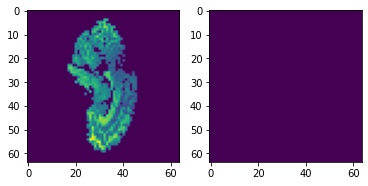

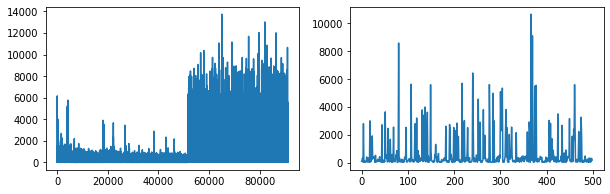

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


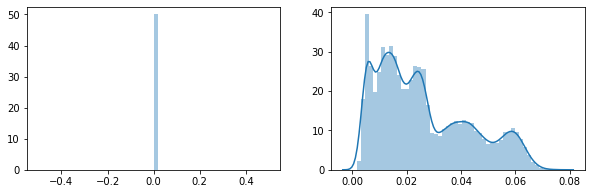

epoch 426/501 | batch 0/214.0 | time 1:57:19.208453 | loss 72.99745
epoch 426/501 | batch 50/214.0 | time 1:57:23.016221 | loss 55.03693
epoch 426/501 | batch 100/214.0 | time 1:57:26.822305 | loss 81.0649
epoch 426/501 | batch 150/214.0 | time 1:57:30.630714 | loss 115.53575
epoch 426/501 | batch 200/214.0 | time 1:57:34.439240 | loss 108.41498
epoch 427/501 | batch 0/214.0 | time 1:57:35.520741 | loss 152.73384
epoch 427/501 | batch 50/214.0 | time 1:57:39.319636 | loss 88.63303
epoch 427/501 | batch 100/214.0 | time 1:57:43.117704 | loss 543.11926
epoch 427/501 | batch 150/214.0 | time 1:57:46.917790 | loss 44.60455
epoch 427/501 | batch 200/214.0 | time 1:57:50.714525 | loss 54.32623
epoch 428/501 | batch 0/214.0 | time 1:57:51.798668 | loss 125.48843
epoch 428/501 | batch 50/214.0 | time 1:57:55.603463 | loss 70.94869
epoch 428/501 | batch 100/214.0 | time 1:57:59.409933 | loss 45.41148
epoch 428/501 | batch 150/214.0 | time 1:58:03.219305 | loss 188.80151
epoch 428/501 | batch 20

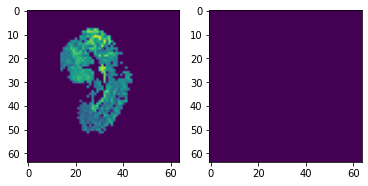

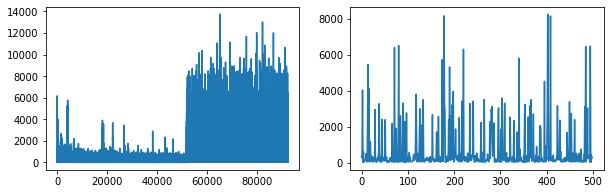

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


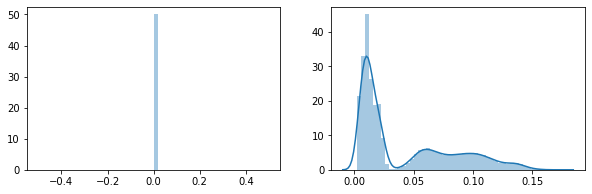

epoch 431/501 | batch 0/214.0 | time 1:58:41.645996 | loss 46.69789
epoch 431/501 | batch 50/214.0 | time 1:58:45.442965 | loss 132.22171
epoch 431/501 | batch 100/214.0 | time 1:58:49.242178 | loss 155.81059
epoch 431/501 | batch 150/214.0 | time 1:58:53.038074 | loss 937.01965
epoch 431/501 | batch 200/214.0 | time 1:58:56.833448 | loss 185.78934
epoch 432/501 | batch 0/214.0 | time 1:58:57.917961 | loss 34.83206
epoch 432/501 | batch 50/214.0 | time 1:59:01.723599 | loss 2611.2002
epoch 432/501 | batch 100/214.0 | time 1:59:05.528309 | loss 286.62103
epoch 432/501 | batch 150/214.0 | time 1:59:09.332384 | loss 175.77101
epoch 432/501 | batch 200/214.0 | time 1:59:13.136337 | loss 71.39303
epoch 433/501 | batch 0/214.0 | time 1:59:14.225905 | loss 106.83177
epoch 433/501 | batch 50/214.0 | time 1:59:18.020574 | loss 2269.6333
epoch 433/501 | batch 100/214.0 | time 1:59:21.817754 | loss 61.00341
epoch 433/501 | batch 150/214.0 | time 1:59:25.614602 | loss 384.21289
epoch 433/501 | bat

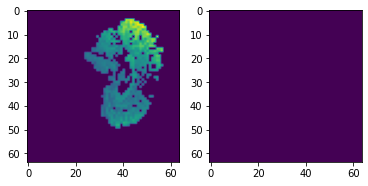

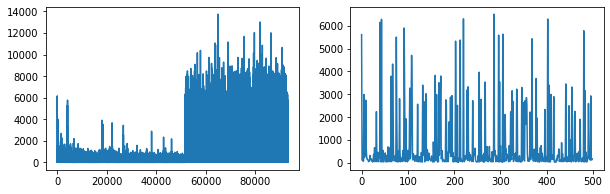

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


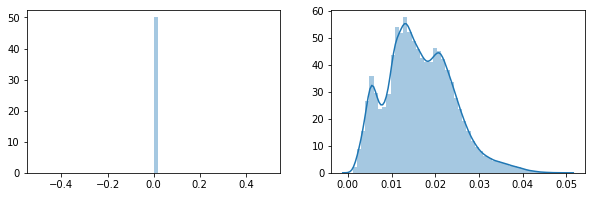

epoch 436/501 | batch 0/214.0 | time 2:00:04.057948 | loss 272.90692
epoch 436/501 | batch 50/214.0 | time 2:00:07.862850 | loss 24.63901
epoch 436/501 | batch 100/214.0 | time 2:00:11.666234 | loss 515.65808
epoch 436/501 | batch 150/214.0 | time 2:00:15.470403 | loss 2522.73462
epoch 436/501 | batch 200/214.0 | time 2:00:19.274964 | loss 459.9137
epoch 437/501 | batch 0/214.0 | time 2:00:20.363127 | loss 3279.14209
epoch 437/501 | batch 50/214.0 | time 2:00:24.157926 | loss 330.50497
epoch 437/501 | batch 100/214.0 | time 2:00:27.954877 | loss 126.37748
epoch 437/501 | batch 150/214.0 | time 2:00:31.752410 | loss 54.5397
epoch 437/501 | batch 200/214.0 | time 2:00:35.547257 | loss 35.50451
epoch 438/501 | batch 0/214.0 | time 2:00:36.631367 | loss 400.24545
epoch 438/501 | batch 50/214.0 | time 2:00:40.435988 | loss 44.5734
epoch 438/501 | batch 100/214.0 | time 2:00:44.240617 | loss 191.08878
epoch 438/501 | batch 150/214.0 | time 2:00:48.045371 | loss 182.88193
epoch 438/501 | batc

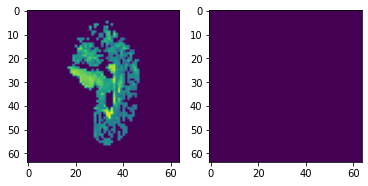

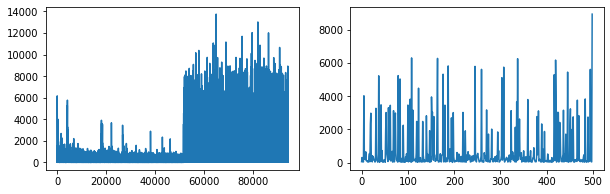

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


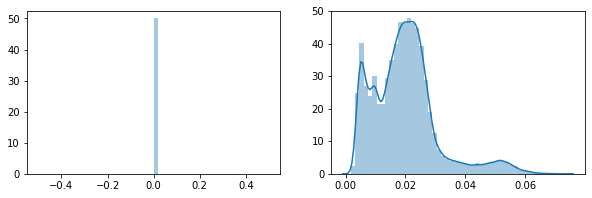

epoch 441/501 | batch 0/214.0 | time 2:01:26.529562 | loss 44.99093
epoch 441/501 | batch 50/214.0 | time 2:01:30.325746 | loss 28.88005
epoch 441/501 | batch 100/214.0 | time 2:01:34.123487 | loss 522.64368
epoch 441/501 | batch 150/214.0 | time 2:01:37.920035 | loss 2601.54883
epoch 441/501 | batch 200/214.0 | time 2:01:41.717060 | loss 3939.31958
epoch 442/501 | batch 0/214.0 | time 2:01:42.801547 | loss 239.96382
epoch 442/501 | batch 50/214.0 | time 2:01:46.608287 | loss 155.367
epoch 442/501 | batch 100/214.0 | time 2:01:50.413939 | loss 353.07727
epoch 442/501 | batch 150/214.0 | time 2:01:54.218597 | loss 43.62454
epoch 442/501 | batch 200/214.0 | time 2:01:58.023359 | loss 37.49588
epoch 443/501 | batch 0/214.0 | time 2:01:59.103818 | loss 40.85683
epoch 443/501 | batch 50/214.0 | time 2:02:02.901656 | loss 220.42578
epoch 443/501 | batch 100/214.0 | time 2:02:06.697238 | loss 864.82892
epoch 443/501 | batch 150/214.0 | time 2:02:10.492975 | loss 176.6716
epoch 443/501 | batch

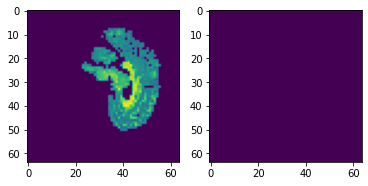

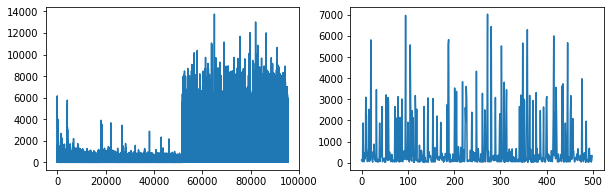

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


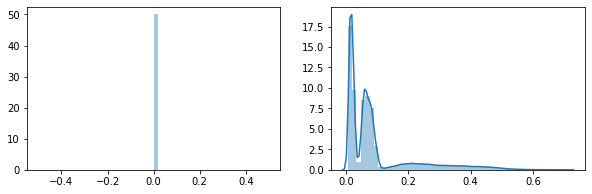

epoch 446/501 | batch 0/214.0 | time 2:02:48.926322 | loss 5921.56592
epoch 446/501 | batch 50/214.0 | time 2:02:52.728745 | loss 172.71092
epoch 446/501 | batch 100/214.0 | time 2:02:56.529791 | loss 74.11067
epoch 446/501 | batch 150/214.0 | time 2:03:00.333685 | loss 255.46182
epoch 446/501 | batch 200/214.0 | time 2:03:04.137972 | loss 98.23708
epoch 447/501 | batch 0/214.0 | time 2:03:05.218809 | loss 59.14073
epoch 447/501 | batch 50/214.0 | time 2:03:09.017002 | loss 31.61911
epoch 447/501 | batch 100/214.0 | time 2:03:12.817137 | loss 38.26692
epoch 447/501 | batch 150/214.0 | time 2:03:16.619018 | loss 73.17363
epoch 447/501 | batch 200/214.0 | time 2:03:20.417458 | loss 59.40724
epoch 448/501 | batch 0/214.0 | time 2:03:21.501858 | loss 39.22297
epoch 448/501 | batch 50/214.0 | time 2:03:25.307725 | loss 40.55788
epoch 448/501 | batch 100/214.0 | time 2:03:29.111735 | loss 5298.66797
epoch 448/501 | batch 150/214.0 | time 2:03:32.918201 | loss 159.31058
epoch 448/501 | batch 

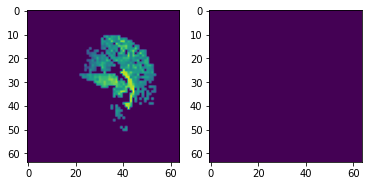

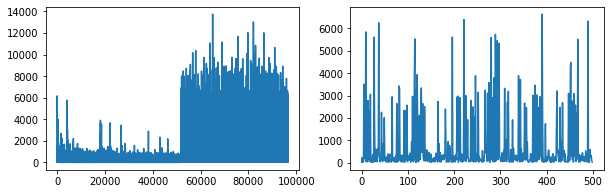

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


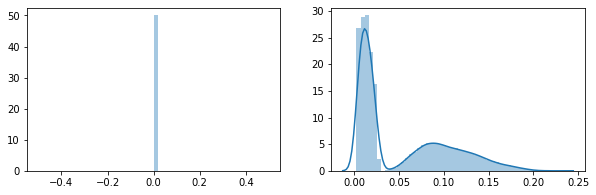

epoch 451/501 | batch 0/214.0 | time 2:04:11.388790 | loss 730.56274
epoch 451/501 | batch 50/214.0 | time 2:04:15.186786 | loss 40.88721
epoch 451/501 | batch 100/214.0 | time 2:04:18.984356 | loss 74.56143
epoch 451/501 | batch 150/214.0 | time 2:04:22.782027 | loss 695.76837
epoch 451/501 | batch 200/214.0 | time 2:04:26.577965 | loss 144.74985
epoch 452/501 | batch 0/214.0 | time 2:04:27.660962 | loss 2871.83838
epoch 452/501 | batch 50/214.0 | time 2:04:31.468300 | loss 26.83833
epoch 452/501 | batch 100/214.0 | time 2:04:35.271067 | loss 37.9746
epoch 452/501 | batch 150/214.0 | time 2:04:39.074945 | loss 190.3024
epoch 452/501 | batch 200/214.0 | time 2:04:42.878552 | loss 2751.71655
epoch 453/501 | batch 0/214.0 | time 2:04:43.968963 | loss 143.75162
epoch 453/501 | batch 50/214.0 | time 2:04:47.766288 | loss 258.92853
epoch 453/501 | batch 100/214.0 | time 2:04:51.563171 | loss 174.60187
epoch 453/501 | batch 150/214.0 | time 2:04:55.362944 | loss 519.30493
epoch 453/501 | bat

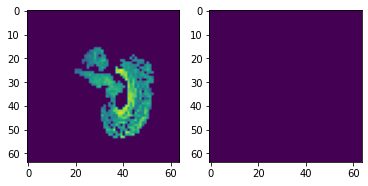

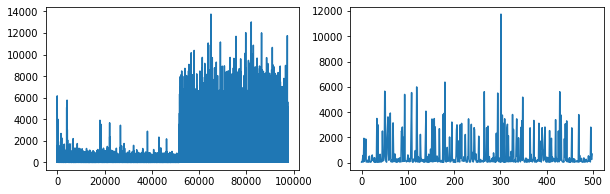

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


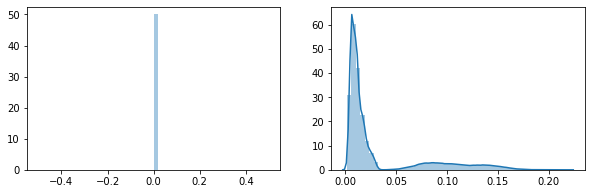

epoch 456/501 | batch 0/214.0 | time 2:05:33.859379 | loss 2721.00952
epoch 456/501 | batch 50/214.0 | time 2:05:37.662539 | loss 103.94337
epoch 456/501 | batch 100/214.0 | time 2:05:41.468114 | loss 289.11047
epoch 456/501 | batch 150/214.0 | time 2:05:45.269709 | loss 54.44596
epoch 456/501 | batch 200/214.0 | time 2:05:49.073375 | loss 37.14198
epoch 457/501 | batch 0/214.0 | time 2:05:50.162754 | loss 753.745
epoch 457/501 | batch 50/214.0 | time 2:05:53.960720 | loss 34.96044
epoch 457/501 | batch 100/214.0 | time 2:05:57.757601 | loss 160.55075
epoch 457/501 | batch 150/214.0 | time 2:06:01.556227 | loss 45.81538
epoch 457/501 | batch 200/214.0 | time 2:06:05.354832 | loss 54.77361
epoch 458/501 | batch 0/214.0 | time 2:06:06.439145 | loss 42.50322
epoch 458/501 | batch 50/214.0 | time 2:06:10.244406 | loss 155.42374
epoch 458/501 | batch 100/214.0 | time 2:06:14.049182 | loss 1865.79639
epoch 458/501 | batch 150/214.0 | time 2:06:17.853139 | loss 411.52441
epoch 458/501 | batch

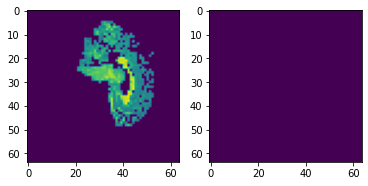

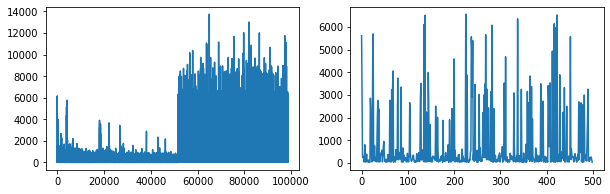

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


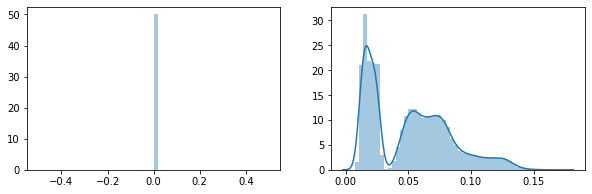

epoch 461/501 | batch 0/214.0 | time 2:06:56.333908 | loss 26.63842
epoch 461/501 | batch 50/214.0 | time 2:07:00.129563 | loss 621.55884
epoch 461/501 | batch 100/214.0 | time 2:07:03.926639 | loss 3170.81055
epoch 461/501 | batch 150/214.0 | time 2:07:07.722742 | loss 376.74054
epoch 461/501 | batch 200/214.0 | time 2:07:11.520184 | loss 80.96754
epoch 462/501 | batch 0/214.0 | time 2:07:12.603914 | loss 388.27667
epoch 462/501 | batch 50/214.0 | time 2:07:16.406482 | loss 126.597
epoch 462/501 | batch 100/214.0 | time 2:07:20.211886 | loss 136.4101
epoch 462/501 | batch 150/214.0 | time 2:07:24.062961 | loss 135.3284
epoch 462/501 | batch 200/214.0 | time 2:07:27.869173 | loss 538.7251
epoch 463/501 | batch 0/214.0 | time 2:07:28.951144 | loss 162.70708
epoch 463/501 | batch 50/214.0 | time 2:07:32.747293 | loss 224.36465
epoch 463/501 | batch 100/214.0 | time 2:07:36.544078 | loss 53.64411
epoch 463/501 | batch 150/214.0 | time 2:07:40.340365 | loss 289.75375
epoch 463/501 | batch 

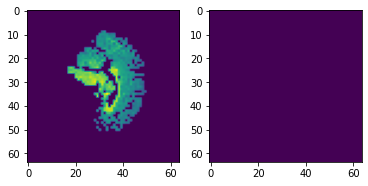

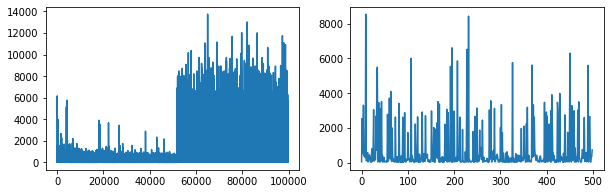

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


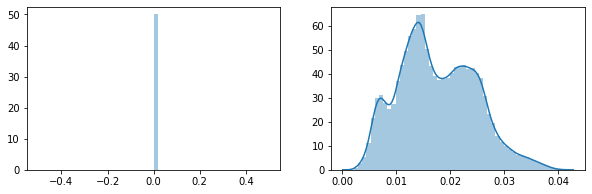

epoch 466/501 | batch 0/214.0 | time 2:08:18.825756 | loss 607.31903
epoch 466/501 | batch 50/214.0 | time 2:08:22.630103 | loss 100.22099
epoch 466/501 | batch 100/214.0 | time 2:08:26.435504 | loss 372.78796
epoch 466/501 | batch 150/214.0 | time 2:08:30.239294 | loss 3275.08887
epoch 466/501 | batch 200/214.0 | time 2:08:34.042786 | loss 2162.41162
epoch 467/501 | batch 0/214.0 | time 2:08:35.123276 | loss 32.20509
epoch 467/501 | batch 50/214.0 | time 2:08:38.919348 | loss 1860.07043
epoch 467/501 | batch 100/214.0 | time 2:08:42.714446 | loss 55.54617
epoch 467/501 | batch 150/214.0 | time 2:08:46.508380 | loss 394.06
epoch 467/501 | batch 200/214.0 | time 2:08:50.302728 | loss 168.88919
epoch 468/501 | batch 0/214.0 | time 2:08:51.385924 | loss 5615.21729
epoch 468/501 | batch 50/214.0 | time 2:08:55.188942 | loss 66.9548
epoch 468/501 | batch 100/214.0 | time 2:08:58.991605 | loss 792.82715
epoch 468/501 | batch 150/214.0 | time 2:09:02.794133 | loss 606.6261
epoch 468/501 | bat

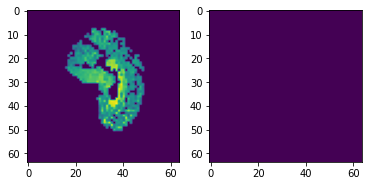

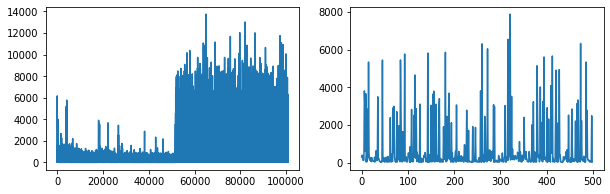

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


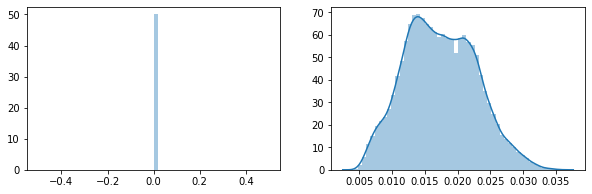

epoch 471/501 | batch 0/214.0 | time 2:09:41.358816 | loss 41.63049
epoch 471/501 | batch 50/214.0 | time 2:09:45.156379 | loss 486.88617
epoch 471/501 | batch 100/214.0 | time 2:09:48.952072 | loss 34.85753
epoch 471/501 | batch 150/214.0 | time 2:09:52.747744 | loss 130.86336
epoch 471/501 | batch 200/214.0 | time 2:09:56.542430 | loss 392.72064
epoch 472/501 | batch 0/214.0 | time 2:09:57.624508 | loss 56.64651
epoch 472/501 | batch 50/214.0 | time 2:10:01.426293 | loss 115.42004
epoch 472/501 | batch 100/214.0 | time 2:10:05.231382 | loss 2791.98779
epoch 472/501 | batch 150/214.0 | time 2:10:09.034467 | loss 135.81821
epoch 472/501 | batch 200/214.0 | time 2:10:12.839232 | loss 86.92725
epoch 473/501 | batch 0/214.0 | time 2:10:13.928457 | loss 203.38185
epoch 473/501 | batch 50/214.0 | time 2:10:17.723462 | loss 273.61359
epoch 473/501 | batch 100/214.0 | time 2:10:21.520018 | loss 214.94392
epoch 473/501 | batch 150/214.0 | time 2:10:25.315423 | loss 299.16681
epoch 473/501 | ba

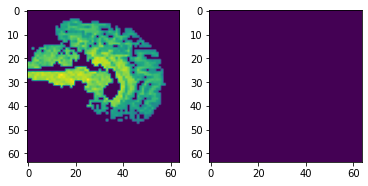

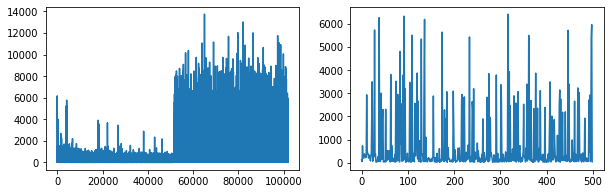

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


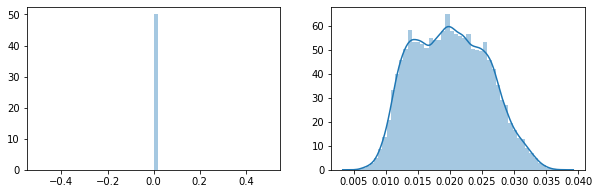

epoch 476/501 | batch 0/214.0 | time 2:11:03.782093 | loss 2311.5498
epoch 476/501 | batch 50/214.0 | time 2:11:07.583814 | loss 81.89561
epoch 476/501 | batch 100/214.0 | time 2:11:11.388057 | loss 2729.41016
epoch 476/501 | batch 150/214.0 | time 2:11:15.191026 | loss 3253.5498
epoch 476/501 | batch 200/214.0 | time 2:11:18.995076 | loss 117.4976
epoch 477/501 | batch 0/214.0 | time 2:11:20.084841 | loss 751.5105
epoch 477/501 | batch 50/214.0 | time 2:11:23.878661 | loss 160.23953
epoch 477/501 | batch 100/214.0 | time 2:11:27.673294 | loss 63.00368
epoch 477/501 | batch 150/214.0 | time 2:11:31.467618 | loss 2486.43726
epoch 477/501 | batch 200/214.0 | time 2:11:35.260832 | loss 103.21662
epoch 478/501 | batch 0/214.0 | time 2:11:36.342631 | loss 362.04843
epoch 478/501 | batch 50/214.0 | time 2:11:40.146298 | loss 276.05569
epoch 478/501 | batch 100/214.0 | time 2:11:43.950337 | loss 40.15731
epoch 478/501 | batch 150/214.0 | time 2:11:47.753026 | loss 3804.69409
epoch 478/501 | b

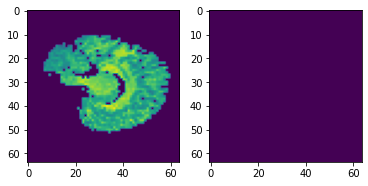

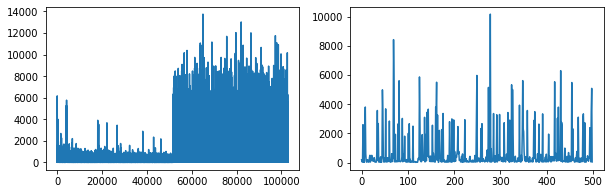

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


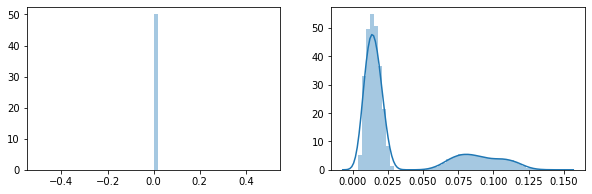

epoch 481/501 | batch 0/214.0 | time 2:12:26.252373 | loss 288.50415
epoch 481/501 | batch 50/214.0 | time 2:12:30.047345 | loss 124.69485
epoch 481/501 | batch 100/214.0 | time 2:12:33.844343 | loss 53.49506
epoch 481/501 | batch 150/214.0 | time 2:12:37.639300 | loss 98.8814
epoch 481/501 | batch 200/214.0 | time 2:12:41.434696 | loss 337.23938
epoch 482/501 | batch 0/214.0 | time 2:12:42.517848 | loss 135.5788
epoch 482/501 | batch 50/214.0 | time 2:12:46.321976 | loss 43.31629
epoch 482/501 | batch 100/214.0 | time 2:12:50.127616 | loss 60.89193
epoch 482/501 | batch 150/214.0 | time 2:12:53.930937 | loss 49.29301
epoch 482/501 | batch 200/214.0 | time 2:12:57.732615 | loss 694.67773
epoch 483/501 | batch 0/214.0 | time 2:12:58.812935 | loss 4010.1687
epoch 483/501 | batch 50/214.0 | time 2:13:02.607570 | loss 43.91787
epoch 483/501 | batch 100/214.0 | time 2:13:06.402765 | loss 227.82205
epoch 483/501 | batch 150/214.0 | time 2:13:10.201595 | loss 25.09342
epoch 483/501 | batch 20

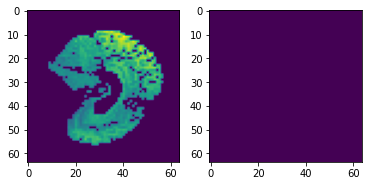

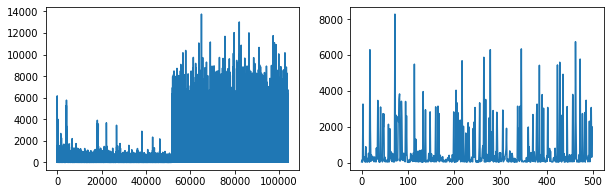

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


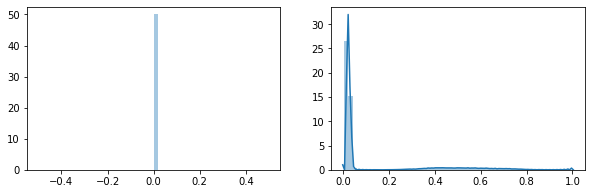

epoch 486/501 | batch 0/214.0 | time 2:13:48.658606 | loss 84.14107
epoch 486/501 | batch 50/214.0 | time 2:13:52.460658 | loss 59.03401
epoch 486/501 | batch 100/214.0 | time 2:13:56.261710 | loss 1778.78479
epoch 486/501 | batch 150/214.0 | time 2:14:00.064133 | loss 15.73384
epoch 486/501 | batch 200/214.0 | time 2:14:03.865519 | loss 66.49788
epoch 487/501 | batch 0/214.0 | time 2:14:04.945503 | loss 396.53235
epoch 487/501 | batch 50/214.0 | time 2:14:08.739012 | loss 124.23496
epoch 487/501 | batch 100/214.0 | time 2:14:12.533643 | loss 293.35504
epoch 487/501 | batch 150/214.0 | time 2:14:16.328357 | loss 295.0437
epoch 487/501 | batch 200/214.0 | time 2:14:20.123356 | loss 94.41611
epoch 488/501 | batch 0/214.0 | time 2:14:21.206399 | loss 51.06296
epoch 488/501 | batch 50/214.0 | time 2:14:25.008244 | loss 2891.35352
epoch 488/501 | batch 100/214.0 | time 2:14:28.809387 | loss 50.47125
epoch 488/501 | batch 150/214.0 | time 2:14:32.611962 | loss 182.24342
epoch 488/501 | batch

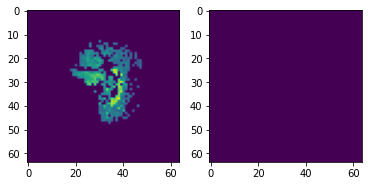

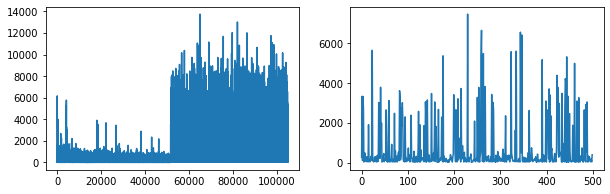

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


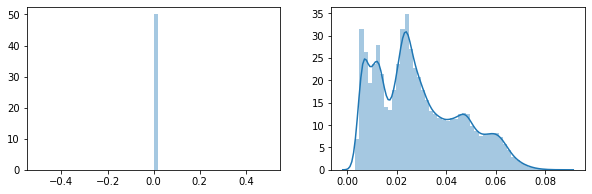

epoch 491/501 | batch 0/214.0 | time 2:15:11.095359 | loss 78.92024
epoch 491/501 | batch 50/214.0 | time 2:15:14.888777 | loss 35.13522
epoch 491/501 | batch 100/214.0 | time 2:15:18.682314 | loss 2503.76318
epoch 491/501 | batch 150/214.0 | time 2:15:22.478890 | loss 601.47363
epoch 491/501 | batch 200/214.0 | time 2:15:26.273418 | loss 68.74896
epoch 492/501 | batch 0/214.0 | time 2:15:27.357059 | loss 43.41502
epoch 492/501 | batch 50/214.0 | time 2:15:31.160753 | loss 3285.61914
epoch 492/501 | batch 100/214.0 | time 2:15:34.965232 | loss 255.41278
epoch 492/501 | batch 150/214.0 | time 2:15:38.770103 | loss 36.08439
epoch 492/501 | batch 200/214.0 | time 2:15:42.574358 | loss 317.29337
epoch 493/501 | batch 0/214.0 | time 2:15:43.665825 | loss 107.70221
epoch 493/501 | batch 50/214.0 | time 2:15:47.462453 | loss 136.09525
epoch 493/501 | batch 100/214.0 | time 2:15:51.255684 | loss 114.98414
epoch 493/501 | batch 150/214.0 | time 2:15:55.053195 | loss 293.69464
epoch 493/501 | ba

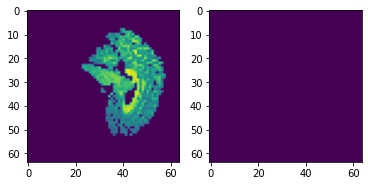

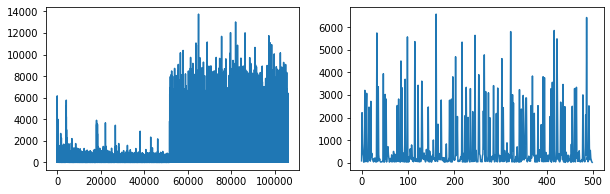

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


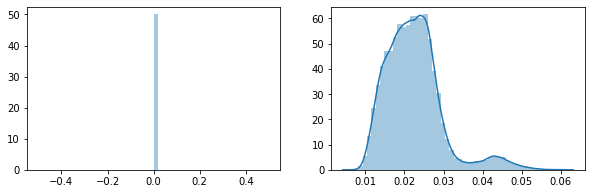

epoch 496/501 | batch 0/214.0 | time 2:16:33.730513 | loss 237.44034
epoch 496/501 | batch 50/214.0 | time 2:16:37.581940 | loss 27.98979
epoch 496/501 | batch 100/214.0 | time 2:16:41.395594 | loss 82.41827
epoch 496/501 | batch 150/214.0 | time 2:16:45.205593 | loss 150.02673
epoch 496/501 | batch 200/214.0 | time 2:16:49.013179 | loss 2230.28491
epoch 497/501 | batch 0/214.0 | time 2:16:50.103597 | loss 386.99207
epoch 497/501 | batch 50/214.0 | time 2:16:53.906511 | loss 3011.41992
epoch 497/501 | batch 100/214.0 | time 2:16:57.704082 | loss 262.89185
epoch 497/501 | batch 150/214.0 | time 2:17:01.498202 | loss 802.48169
epoch 497/501 | batch 200/214.0 | time 2:17:05.294721 | loss 42.10328
epoch 498/501 | batch 0/214.0 | time 2:17:06.377089 | loss 269.45795
epoch 498/501 | batch 50/214.0 | time 2:17:10.180157 | loss 2276.72803
epoch 498/501 | batch 100/214.0 | time 2:17:13.982137 | loss 441.25223
epoch 498/501 | batch 150/214.0 | time 2:17:17.785082 | loss 100.99966
epoch 498/501 |

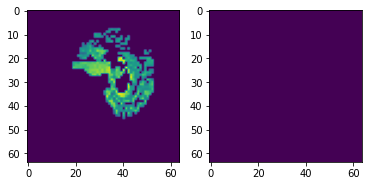

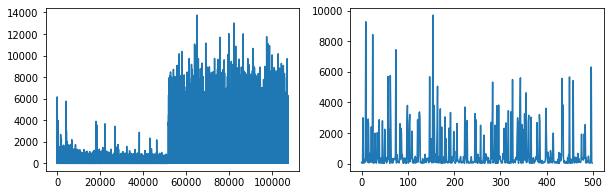

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


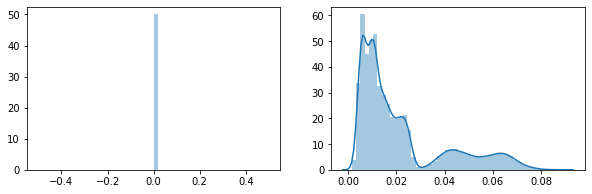

In [31]:
t0 = datetime.now();
for epoch in range(int(num_epochs)):
    permutation = np.random.permutation(ndata)
    D = D[permutation,:,:,:,:]
    for batch_idx in range(int(n_batches)):
        optimizer.zero_grad()
        data_batch = D[batches[batch_idx,:],:,:,:,:]
        outputs = model.forward(data_batch)
        #train_loss = criterion(outputs,data_batch)
        train_loss = myLoss(outputs,data_batch)
        train_loss.backward()
        optimizer.step()
        track.append(train_loss.item())
        if batch_idx%50==0:
          print(f"epoch {epoch}/{num_epochs} | batch {batch_idx}/{n_batches} | time {str(datetime.now()-t0)} | loss {round(train_loss.item(),5)}")

    if epoch==0:
      track = track[50::] #Drop first 

    if epoch%100==0:
      ofn = os.path.join(ofdir,f'{session_name}' + f'e{epoch}_'+str(now()))
      print('saved')
      print(ofn)
      torch.save(model.state_dict(),ofn)
     
    if epoch%5==0:
      plt.figure()
      plt.subplot(1,2,1)
      plt.imshow(data_batch.cpu().detach().numpy()[0,0,32,:,:])
      plt.subplot(1,2,2)
      plt.imshow(outputs.cpu().detach().numpy()[0,0,32,:,:])
      plt.show()

      plt.figure(figsize=(10,3))
      plt.subplot(1,2,1)
      plt.plot(track)
      plt.subplot(1,2,2)
      plt.plot(track[-min(len(track),500):-1])
      plt.show()


      b = outputs.cpu().detach()
      a = data_batch.cpu().detach()
      plt.figure(figsize=(10,3))
      plt.subplot(1,2,1)
      sns.distplot(np.array(b[a>0.001]).flatten())
      plt.subplot(1,2,2)
      sns.distplot(np.array(a[a>0.001]).flatten())
      plt.show()


In [ ]:
print('all done')